In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import re
import ns
import history_cmc as hic
import math
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import gzip
import sys
import astropy
from astropy import units
from scipy.optimize import bisect


import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import ns_tidalcapture as tc
import conversions
import dynamics as dyn
import scripts3
import scripts2
import scripts1
import scripts
import LISA_calculations as lisa_calc
import extract_full_hist as ehist
import psr_catalog as pc


sys.path.insert(1, '/projects/b1095/syr904/MyCodes/cmctoolkit')
import cmctoolkit as cmct

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 22})
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Times New Roman'
#plt.rc('font', family='serif')
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
Gconst_sun = 4.30091*10**-3 ##pc*M_sun**-1*(km/s)2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
Rsun=6.957e+10 ##cm
AU=1.496*10**13  ##cm
AU_Rsun=214.93946938362 ##AU to R_sun
PC=3.086*10**18  ##cm
PC_Rsun = 44334448.0068964 ##pc to R_sun

savepath = '/projects/b1095/syr904/projects/isolated_MSP/plots/'

2.1.2


In [6]:
##Field MSPs
msp_field = pd.read_excel('/projects/b1095/syr904/projects/isolated_MSP/field_msps_wvu.xlsx', 
                         names = ['PSR', 'P', 'DM', 'l', 'b', 'Pb', 'x', 'Discovery_year', 'Notes'])
porb = msp_field['Pb']
print(porb)
nnon = 0; nsin = 0
for xx in range(len(porb)):
    if porb[xx]=='*':
        nnon+=1
    elif porb[xx]==NaN:
        nsin+=1
    
print(nnon, nsin)

0        0.139
1          NaN
2        1.589
3        1.788
4        1.672
5            *
6          NaN
7       49.964
8      512.039
9        2.029
10         NaN
11         0.2
12      37.108
13       0.097
14         NaN
15           *
16      triple
17         NaN
18        6.96
19      669.07
20           *
21           *
22       5.741
23           *
24         4.9
25         NaN
26       4.847
27      54.103
28       0.286
29       1.198
        ...   
393          *
394        NaN
395      0.635
396      6.625
397      10.58
398      6.839
399          *
400          *
401      1.094
402          *
403      0.417
404      0.173
405     93.016
406          *
407       0.42
408     32.001
409     12.689
410          *
411      0.146
412       0.21
413          *
414    125.935
415        1.4
416      2.459
417          *
418        NaN
419      0.323
420      0.287
421      0.193
422     11.751
Name: Pb, dtype: object
101 0


14    0.04
20    0.06
21    0.05
24    0.06
30    0.17
33    0.14
Name: rc, dtype: float64
sum_cc 0.6610169491525424
sum_noncc 0.39800995024875624
mean_cc 0.5111111111111111
mean_noncc 0.24677438682743721
median_cc 0.6666666666666667
median_noncc 0.17142857142857143
sum_tot 0.4576923076923077
mean_tot 0.3202012546840133
[0.0, 0.5, 1.0, 0.0, 1.0, 0.0, 0.8333333333333334, 0.8888888888888888, 0.8888888888888888, 0.0] [0.3448275862068966, 0.4, 0.2, 0.7222222222222222, 0.0, 0.14285714285714285, 0.0, 0.0, 0.3333333333333333, 0.0, 0.5, 0.0, 0.0, 0.48717948717948717, 0.5, 0.6666666666666666, 0.8333333333333334, 0.0, 0.2857142857142857, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0]
Ks_2sampResult(statistic=0.46153846153846156, pvalue=0.06307986896361811)
0.18421052631578946
0.24390243902439024
0.22110552763819097


/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in true_divide


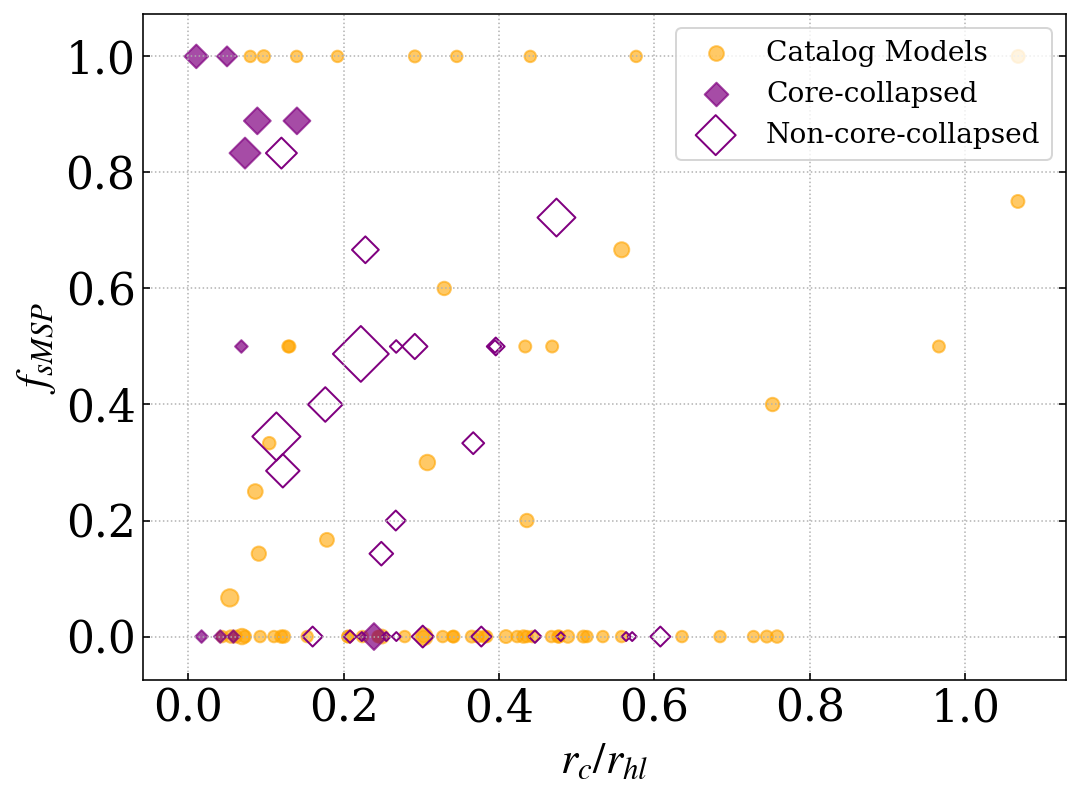

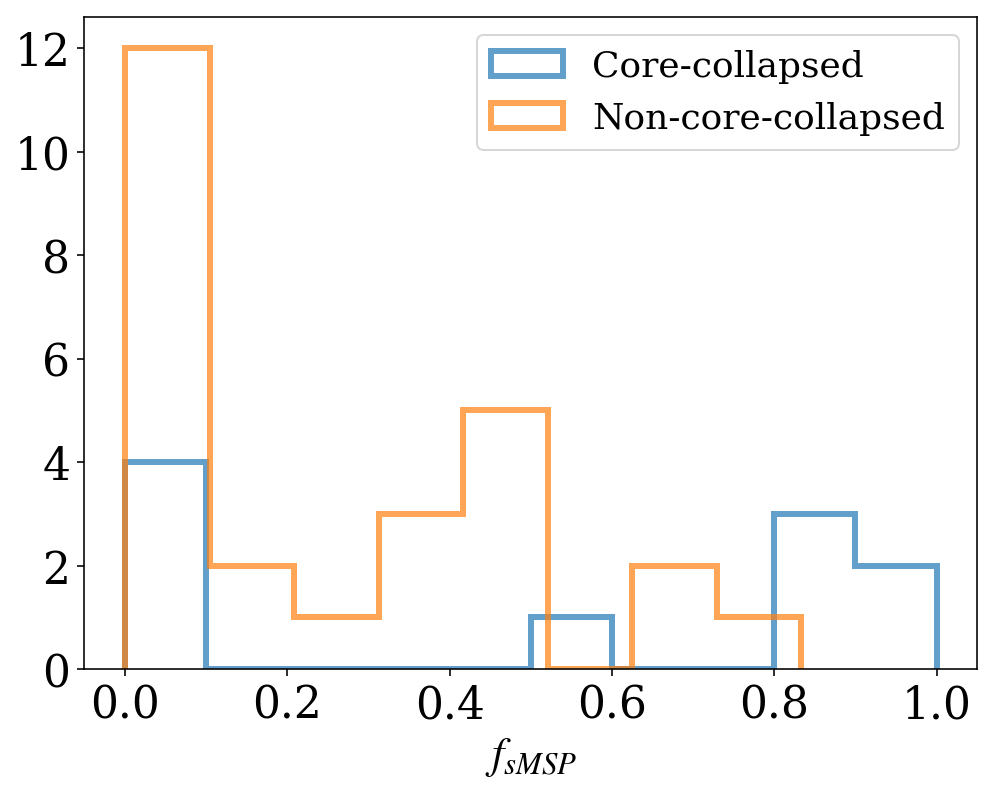

In [34]:
##Catalog Model Check
## isolated MSP fracion as a function of rc/rh
##Observed cluster rc and rh and Nmsp
data_gcmsp = pd.read_excel('/projects/b1095/syr904/projects/isolated_MSP/psrcatalog_numbers.xlsx',
                           names = ['name','rc','rhl','long','lat','dist','ntot','nbin','cc'],
                          skiprows = 1)
rc_psrcat = data_gcmsp['rc']; rhl_psrcat = data_gcmsp['rhl']
#print(rc_psrcat, data_gcmsp['name'])
Ntmsp = data_gcmsp['ntot'].values; Nbmsp = data_gcmsp['nbin'].values
CCst = data_gcmsp['cc'].values
r_ratio_psrcat = (rc_psrcat/rhl_psrcat)#[Nbmsp!='*']
rhl_psrcat = rhl_psrcat#[Nbmsp!='*']
rc_psrcat = rc_psrcat#[Nbmsp!='*']
Ntmsp = Ntmsp#[Nbmsp!='*']
CCst = CCst#[Nbmsp!='*']
Nbmsp = Nbmsp#[Nbmsp!='*']
Nsmsp = Ntmsp-Nbmsp
print(rc_psrcat[Nsmsp/Ntmsp>0.8])


#print(np.sum(Nsmsp[r_ratio_psrcat<=0.2])/np.sum(Ntmsp[r_ratio_psrcat<=0.2]))
#print(np.sum(Nsmsp[r_ratio_psrcat>0.2])/np.sum(Ntmsp[r_ratio_psrcat>0.2]))
print('sum_cc', np.sum(Nsmsp[CCst==1])/np.sum(Ntmsp[CCst==1]))
print('sum_noncc', np.sum(Nsmsp[CCst!=1])/np.sum(Ntmsp[CCst!=1]))
print('mean_cc', np.mean(Nsmsp[CCst==1]/Ntmsp[CCst==1]))
print('mean_noncc', np.mean(Nsmsp[CCst!=1]/Ntmsp[CCst!=1]))
print('median_cc', np.median(Nsmsp[CCst==1]/Ntmsp[CCst==1]))
print('median_noncc', np.median(Nsmsp[CCst!=1]/Ntmsp[CCst!=1]))
print('sum_tot', np.sum(Nsmsp)/np.sum(Ntmsp))
print('mean_tot', np.mean(Nsmsp/Ntmsp))


fcc = list(Nsmsp[CCst==1]/Ntmsp[CCst==1])
fnoncc = list(Nsmsp[CCst!=1]/Ntmsp[CCst!=1])
print(fcc, fnoncc)
##K-S test to check if the two distributions are statistically different.
from scipy import stats
print(stats.ks_2samp(fcc, fnoncc))


#############################
data_nmsp = np.genfromtxt('/projects/b1095/syr904/projects/isolated_MSP/nmsp_rc_rh_12000myr.dat')
datapath = np.genfromtxt('/projects/b1095/syr904/projects/GCE/catalog/path_allfinished_newruns_maingrid.dat', 
                         dtype=str)
modelno = data_nmsp[:,0].astype(int)
sourcedir = datapath[:,0][modelno]
Rg = []
for xx in range(len(sourcedir)):
    n, zm, r_g, r_v = uc.find_init_conditions(sourcedir[xx])
    Rg.append(r_g)
Rg=np.array(Rg)
    
rc_obs = data_nmsp[:,5]; rhl_obs = data_nmsp[:,6]
nmsp_sin = data_nmsp[:,7]; nmsp_bin = data_nmsp[:,8]
r_ratio = rc_obs/rhl_obs
rc_obs_arcmin = uc.pc2arcsec(Rg, rc_obs)/60.

print(np.sum(nmsp_sin[r_ratio<=0.2])/np.sum(nmsp_sin[r_ratio<=0.2]+nmsp_bin[r_ratio<=0.2]))
print(np.sum(nmsp_sin[r_ratio>0.2])/np.sum(nmsp_sin[r_ratio>0.2]+nmsp_bin[r_ratio>0.2]))
print(np.sum(nmsp_sin)/np.sum(nmsp_sin+nmsp_bin))


##############################
r_ratio_bins = np.linspace(np.min(r_ratio), np.max(r_ratio), 16)
r_ratio_mean = []; nmsp_bin_tot = []; nmsp_sin_tot = []
for ii in range(len(r_ratio_bins)-1):
    r_ratio_mean.append((r_ratio_bins[ii+1]+r_ratio_bins[ii])/2.)
    nmsp_bin_tot.append(0); nmsp_sin_tot.append(0)
    for xx in range(len(r_ratio)):
        if r_ratio_bins[ii]<=r_ratio[xx]<=r_ratio_bins[ii+1]:
            nmsp_bin_tot[-1]+=nmsp_bin[xx]
            nmsp_sin_tot[-1]+=nmsp_sin[xx]

nmsp_bin_tot = np.array(nmsp_bin_tot)
nmsp_sin_tot = np.array(nmsp_sin_tot)
r_ratio_mean = np.array(r_ratio_mean)


fig, axs = plt.subplots(figsize = (8, 6))
axs.scatter(r_ratio, nmsp_sin/(nmsp_sin+nmsp_bin), 
            alpha=0.6, color = 'orange', s = (nmsp_sin+nmsp_bin)*3+30,
            label = 'Catalog Models')
axs.scatter(r_ratio_psrcat[CCst==1], (Nsmsp/Ntmsp)[CCst==1],
            marker = 'D', s=Ntmsp[CCst==1]*10, alpha=0.7,
            edgecolor = 'purple', facecolor = 'purple',
            label = 'Core-collapsed')
axs.scatter(r_ratio_psrcat[CCst==0], (Nsmsp/Ntmsp)[CCst==0],
            marker = 'D', s=Ntmsp[CCst==0]*10, facecolor = 'none',
            edgecolor = 'purple',
            label = 'Non-core-collapsed')

#axs.scatter(rc_obs_arcmin, nmsp_sin/(nmsp_sin+nmsp_bin), 
#            alpha=0.6, color = 'orange', s = (nmsp_sin+nmsp_bin)*3+30,
#            label = 'Catalog Models')
#axs.scatter((r_ratio_psrcat*rhl_psrcat)[CCst==1], (Nsmsp/Ntmsp)[CCst==1],
#            marker = 'D', s=Ntmsp[CCst==1]*10, alpha=0.7,
#            edgecolor = 'purple', facecolor = 'purple',
#            label = 'Core-collapsed')
#axs.scatter((r_ratio_psrcat*rhl_psrcat)[CCst==0], (Nsmsp/Ntmsp)[CCst==0],
#            marker = 'D', s=Ntmsp[CCst==0]*10, facecolor = 'none',
#            edgecolor = 'purple',
#            label = 'Non-core-collapsed')

axs.set_xlabel(r'$r_c/r_{hl}$')
#axs.set_xlabel(r'$r_c \rm{[arcmin]}$')
#axs.set_xlim(xmin = -0.1,xmax=5.)
#axs.set_xscale('log')
axs.set_ylabel(r'$f_{sMSP}$')
axs.legend(loc='upper right', fontsize=14, frameon=True)
axs.grid(linestyle=':',which='major',linewidth='0.75')
axs.grid(linestyle=':',which='minor',linewidth='0.75')
axs.tick_params(top=False, right=True, direction = 'in', which='both')
plt.savefig('/projects/b1095/syr904/projects/isolated_MSP/plots/fsmap_comparison.pdf', dpi=300)


fig.tight_layout()
plt.savefig(savepath+'fsmap_rc_comparison.pdf', dpi=300)


plt.figure(figsize=(8,6))
plt.hist(fcc,
        lw=3, alpha=0.7,
         histtype='step',label = 'Core-collapsed')
plt.hist(fnoncc, bins=8,
         histtype='step', lw=3, alpha=0.7,
         label = 'Non-core-collapsed')
plt.xlabel(r'$f_{sMSP}$')
plt.legend(fontsize=18)

In [3]:
##Total fraction of isolated MSPs in CC clusters
data_gcmsp = pd.read_excel('/projects/b1095/syr904/projects/isolated_MSP/psrcatalog_numbers.xlsx',
                           names = ['name','rc','rhl','long','lat','dist','ntot','nbin','cc'],
                          skiprows = 1)
#print(data_gcmsp['name'][data_gcmsp['cc']==1])
nbmsp = data_gcmsp['nbin']
ntmsp = data_gcmsp['ntot']#[nbmsp!='*']
ccst = data_gcmsp['cc']#[nbmsp!='*']
nbmsp = nbmsp#[nbmsp!='*']
ntmsp_cc = ntmsp[ccst==1]; nbmsp_cc = nbmsp[ccst==1]
ntmsp_noncc = ntmsp[ccst==0]; nbmsp_noncc = nbmsp[ccst==0]
#print(ntmsp_cc)
#print(nbmsp_cc)

print(np.mean(nbmsp/ntmsp))
print(np.mean(nbmsp_cc/ntmsp_cc), np.mean(nbmsp_noncc/ntmsp_noncc))

print(np.sum(nbmsp)/np.sum(ntmsp))
print(np.sum(nbmsp_cc)/np.sum(ntmsp_cc), np.sum(nbmsp_noncc)/np.sum(ntmsp_noncc))

0.6797987453159867
0.48888888888888893 0.7532256131725628
0.5423076923076923
0.3389830508474576 0.6019900497512438


254
65 74


/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


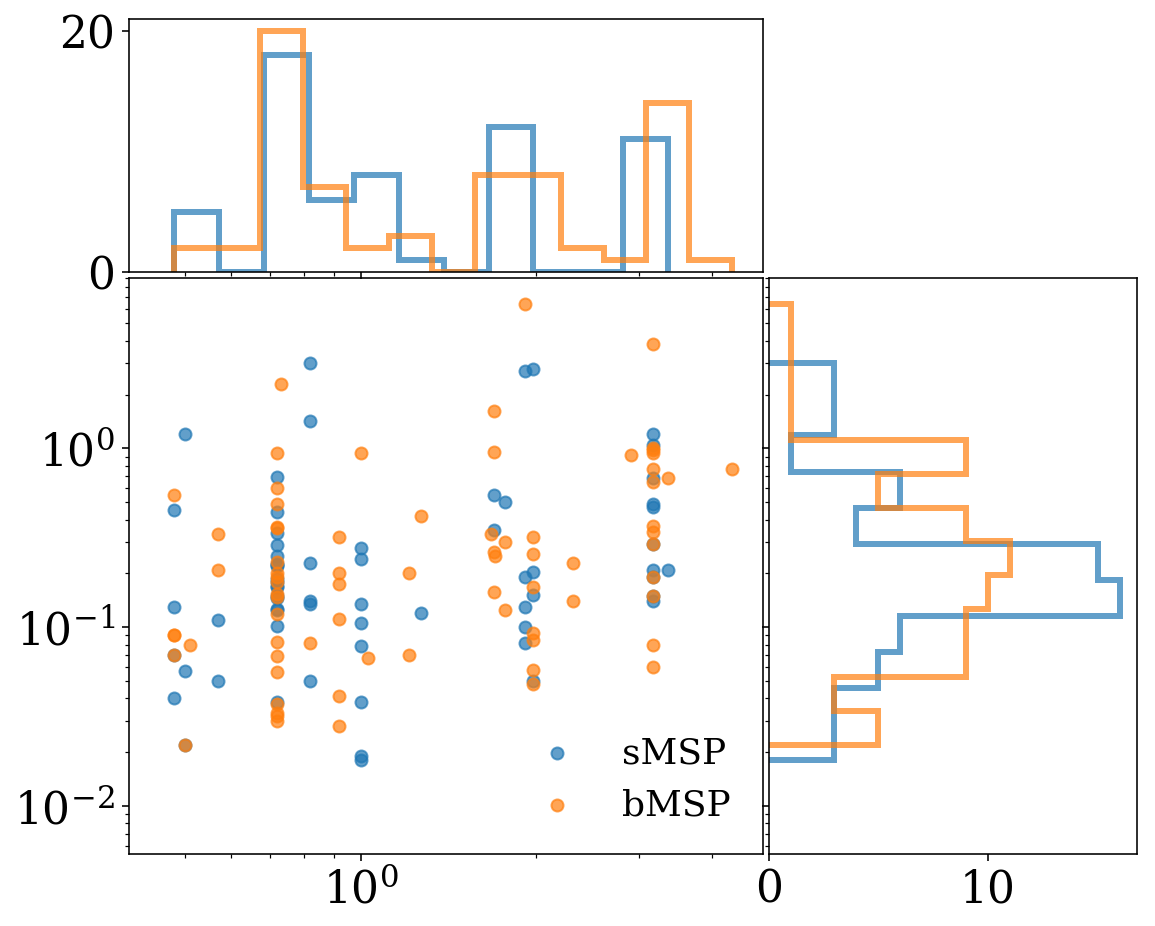

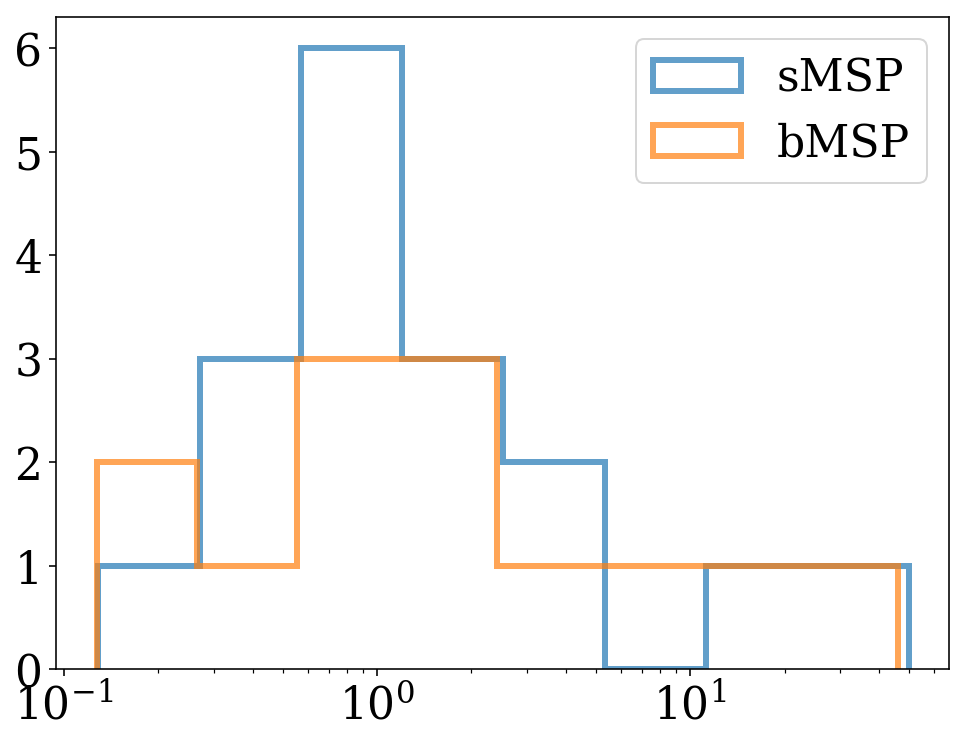

In [19]:
##Offsets
Poff, Offset, Binoff, Nameoff, Clusteroff = pc.readdata_freire(spinflag=0,offsetflag=1)
Offset = np.array(Offset)
Binoff = np.array(Binoff)
Poff = np.array(Poff)

print(len(Offset[Binoff==0]), len(Offset[Binoff==1]))

data_gcmsp = pd.read_excel('/projects/b1095/syr904/projects/isolated_MSP/psrcatalog_numbers.xlsx',
                           names = ['name','rc','rhl','long','lat','dist','ntot','nbin','cc'],
                          skiprows = 1)
cluname = np.array(data_gcmsp['name']); ccst = np.array(data_gcmsp['cc'])
cnames = []
for ii in range(len(cluname)):
    cnames.append(cluname[ii].split()[1])
cnames = np.array(cnames)

CCoff = []; Rcoff = []; Rhoff = []
for jj in range(len(Clusteroff)):
    for kk in range(len(cnames)):
        if cnames[kk]==Clusteroff[jj]:
            cc = ccst[kk]
            rc = data_gcmsp['rc'][kk]
            rh = data_gcmsp['rhl'][kk]
    CCoff.append(cc); Rcoff.append(rc); Rhoff.append(rh)
CCoff=np.array(CCoff)
Rcoff=np.array(Rcoff); Rhoff=np.array(Rhoff)
#print(Rcoff)

Ps = Poff[Binoff==0]; Offs = Offset[Binoff==0]
Pb = Poff[Binoff==1]; Offb = Offset[Binoff==1]
CCs = CCoff[Binoff==0]
CCb = CCoff[Binoff==1]
Rcs = Rcoff[Binoff==0]; Rhs = Rhoff[Binoff==0]
Rcb = Rcoff[Binoff==1]; Rhb = Rhoff[Binoff==1]

def scatter_hist(x1, y1, x2, y2, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x1, y1,
               alpha=0.7,
               label = 'sMSP')
    ax.scatter(x2, y2,
               alpha=0.7,
               label='bMSP')
    #ax.scatter(x3, y3,
    #           alpha=0.7,
    #           label = 'nonCC-bMSP')
    #ax.scatter(x4, y4,
    #           alpha=0.7,
    #           label='CC-bMSP')
    
    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x1)), np.max(np.abs(y1)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    #bins = np.arange(-lim, lim + binwidth, binwidth)
    #print(bins)
    ax_histx.hist(x1, bins=np.logspace(np.log10(np.min(x1)), np.log10(np.max(x1)), 12), 
                  log=False, histtype = 'step', lw = 3, alpha=0.7)
    ax_histy.hist(y1, bins=np.logspace(np.log10(np.min(y1)), np.log10(np.max(y1)), 12), orientation='horizontal',
                 log=False, histtype = 'step', lw = 3, alpha=0.7)
    ax_histx.hist(x2, bins=np.logspace(np.log10(np.min(x2)), np.log10(np.max(x2)), 14), 
                  log=False, histtype = 'step', lw = 3, alpha=0.7)
    ax_histy.hist(y2, bins=np.logspace(np.log10(np.min(y2)), np.log10(np.max(y2)), 14), orientation='horizontal',
                 log=False, histtype = 'step', lw = 3, alpha=0.7)
    #ax_histx.hist(x3, bins=np.logspace(np.log10(np.min(x3)), np.log10(np.max(x3)), 12), 
    #              log=False, histtype = 'step', lw = 3, alpha=0.7)
    #ax_histy.hist(y3, bins=np.logspace(np.log10(np.min(y3)), np.log10(np.max(y3)), 12), orientation='horizontal',
    #             log=False, histtype = 'step', lw = 3, alpha=0.7)
    #ax_histx.hist(x4, bins=np.logspace(np.log10(np.min(x4)), np.log10(np.max(x4)), 14), 
    #              log=False, histtype = 'step', lw = 3, alpha=0.7)
    #ax_histy.hist(y4, bins=np.logspace(np.log10(np.min(y4)), np.log10(np.max(y4)), 14), orientation='horizontal',
    #             log=False, histtype = 'step', lw = 3, alpha=0.7)
    
    #ax.set_xlim(xmin = 0.004, xmax = 1.5)
    #ax.set_ylim(ymin = 0.01, ymax = 300)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlabel(r'$Offset/r_{hl}$')
    #ax.set_ylabel(r'$P\,\rm{(ms)}$')
    ax.legend(loc = 'best', fontsize = 18, frameon = False)
    
    
    #ax_histx.set_yticks([1., 100., 500.])
    #ax_histy.set_xticks([1., 100., 500.])
    
    fig.tight_layout()

##plotting
# definitions for the axes
left, width = 0.1, 0.55
bottom, height = 0.1, 0.5
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.22]
rect_histy = [left + width + spacing, bottom, 0.32, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(Rhoff[Binoff==0], Offset[Binoff==0],
             Rhoff[Binoff==1], Offset[Binoff==1],
             ax, ax_histx, ax_histy)
fig.tight_layout()


fig, ax = plt.subplots(figsize=(8,6))
ax.hist((Offs/Rcs)[CCs==1], 
        bins = np.logspace(np.log10(np.min((Offs/Rcs)[CCs==1])), np.log10(np.max((Offs/Rcs)[CCs==1])), 9),
        alpha=0.7, histtype='step', lw=3,
        label = 'sMSP')
ax.hist((Offb/Rcb)[CCb==1],
        bins = np.logspace(np.log10(np.min((Offb/Rcb)[CCb==1])), np.log10(np.max((Offb/Rcb)[CCb==1])), 9),
        alpha=0.7, histtype='step', lw=3,
        label = 'bMSP')

ax.legend(loc='best')

#ax.set_ylim(ymin = 0.8, ymax = 3000)
#ax.set_yscale('log')
ax.set_xscale('log')

In [9]:
sourcedir = np.genfromtxt('/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allpaths.dat',
                         dtype=str)
model_label = sourcedir[:,0]; paths = sourcedir[:,1]
#model_label = ['Fiducial', 'TDE0.2', 'TDE0.8', 'WDTC', 'TDE0.2-WDTC', 'TDE0.2-WDTC-GCTC', 'WDTC_NSM', 'Alloff_WM']
snap_h5 = 'initial.snapshots.h5'
ab_cut = 8


#cs = ['b', 'blueviolet', 'darkturquoise', 'yellowgreen', 'coral','orange','gold', 'gray']
ca = cm.winter(np.linspace(0.5, 1, 9))
cb = cm.Wistia(np.linspace(0.5, 1, 8))
cs = np.concatenate((ca,cb))
cmap=matplotlib.colors.ListedColormap([ca[0], ca[1], ca[2], ca[3], ca[4], ca[5], ca[6], ca[7], ca[8],
                                      cb[0], cb[1], cb[2], cb[3], cb[4], cb[5], cb[6], cb[7]])

dpsr = pd.read_excel('/projects/b1095/syr904/projects/isolated_MSP/psr_6752.xlsx',
                    names = ['psr_name','offset','spin','pdot','dm','pb','x','ecc','mc'])

#snapkeys = np.genfromtxt(paths[xx]+'snap_keys.txt', dtype='str')
#last_no = snapkeys[:,0][-1]; last_time = snap_h5[:,1][-1]
#
#last_key = '/'+last_no+'(t='+last_time+')'
#last_snap = cmct.Snapshot(fname=paths[xx]+snap_h5, snapshot_name=last_key, conv=paths[xx]+'initial.conv.sh')
#binflag = np.array(last_snap.data['binflag'])
#ktype = np.array(last_snap.data['startype'])[binflag!=1]
#k0 = np.array(last_snap.data['bin_startype0'])[binflag==1]
#k1 = np.array(last_snap.data['bin_startype1'])[binflag==1]
#
#bfield = np.array(last_snap.data['B'])[binflag!=1][ktype==13]
#b0 = np.array(last_snap.data['B0'])[binflag==1][k0==13]
#b1 = np.array(last_snap.data['B1'])[binflag==1][k1==13]
#pspin = twopi*yearsc/np.array(last_snap.data['ospin'])[binflag!=1][ktype==13]
#p0 = twopi*yearsc/np.array(last_snap.data['ospin0'])[binflag==1][k0==13]
#p1 = twopi*yearsc/np.array(last_snap.data['ospin1'])[binflag==1][k1==13]

allpsr: 1a 4.757396449704142 13.005917159763314
msp: 1a 3.4201183431952664 12.011834319526628
Nns: 1a 848.7751479289941
low-mass bh? 1a 0.0
allpsr: 2a 7.3354430379746836 8.670886075949367
msp: 2a 4.455696202531645 7.80379746835443
Nns: 2a 885.253164556962
low-mass bh? 2a 0.0
allpsr: 3a 41.69285714285714 13.285714285714286
msp: 3a 38.27142857142857 12.214285714285714
Nns: 3a 934.5285714285715
low-mass bh? 3a 0.0
allpsr: 4a 71.88983050847457 30.076271186440678
msp: 4a 69.64406779661017 29.444915254237287
Nns: 4a 776.3686440677966
low-mass bh? 4a 0.0
allpsr: 5a 81.98360655737704 29.825136612021858
msp: 5a 80.01092896174863 28.56830601092896
Nns: 5a 913.3387978142076
low-mass bh? 5a 0.0
allpsr: 6a 9.914473684210526 7.703947368421052
msp: 6a 4.197368421052632 6.046052631578948
Nns: 6a 977.6907894736842
low-mass bh? 6a 0.0
allpsr: 7a 46.913513513513514 11.697297297297297
msp: 7a 43.57837837837838 10.243243243243244
Nns: 7a 915.4918918918919
low-mass bh? 7a 0.0
allpsr: 8a 11.983870967741936 1

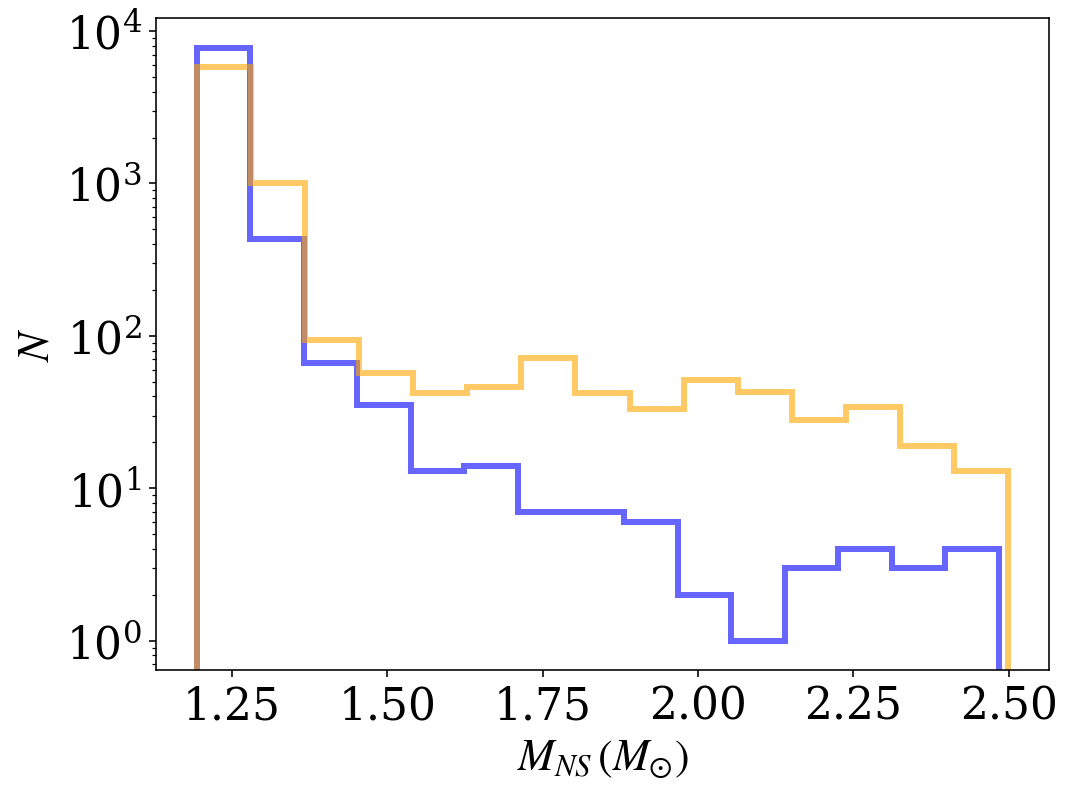

In [10]:
###Number of pulsars and their spin period and magnetic filed distribution
###Separating single and binary MSPs

N_allpsr = [[],[]]; N_msp = [[],[]]; N_ns = []
Ma_12Gyr = []; Mb_12Gyr = []

fig, axs = plt.subplots(figsize=(8,6))
for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    if xx==0:
        psrfile = paths[xx]+'initial2.morepulsars.dat'
    else:
        psrfile = paths[xx]+'initial.morepulsars.dat'
    
    mall = []
    Bsin = []; Psin = []; msin = []
    Bbin = []; Pbin = []; mbin = []; mcomp = []; kcomp = []
    thetime = [10000.,13000.]
    timestep_old=14000.
    npsr_sin = []; npsr_bin = []
    nmsp_sin = []; nmsp_bin = []
    nns = []
    nlbh = []
    with open(psrfile, 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            data = line.split()
            if float(data[1])*t_conv > thetime[1]:
                break
            if float(data[1])*t_conv < thetime[0]:
                continue
            
            timestep = float(data[1])*t_conv
            if timestep>timestep_old:
                if timestep_old<=12000. and timestep>12000.:
                    if xx<=ab_cut:
                        Ma_12Gyr = Ma_12Gyr + mall
                    else:
                        Mb_12Gyr = Mb_12Gyr + mall
                        
                Psin = np.array(Psin)
                Pbin = np.array(Pbin)
                mall = np.array(mall)
                npsr_sin.append(len(Psin)); npsr_bin.append(len(Pbin))
                nmsp_sin.append(len(Psin[Psin<=0.03])); nmsp_bin.append(len(Pbin[Pbin<=0.03]))
                nns.append(len(mall))
                nlbh.append(len(mall[mall>2.5]))
                        
                mall = []
                Bsin = []; Psin = []; msin = []
                Bbin = []; Pbin = []; mbin = []; mcomp = []; kcomp = []
                    
                
            if int(data[2])!=1:
                mall.append(float(data[5]))
                if float(data[7])>=float(data[9])**2*(0.17*10**12):
                    Bsin.append(float(data[7]))
                    Psin.append(float(data[9]))
                    msin.append(float(data[5]))
            else:
                if int(data[11])==13:
                    mall.append(float(data[5]))
                if int(data[11])==13 and float(data[7])>=float(data[9])**2*(0.17*10**12):
                    Bbin.append(float(data[7]))
                    Pbin.append(float(data[9]))
                    mbin.append(float(data[5]))
                    mcomp.append(float(data[6]))
                    kcomp.append(int(data[12]))
                
                if int(data[12])==13:
                    mall.append(float(data[6]))
                if int(data[12])==13 and float(data[8])>=float(data[10])**2*(0.17*10**12):
                    Bbin.append(float(data[8]))
                    Pbin.append(float(data[10]))
                    mbin.append(float(data[6]))
                    mcomp.append(float(data[5]))
                    kcomp.append(int(data[11]))  
            timestep_old = timestep
    
    print('allpsr:', model_label[xx], np.mean(npsr_sin), np.mean(npsr_bin))
    print('msp:', model_label[xx], np.mean(nmsp_sin), np.mean(nmsp_bin))
    
    print('Nns:', model_label[xx], np.mean(nns))
    print('low-mass bh?', model_label[xx], np.mean(nlbh))
    
    N_allpsr[0].append(np.mean(npsr_sin)); N_allpsr[1].append(np.mean(npsr_bin))
    N_msp[0].append(np.mean(nmsp_sin)); N_msp[1].append(np.mean(nmsp_bin))
    N_ns.append(np.mean(nns))

    
axs.hist(Ma_12Gyr, bins=15,
         histtype='step', alpha=0.6, color = 'b', lw=3)
axs.hist(Mb_12Gyr, bins=15,
         histtype='step', alpha=0.6, color = 'orange', lw=3)
    
                                                                 
#axs[0].hist(Psin, 
#            bins = np.logspace(np.log10(np.min(Psin)), np.log10(np.max(Psin)), 15),
#            histtype='step', alpha=0.6, color = cs[xx], lw=3,
#            label = model_label[xx])
#axs[0].hist(Pbin, 
#            bins = np.logspace(np.log10(np.min(Pbin)), np.log10(np.max(Pbin)), 10),
#            histtype='step', alpha=0.6, color = cs[xx], lw=3, ls = '--',
#            label = model_label[xx])
#
#axs[1].hist(Bsin, 
#            bins = np.logspace(np.log10(np.min(Bsin)), np.log10(np.max(Bsin)), 15),
#            histtype='step', alpha=0.6, color = cs[xx], lw=3,
#            label = model_label[xx])
#axs[1].hist(Bbin,
#            bins = np.logspace(np.log10(np.min(Bbin)), np.log10(np.max(Bbin)), 10),
#            histtype='step', alpha=0.6, color = cs[xx], lw=3, ls = '--',
#            label = model_label[xx])
    
#axs[0].set_xscale('log')
#axs[1].set_xscale('log')

axs.set_xlabel(r'$M_{NS}\,(M_{\odot})$')
axs.set_ylabel(r'$N$')
axs.set_yscale('log')
#axs.legend(loc='best', fontsize=15)

plt.savefig(savepath+'ns_mass_all_12Gyr.pdf', dpi=300)

In [11]:
###Number of NS formed in WDWD collision
###PSR and non-PSR

N_ns_wdwdcoll = [[],[]]

for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    if xx==0:
        psrfile = paths[xx]+'initial2.morepulsars.dat'
    else:
        psrfile = paths[xx]+'initial.morepulsars.dat'
    
    wdwd_coll_file = np.genfromtxt(paths[xx]+'ns_wdwd_coll.dat')
    id_coll = wdwd_coll_file[:,2].astype(np.int)
    print('N_ns_wdwd:', model_label[xx], len(id_coll))
    
    thetime = [10000.,13000.]
    IDsin = []; IDsin_coll = []; Psin = []
    IDbin = []; IDbin_coll = []; Pbin = []
    
    timestep_old=14000.
    nsin_psr = 0; nsin_msp = 0
    nbin_psr = 0; nbin_msp = 0
    nns_coll_sin = []; nns_coll_bin = []
    with open(psrfile, 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            data = line.split()
            if float(data[1])*t_conv > thetime[1]:
                break
            if float(data[1])*t_conv < thetime[0]:
                continue
            
            timestep = float(data[1])*t_conv
            if timestep>timestep_old:
                IDsin = np.array(IDsin); Psin = np.array(Psin)
                IDbin = np.array(IDbin); Pbin = np.array(Pbin)
                IDsin_msp = IDsin[Psin<=0.03]
                IDbin_msp = IDbin[Pbin<=0.03]
                
                for ii in range(len(IDsin_coll)):
                    for jj in range(len(IDsin)):
                        if IDsin_coll[ii]==IDsin[jj]:
                            nsin_psr+=1
                            
                    for kk in range(len(IDsin_msp)):
                        if IDsin_coll[ii]==IDsin_msp[kk]:
                            nsin_msp+=1
                
                for ii in range(len(IDbin_coll)):
                    for jj in range(len(IDbin)):
                        if IDbin_coll[ii]==IDbin[jj]:
                            nbin_psr+=1
                            
                    for kk in range(len(IDbin_msp)):
                        if IDbin_coll[ii]==IDbin_msp[kk]:
                            nbin_msp+=1
    
                nns_coll_sin.append(len(IDsin_coll)-nsin_msp)
                nns_coll_bin.append(len(IDbin_coll)-nbin_msp)
    
                IDsin = []; IDsin_coll = []; Psin = []
                IDbin = []; IDbin_coll = []; Pbin = []
            
                nsin_psr = 0; nsin_msp = 0
                nbin_psr = 0; nbin_msp = 0
                
                
            if int(data[2])!=1:
                if int(data[3]) in id_coll:
                    IDsin_coll.append(int(data[3]))
                if float(data[7])>=float(data[9])**2*(0.17*10**12):
                    IDsin.append(int(data[3]))
                    Psin.append(float(data[9]))
            else:
                if int(data[3]) in id_coll:
                    IDbin_coll.append(int(data[3]))
                if int(data[11])==13 and float(data[7])>=float(data[9])**2*(0.17*10**12):
                    IDbin.append(int(data[3]))
                    Pbin.append(float(data[9]))
                    
                if int(data[4]) in id_coll:
                    IDbin_coll.append(int(data[4]))
                if int(data[12])==13 and float(data[8])>=float(data[10])**2*(0.17*10**12):
                    IDbin.append(int(data[4]))
                    Pbin.append(float(data[10]))
                    
            timestep_old = timestep
                    
    #print('sin:', len(IDsin_coll), nsin_psr, nsin_msp)
    #print('bin:', len(IDbin_coll), nbin_psr, nbin_msp)
    print('sin:', model_label[xx], np.mean(nns_coll_sin))
    print('bin:', model_label[xx], np.mean(nns_coll_bin))
                
    N_ns_wdwdcoll[0].append(np.mean(nns_coll_sin)); N_ns_wdwdcoll[1].append(np.mean(nns_coll_bin))

N_ns_wdwd: 1a 98
sin: 1a 37.69230769230769
bin: 1a 2.0828402366863905
N_ns_wdwd: 2a 93
sin: 2a 38.18987341772152
bin: 2a 2.4050632911392404
N_ns_wdwd: 3a 95
sin: 3a 32.135714285714286
bin: 3a 3.7


OSError: /projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/n8-rv0.5-rg8-z0.0002_iccatalog_nstde_s0.2_gctc/ns_wdwd_coll.dat not found.

In [8]:
###Pulsars and their spin period and magnetic filed distribution, and positions in the cluster
###Separating single and binary MSPs
###Identify collision products
Ball = []; Pall = []; mall = []; mcompall = []; kcompall = []; rposall = []
idnsall = []; idcompall = []
wdwdcollflagall = []; wdmscollflagall = []
psrflagall = []; mspflagall = []
modelnoall = []
for xx in range(len(paths)):
    B = []; P = []; m = []; mcomp = []; kcomp = []; rpos = []
    idns = []; idcomp = []
    wdwdcollflag = []; wdmscollflag = []
    psrflag = []; mspflag = []
    modelno = []
    
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    l_conv = dyn.conv('l', paths[xx]+'initial.conv.sh')
    psrfile = paths[xx]+'initial.morepulsars.dat'
    
    wdwd_coll_file = np.genfromtxt(paths[xx]+'ns_wdwd_coll.dat')
    idwdwd_coll = wdwd_coll_file[:,2].astype(np.int)
    
    wdms_coll_file = np.genfromtxt(paths[xx]+'wdms_coll.dat')
    idwdms_coll = wdms_coll_file[:,2].astype(np.int)
    id_wdms = []

    thetime = 14000.
    with open(psrfile, 'r') as fpsr:
        next(fpsr)
        for line in fpsr:
            data = line.split()
            if float(data[1])*t_conv > thetime:
                break
            if float(data[1])*t_conv>=13000.:
                thetime = float(data[1])*t_conv
                #print(thetime)
                if int(data[2])!=1:
                    if int(data[3]) in idwdms_coll:
                        id_wdms.append(int(data[3]))
                    if float(data[7])>=float(data[9])**2*(0.17*10**12):
                        B.append(float(data[7]))
                        P.append(float(data[9]))
                        m.append(float(data[5]))
                        mcomp.append(-100)
                        kcomp.append(-100)
                        rpos.append(float(data[19])*l_conv)
                        idns.append(int(data[3]))
                        idcomp.append(-100)
                        modelno.append(xx)
                        psrflag.append(1)
                        
                        if P[-1]<=0.03:
                            mspflag.append(1)
                        else:
                            mspflag.append(0)
                            
                        if int(data[3]) in idwdwd_coll:
                            wdwdcollflag.append(1)
                        else:
                            wdwdcollflag.append(0)
                            
                        if int(data[3]) in idwdms_coll:
                            wdmscollflag.append(1)
                        else:
                            wdmscollflag.append(0)

                    else:
                        if int(data[3]) in idwdwd_coll:
                            wdwdcollflag.append(1)
                            
                            B.append(float(data[7]))
                            P.append(float(data[9]))
                            m.append(float(data[5]))
                            mcomp.append(-100)
                            kcomp.append(-100)
                            rpos.append(float(data[19])*l_conv)
                            idns.append(int(data[3]))
                            idcomp.append(-100)
                            modelno.append(xx)
                            psrflag.append(0)
                            mspflag.append(0)
                            wdmscollflag.append(0)
           
                else:
                    if int(data[11])==13:
                        if int(data[3]) in idwdms_coll:
                            id_wdms.append(int(data[3]))
                        if float(data[7])>=float(data[9])**2*(0.17*10**12):
                            B.append(float(data[7]))
                            P.append(float(data[9]))
                            m.append(float(data[5]))
                            mcomp.append(float(data[6]))
                            kcomp.append(int(data[12]))
                            rpos.append(float(data[19])*l_conv)
                            idns.append(int(data[3]))
                            idcomp.append(int(data[4]))
                            modelno.append(xx)
                            psrflag.append(1)
                            
                            if P[-1]<=0.03:
                                mspflag.append(1)
                            else:
                                mspflag.append(0)
                                
                            if int(data[3]) in idwdwd_coll:
                                wdwdcollflag.append(1)
                            else:
                                wdwdcollflag.append(0)
                                
                            if int(data[3]) in idwdms_coll:
                                wdmscollflag.append(1)
                            else:
                                wdmscollflag.append(0)

                        else:
                            if int(data[3]) in idwdwd_coll:
                                wdwdcollflag.append(1)
                                
                                B.append(float(data[7]))
                                P.append(float(data[9]))
                                m.append(float(data[5]))
                                mcomp.append(float(data[6]))
                                kcomp.append(int(data[12]))
                                rpos.append(float(data[19])*l_conv)
                                idns.append(int(data[3]))
                                idcomp.append(int(data[4]))
                                modelno.append(xx)
                                psrflag.append(0)
                                mspflag.append(0)
                                wdmscollflag.append(0)

                            
                    if int(data[12])==13:
                        if int(data[4]) in idwdms_coll:
                            id_wdms.append(int(data[4]))
                        if float(data[8])>=float(data[10])**2*(0.17*10**12):
                            B.append(float(data[8]))
                            P.append(float(data[10]))
                            m.append(float(data[6]))
                            mcomp.append(float(data[5]))
                            kcomp.append(int(data[11]))
                            rpos.append(float(data[19])*l_conv)
                            idns.append(int(data[4]))
                            idcomp.append(int(data[3]))
                            modelno.append(xx)
                            psrflag.append(1)
                            
                            if P[-1]<=0.03:
                                mspflag.append(1)
                            else:
                                mspflag.append(0)
                                
                            if int(data[4]) in idwdwd_coll:
                                wdwdcollflag.append(1)
                            else:
                                wdwdcollflag.append(0)
                                
                            if int(data[4]) in idwdms_coll:
                                wdmscollflag.append(1)
                            else:
                                wdmscollflag.append(0)

                        else:
                            if int(data[4]) in idwdwd_coll:
                                wdwdcollflag.append(1)
                                
                                B.append(float(data[8]))
                                P.append(float(data[10]))
                                m.append(float(data[6]))
                                mcomp.append(float(data[5]))
                                kcomp.append(int(data[11]))
                                rpos.append(float(data[19])*l_conv)
                                idns.append(int(data[4]))
                                idcomp.append(int(data[3]))
                                modelno.append(xx)
                                psrflag.append(0)
                                mspflag.append(0)
                                wdmscollflag.append(0)
                                
    P = np.array(P)
    mspflag = np.array(mspflag)
    wdwdcollflag = np.array(wdwdcollflag)
    wdmscollflag = np.array(wdmscollflag)
    
    allmsp = mspflag[mspflag==1]
    wdwdcoll_msp = wdwdcollflag[mspflag==1]
    wdmscoll_msp = wdmscollflag[mspflag==1]
                                
    print(xx, len(allmsp), len(wdwdcoll_msp[wdwdcoll_msp==1]), len(wdmscoll_msp[wdmscoll_msp==1]))
    print(len(id_wdms))
    
    Ball.append(B); Pall.append(P); mall.append(m); mcompall.append(mcomp)
    kcompall.append(kcomp); rposall.append(rpos)
    idnsall.append(idns); idcompall.append(idcomp)
    modelnoall.append(modelno)
    psrflagall.append(psrflag); mspflagall.append(mspflag)
    wdwdcollflagall.append(wdwdcollflag); wdmscollflagall.append(wdmscollflag)
    
                                
#np.savetxt('/projects/b1095/syr904/projects/isolated_MSP/ngc6752_pulsars.txt', 
#           np.c_[modelno, rpos, idns, idcomp, m, mcomp, B, P, kcomp, psrflag, mspflag, wdwdcollflag, wdmscollflag],
#           fmt = '%d %f %d %d %f %f %e %f %d %d %d %d %d', 
#           header = '1.Model 2.R[pc] 3.IDns 4.IDcomp 5.Mns[Msun] 6.Mcomp[Msun] 7.B[G] 8.P[sec] 9.Kcomp 10.PSRflag 11.MSPflag 12.WDWDCollflag 13.WDMSCollflag',
#           comments = '#', delimiter = '')

0 12 0 2
70
1 52 1 1
74
2 17 3 0
72
3 14 1 1
61
4 59 1 1
94
5 117 2 9
140
6 13 4 0
58
7 21 3 4
85


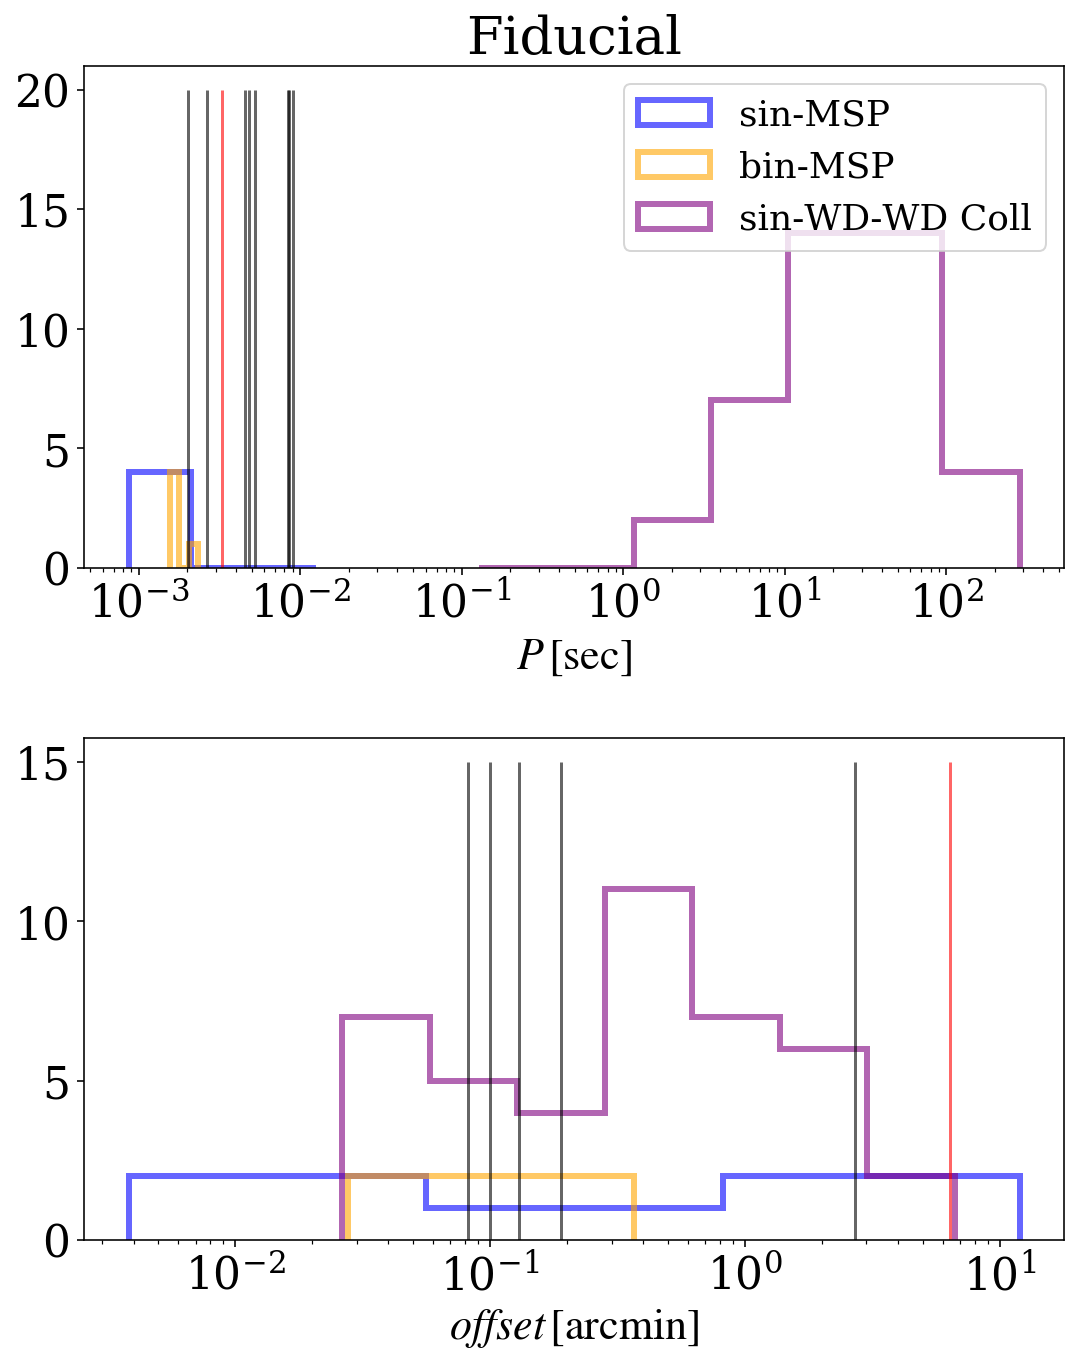

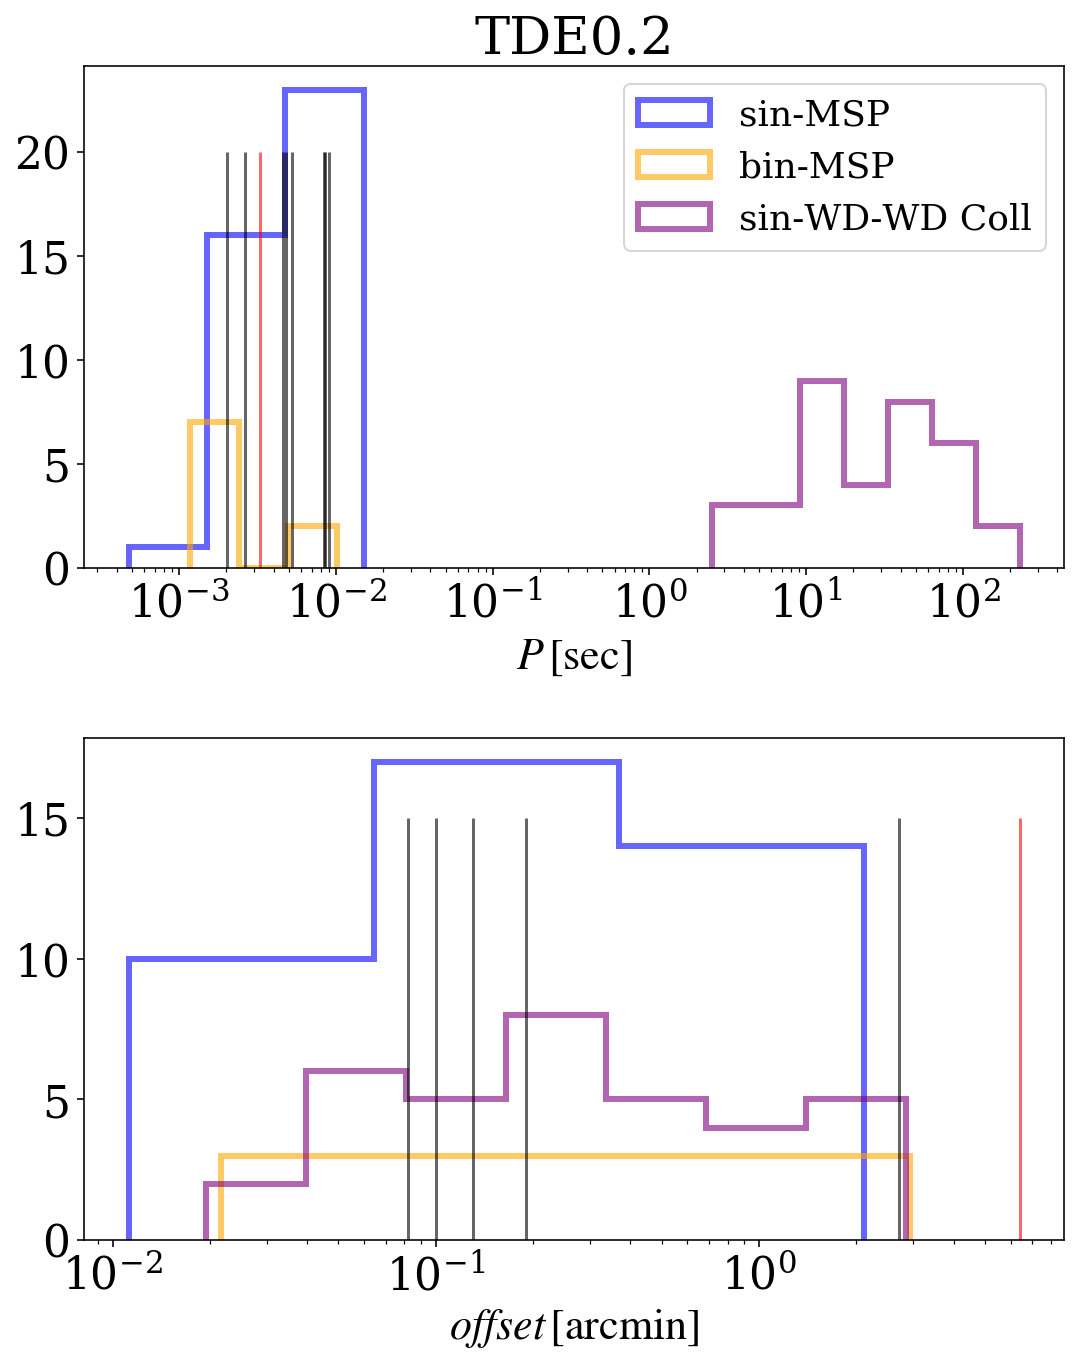

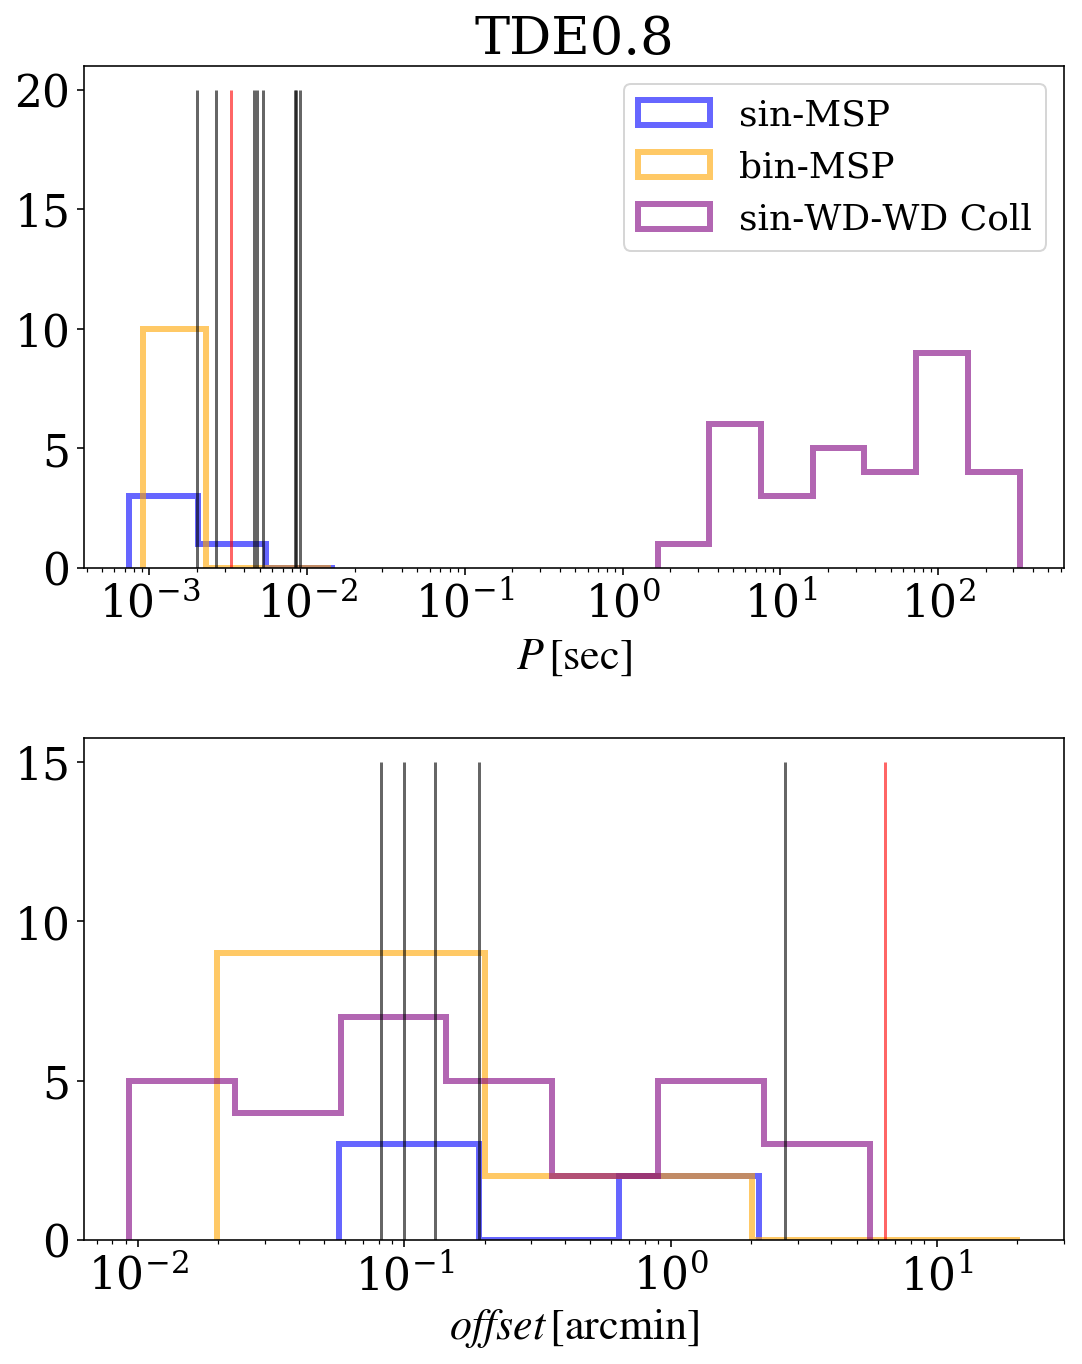

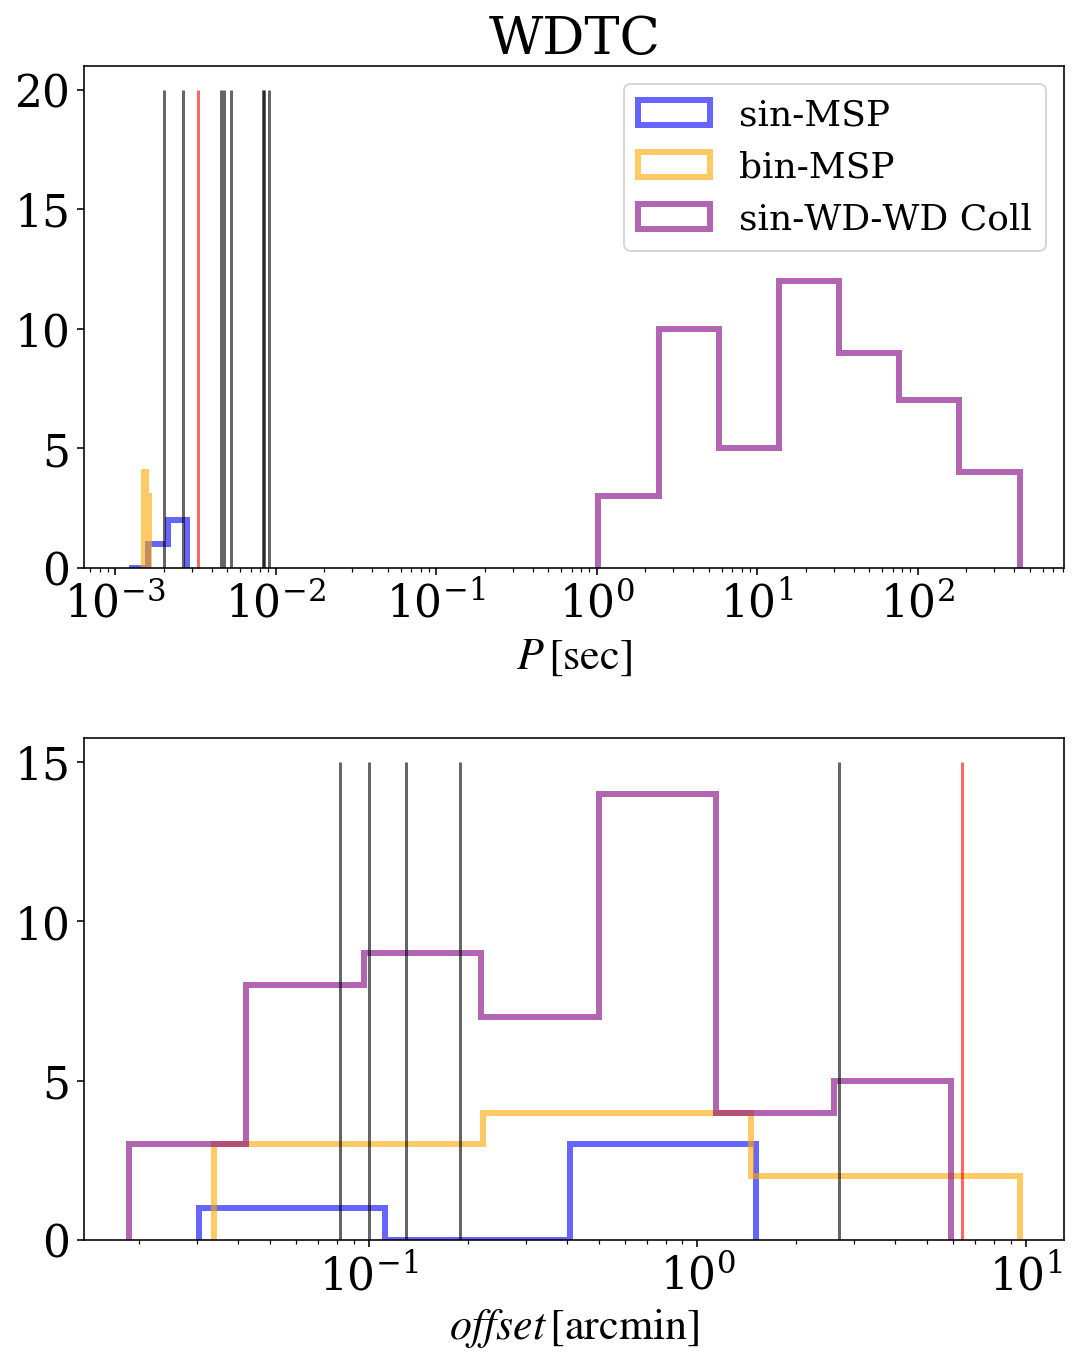

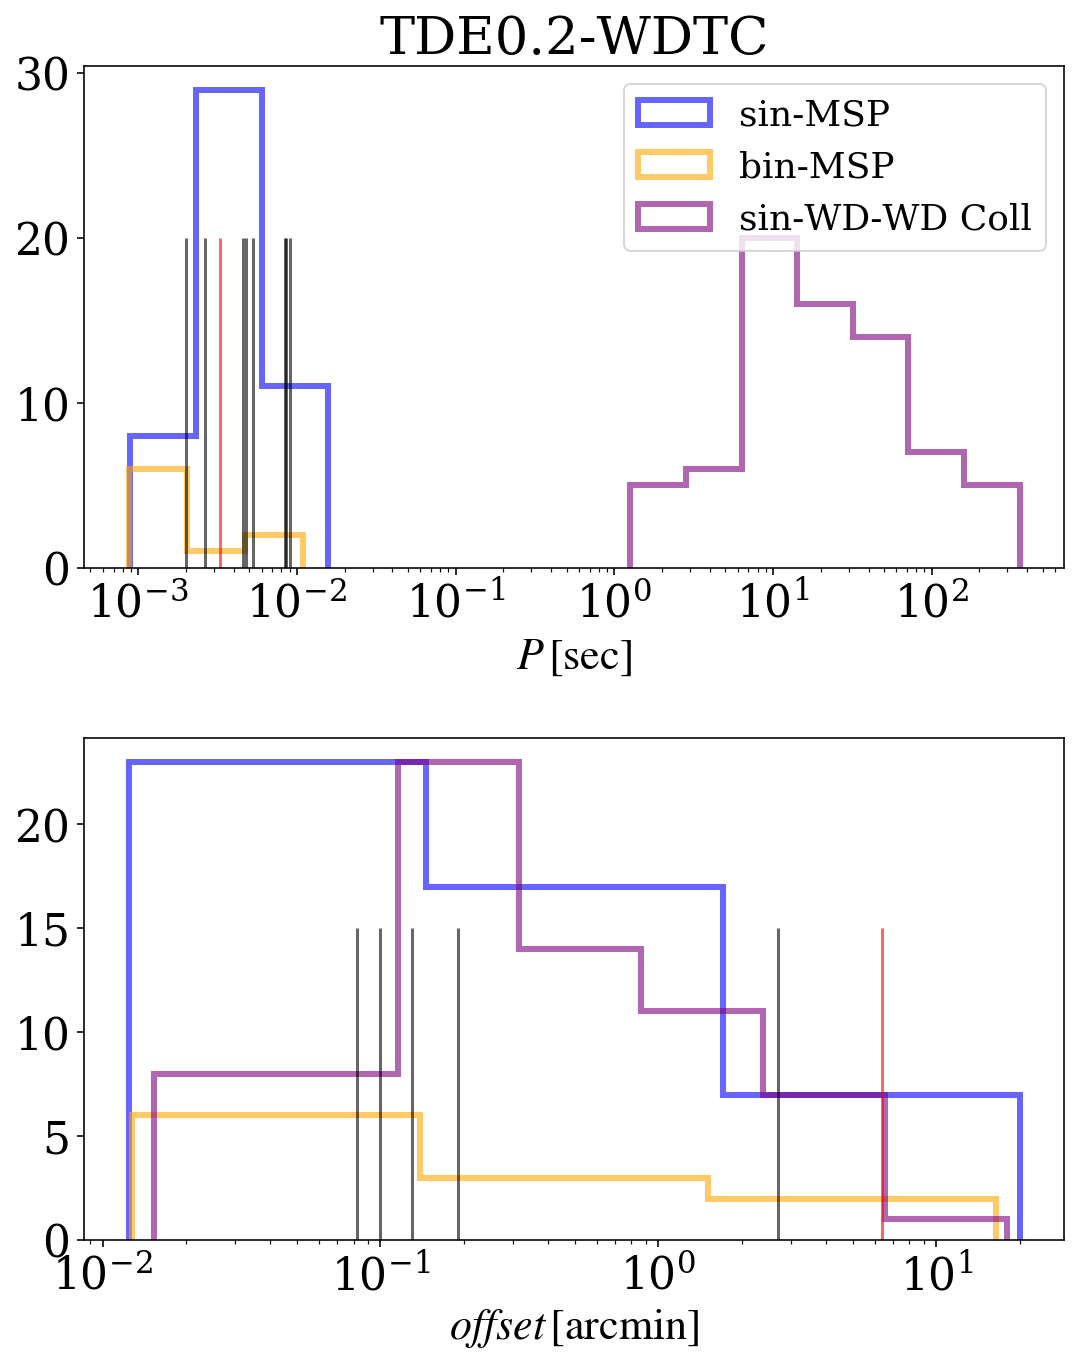

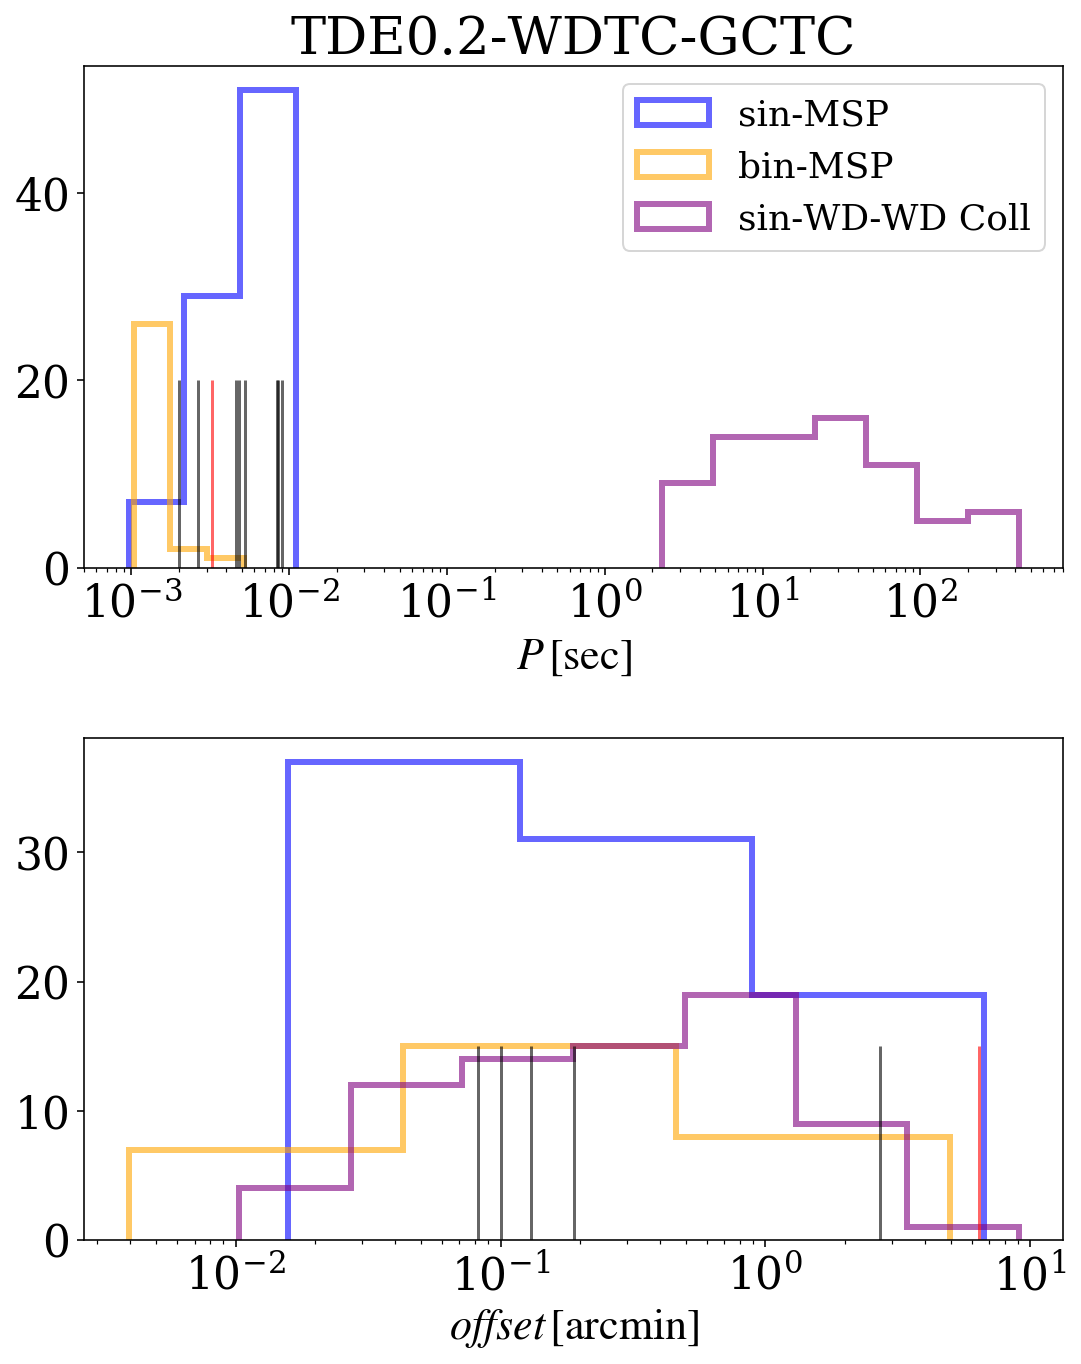

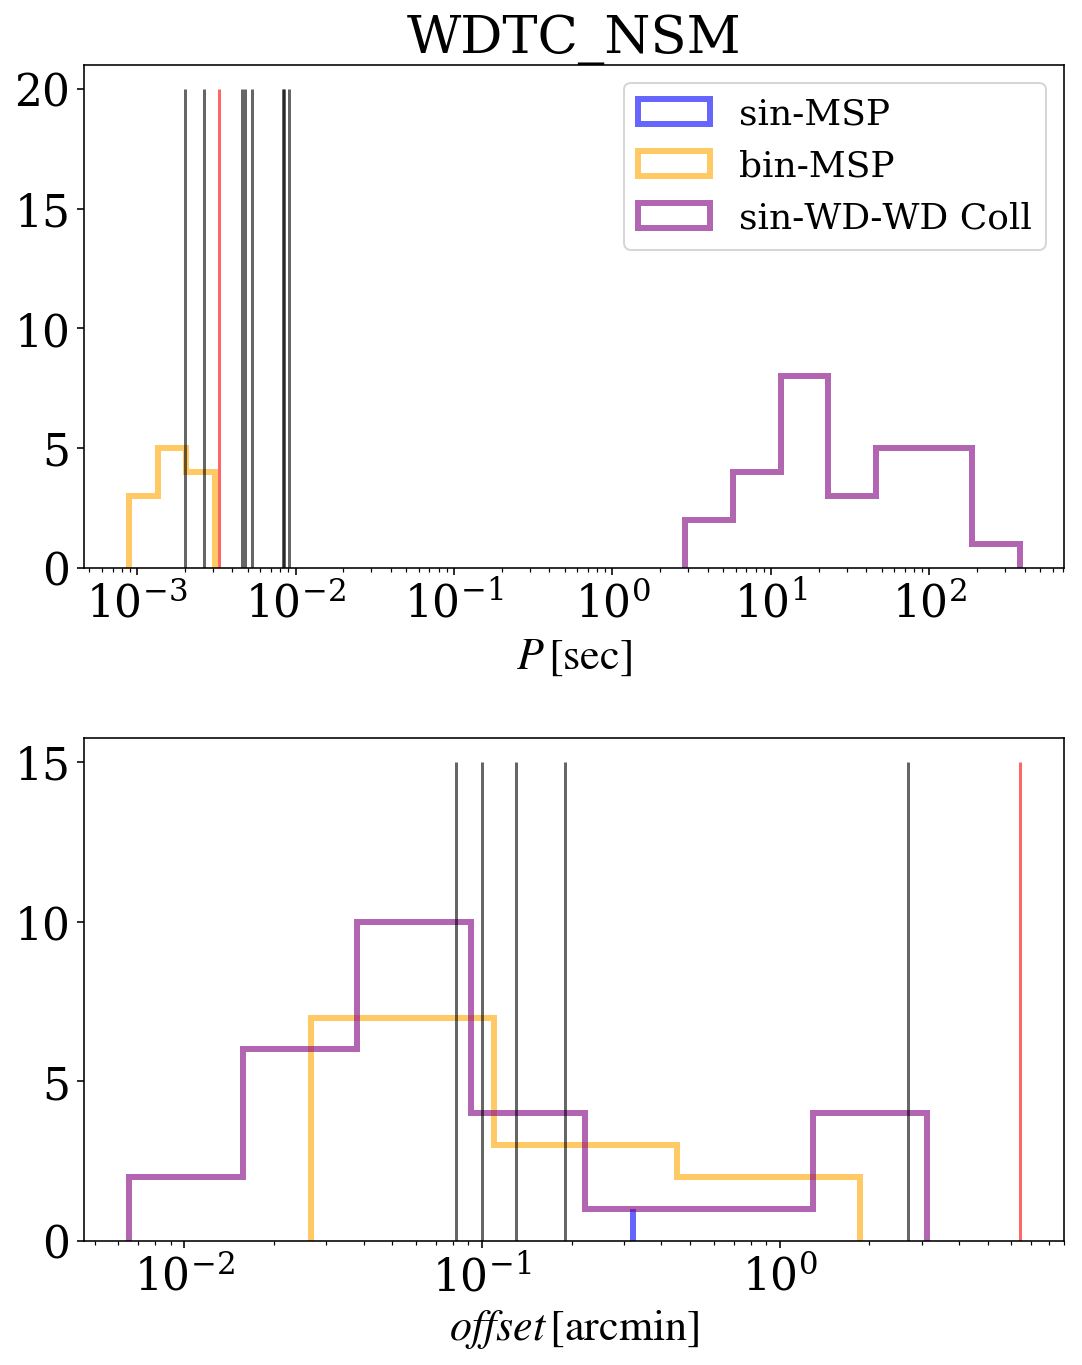

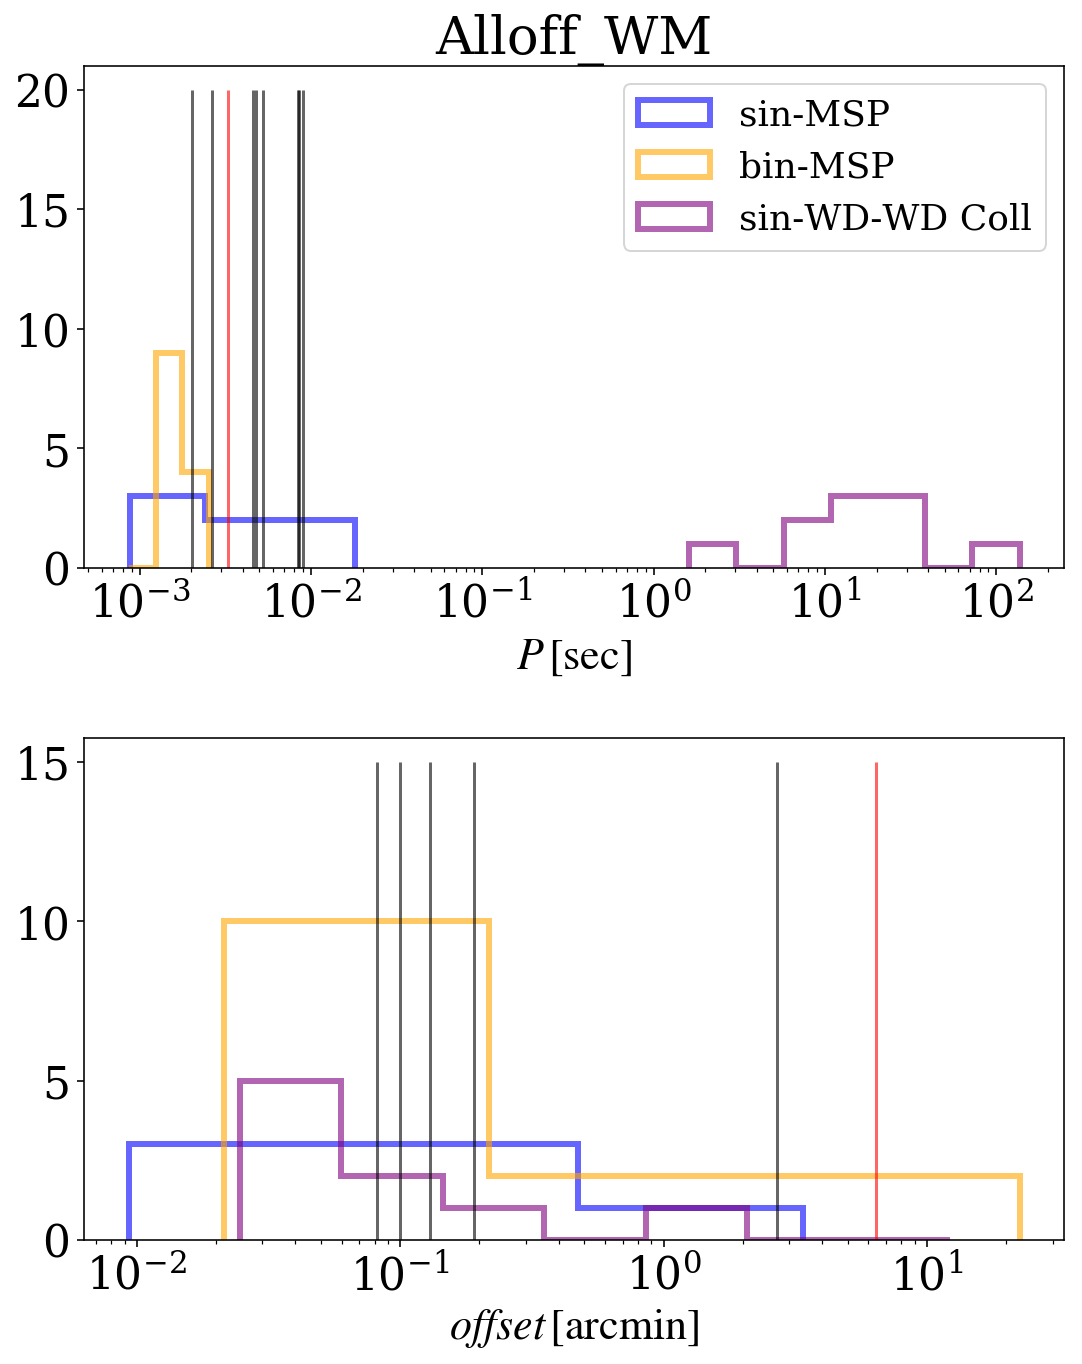

In [9]:
##Ppdot plot and radial distribution
for xx in range(len(paths)):
    P = np.array(Pall[xx])
    mspflag = np.array(mspflagall[xx])
    wdwdcollflag = np.array(wdwdcollflagall[xx])
    rpos = np.array(rposall[xx])
    idcomp = np.array(idcompall[xx])
    modelno = np.array(modelnoall[xx])
    
    wdwdcoll_msp = wdwdcollflag[mspflag==1]
    wdwdcoll_nonmsp = wdwdcollflag[mspflag!=1]
    
    Pmsp = P[mspflag==1]
    Pnonmsp = P[mspflag!=1]
    Pwdwd = Pnonmsp[wdwdcoll_nonmsp==1]
    
    idcomp_msp = idcomp[mspflag==1]
    idcomp_nonmsp = idcomp[mspflag!=1]
    idcomp_wdwd = idcomp_nonmsp[wdwdcoll_nonmsp==1]
    
    rpos_msp = rpos[mspflag==1]
    rpos_nonmsp = rpos[mspflag!=1]
    rpos_wdwd = rpos_nonmsp[wdwdcoll_nonmsp==1]
    
    modelno_msp = modelno[mspflag==1]
    modelno_nonmsp = modelno[mspflag!=1]
    modelno_wdwd = modelno_nonmsp[wdwdcoll_nonmsp==1]
    
    fig, axs = plt.subplots(nrows = 2, figsize=(8,10))
    axs[0].hist(Pmsp[idcomp_msp==-100],
               bins = np.logspace(np.log10(np.min(Pmsp[idcomp_msp==-100])), np.log10(np.max(Pmsp[idcomp_msp==-100])),4),
               histtype='step', alpha=0.6, lw=3, color='b',
               label = 'sin-MSP')
    axs[0].hist(Pmsp[idcomp_msp!=-100],
               bins = np.logspace(np.log10(np.min(Pmsp[idcomp_msp!=-100])), np.log10(np.max(Pmsp[idcomp_msp!=-100])),4),
               histtype='step', alpha=0.6, lw=3, color='orange',
               label = 'bin-MSP')
    axs[0].hist(Pwdwd[idcomp_wdwd==-100],
               bins = np.logspace(np.log10(np.min(Pwdwd[idcomp_wdwd==-100])), np.log10(np.max(Pwdwd[idcomp_wdwd==-100])),8),
               histtype='step', alpha=0.6, lw=3, color='purple',
               label='sin-WD-WD Coll')
    axs[0].vlines(x=dpsr['spin'][0]/1.e3,ymin=0, ymax=20, 
                  color = 'red', alpha=0.6, label=None)
    axs[0].vlines(x=dpsr['spin'][1:]/1.e3, ymin=0, ymax=20, 
                  color = 'k', alpha=0.6, label=None)
    axs[0].set_xscale('log')
    axs[0].legend(loc='best', fontsize=18)
    axs[0].set_xlabel(r'$P\,\rm{[sec]}$')
    axs[0].set_title(model_label[xx])
    
    rpos_msp_arcmin = uc.pc2arcsec(4.125, rpos_msp)/60.
    rpos_wdwd_arcmin = uc.pc2arcsec(4.125, rpos_wdwd)/60.
    axs[1].hist(rpos_msp_arcmin[idcomp_msp==-100],
               bins = np.logspace(np.log10(np.min(rpos_msp_arcmin[idcomp_msp==-100])), np.log10(np.max(rpos_msp_arcmin[idcomp_msp==-100])), 4),
               histtype='step', alpha=0.6, lw=3, color='b',
               label = 'sin-MSP')
    axs[1].hist(rpos_msp_arcmin[idcomp_msp!=-100],
               bins = np.logspace(np.log10(np.min(rpos_msp_arcmin[idcomp_msp!=-100])), np.log10(np.max(rpos_msp_arcmin[idcomp_msp!=-100])), 4),
               histtype='step', alpha=0.6, lw=3, color='orange',
               label = 'bin-MSP')
    axs[1].hist(rpos_wdwd_arcmin[idcomp_wdwd==-100],
               bins = np.logspace(np.log10(np.min(rpos_wdwd_arcmin[idcomp_wdwd==-100])), np.log10(np.max(rpos_wdwd_arcmin[idcomp_wdwd==-100])), 8),
               histtype='step', alpha=0.6, lw=3, color='purple',
               label='sin-WD-WD Coll')
    axs[1].vlines(x=dpsr['offset'][dpsr['offset']!='*'][0], ymin=0, ymax=15,
                 color = 'red', alpha=0.6, label=None)
    axs[1].vlines(x=dpsr['offset'][dpsr['offset']!='*'][1:], ymin=0, ymax=15,
                 color = 'k', alpha=0.6, label=None)
    axs[1].set_xscale('log')
    axs[1].set_xlabel(r'$offset\,\rm{[arcmin]}$')
    
    fig.tight_layout()

In [9]:
###Number of BHs and mass of cluster
for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')
    m_conv = dyn.conv('m', paths[xx]+'initial.conv.sh')
    bhfile = paths[xx]+'initial.bh.dat'
    dynfile = paths[xx]+'initial.dyn.dat'
    
    thetime = [10000., 13000.]
    nbh = []; mass = []
    with open(bhfile, 'r') as fbh:
        next(fbh)
        for line in fbh:
            data = line.split()
            if float(data[1])*t_conv > thetime[1]:
                break
            if float(data[1])*t_conv < thetime[0]:
                continue
            nbh.append(int(data[2]))
            #print(float(data[1])*t_conv)
                
    print(model_label[xx])
    print('bh', np.mean(nbh))
                
    with open(dynfile, 'r') as fdyn:
        next(fdyn); next(fdyn)
        for line in fdyn:
            data = line.split()
            if float(data[0])*t_conv > thetime[1]:
                break
            if float(data[0])*t_conv < thetime[0]:
                continue
            mass.append(float(data[4])*m_conv)
            
    print('mass', np.mean(mass))
                

Fiducial
bh 6.783825640250812
mass 202856.58555707172
TDE0.2
bh 3.754277357338596
mass 202657.65859823028
TDE0.8
bh 2.7940068068903465
mass 209512.94041242753
WDTC
bh 1.846067939718227
mass 203446.76112330687
TDE0.2-WDTC
bh 5.187375612654092
mass 201178.78504277105
TDE0.2-WDTC-GCTC
bh 3.509467344249953
mass 191455.45684148773
WDTC_NSM
bh 5.4712340399720985
mass 210318.061722219
Alloff_WM
bh 8.686758550516847
mass 202714.2096140863


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


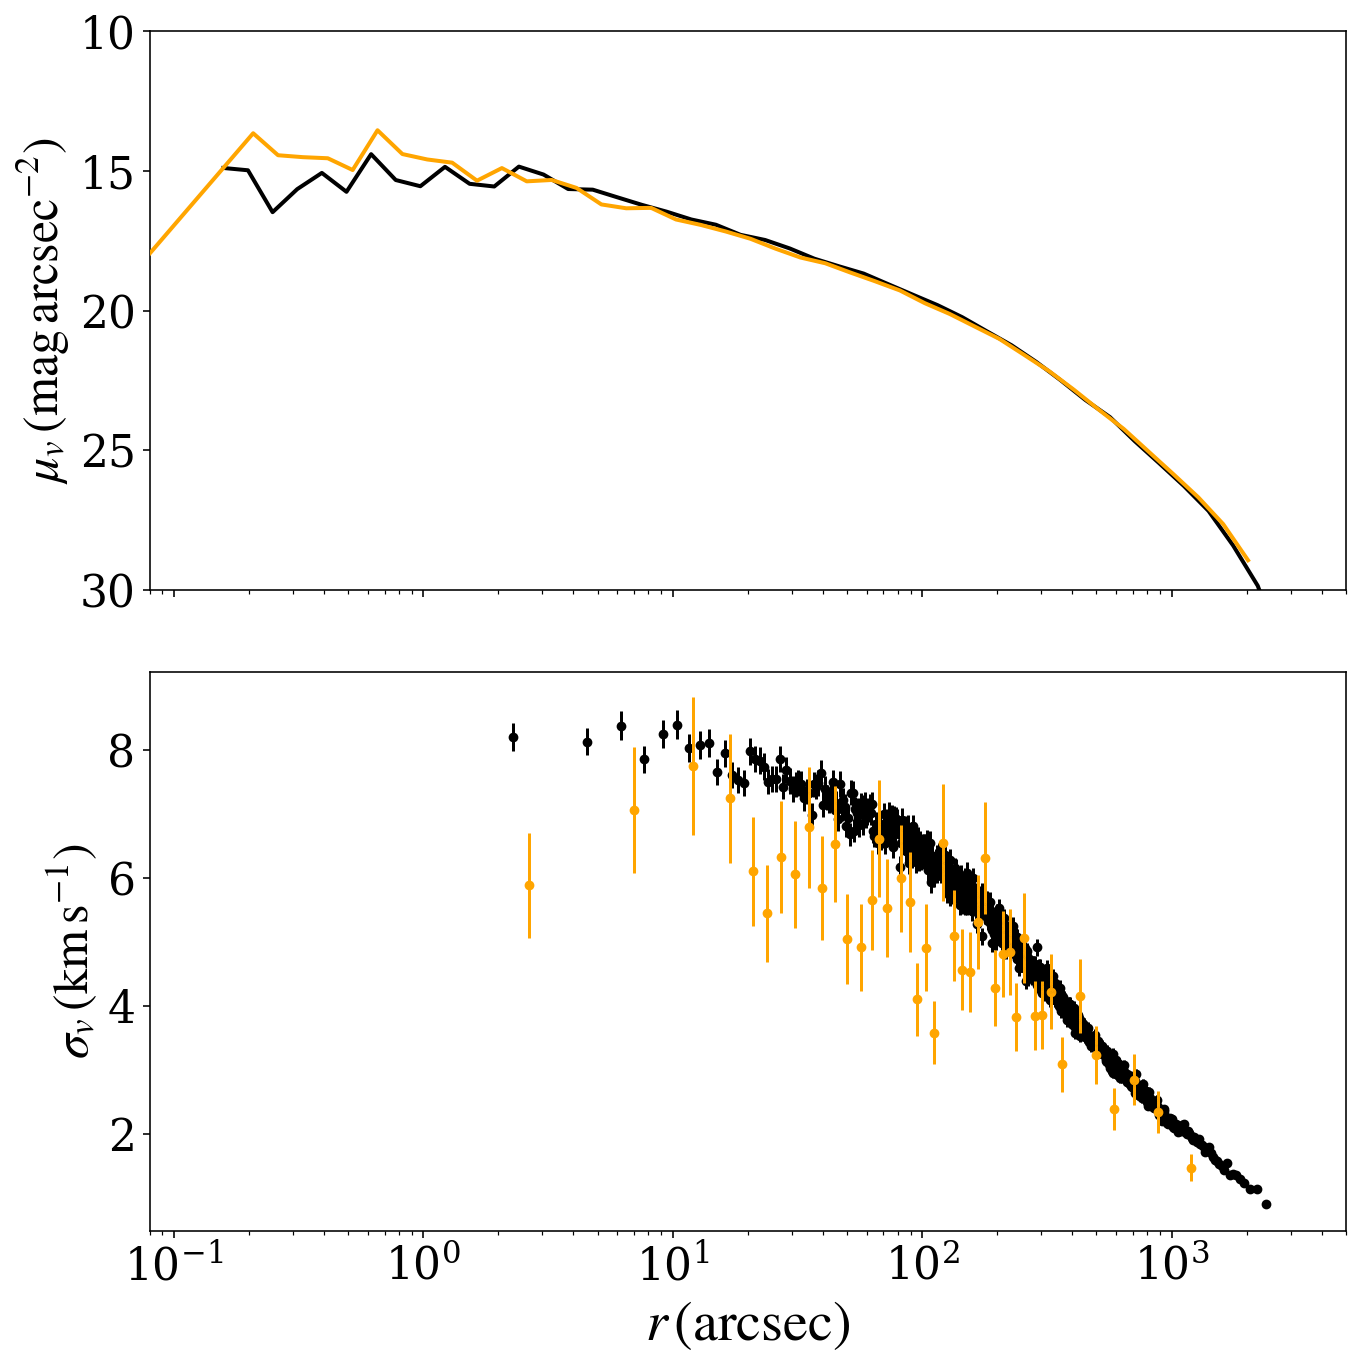

In [8]:
##Plot the best model using King profile
paths = ['/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.8-rg8-z0.0002_iccatalog_micwd_newnsfile_dynwdmt_wdmass/',
        '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/']

R_sun_obs=4.125
snapno = [459,597]

cs = ['k', 'orange']
####################################################      
##Plotting        
fig, ax=plt.subplots(nrows = 2, sharex=True, sharey=False, figsize=(10,10))
for xx in range(len(paths)):
    t_conv = dyn.conv('t', paths[xx]+'initial.conv.sh')

    ######################################################
    ##Model data
    if xx == 0:
        snap2D = paths[xx]+'initial.snap'+str(snapno[xx])+'.2Dproj.dat.gz'
        snap2D_L15 = paths[xx]+'initial.snap'+str(snapno[xx])+'.2D_SBPLcut12_NCUT-1.dat'
        snap_veldisp = paths[xx]+'initial.snap'+str(snapno[xx])+'.vel_dispersion_vr_pm_700_0.dat'
    else:
        snap2D = paths[xx]+'initial.snap0'+str(snapno[xx])+'.2Dproj.dat.gz'
        snap2D_L15 = paths[xx]+'initial.snap0'+str(snapno[xx])+'.2D_SBPLcut15.dat'
        snap_veldisp = paths[xx]+'initial.snap0'+str(snapno[xx])+'.vel_dispersion_giants_25.dat'

    
    data5 = np.genfromtxt(snap2D_L15)
    arcsec = conversions.pc_to_arcsec(data5[:,1],R_sun_obs)
    SB = conversions.SB_converter(data5[:,3])
    SBerr = data5[:,6]/data5[:,5]*SB
    SD = conversions.SD_converter(data5[:,5], R_sun_obs)
    SDerr = conversions.SD_converter(data5[:,6], R_sun_obs)
     
    arcsec_cut = []
    SB_cut = []
    SBerr_cut = []

    for k in range(len(SB)):
        if arcsec[k] < 10 and SB[k] > 20:
            Nothing = 0
        else:
            arcsec_cut.append(arcsec[k])
            SB_cut.append(SB[k])
            
                
    data_vel = np.genfromtxt(snap_veldisp)
    R_model = conversions.pc_to_arcsec(data_vel[:,0],R_sun_obs)
    sigma_model = data_vel[:,1]
    sigma_err_model = data_vel[:,2]


    #######################
    ##Plotting model data
    ax[0].plot(arcsec_cut, np.array(SB_cut), color = cs[xx], lw=2, zorder = 3)
    ax[1].scatter(R_model, sigma_model,s=15, color = cs[xx], zorder=3)
    ax[1].errorbar(R_model,sigma_model,yerr=sigma_err_model, color = cs[xx], fmt='o',markersize=0.01,zorder=3)


    #######################
    ax[0].set_xscale('log')
    ax[0].set_xlim(0.08,5000)
    ax[0].set_ylim(30,10)
    ax[0].set_ylabel(r'$\mu_v\,(\rm{mag\, arcsec^{-2}})$',fontsize=25)
    ax[0].legend(loc='best',scatterpoints=1, ncol=1, prop={'size': 15}, frameon=False)
    

    ax[1].set_xscale('log')
    ax[1].set_xlim(0.08,5000)
    ax[1].set_xlabel(r'$r\,(\rm{arcsec})$',fontsize=28)
    ax[1].set_ylabel(r'$\sigma_v\,(\rm{km\,s^{-1}})$',fontsize=25)
    ax[1].legend(loc='best', prop={'size': 15}, numpoints=1, frameon=False)
        
fig.tight_layout()


13065.4
13090.0
13132.4
13050.6
13144.6
13041.6
13185.1
13177.2


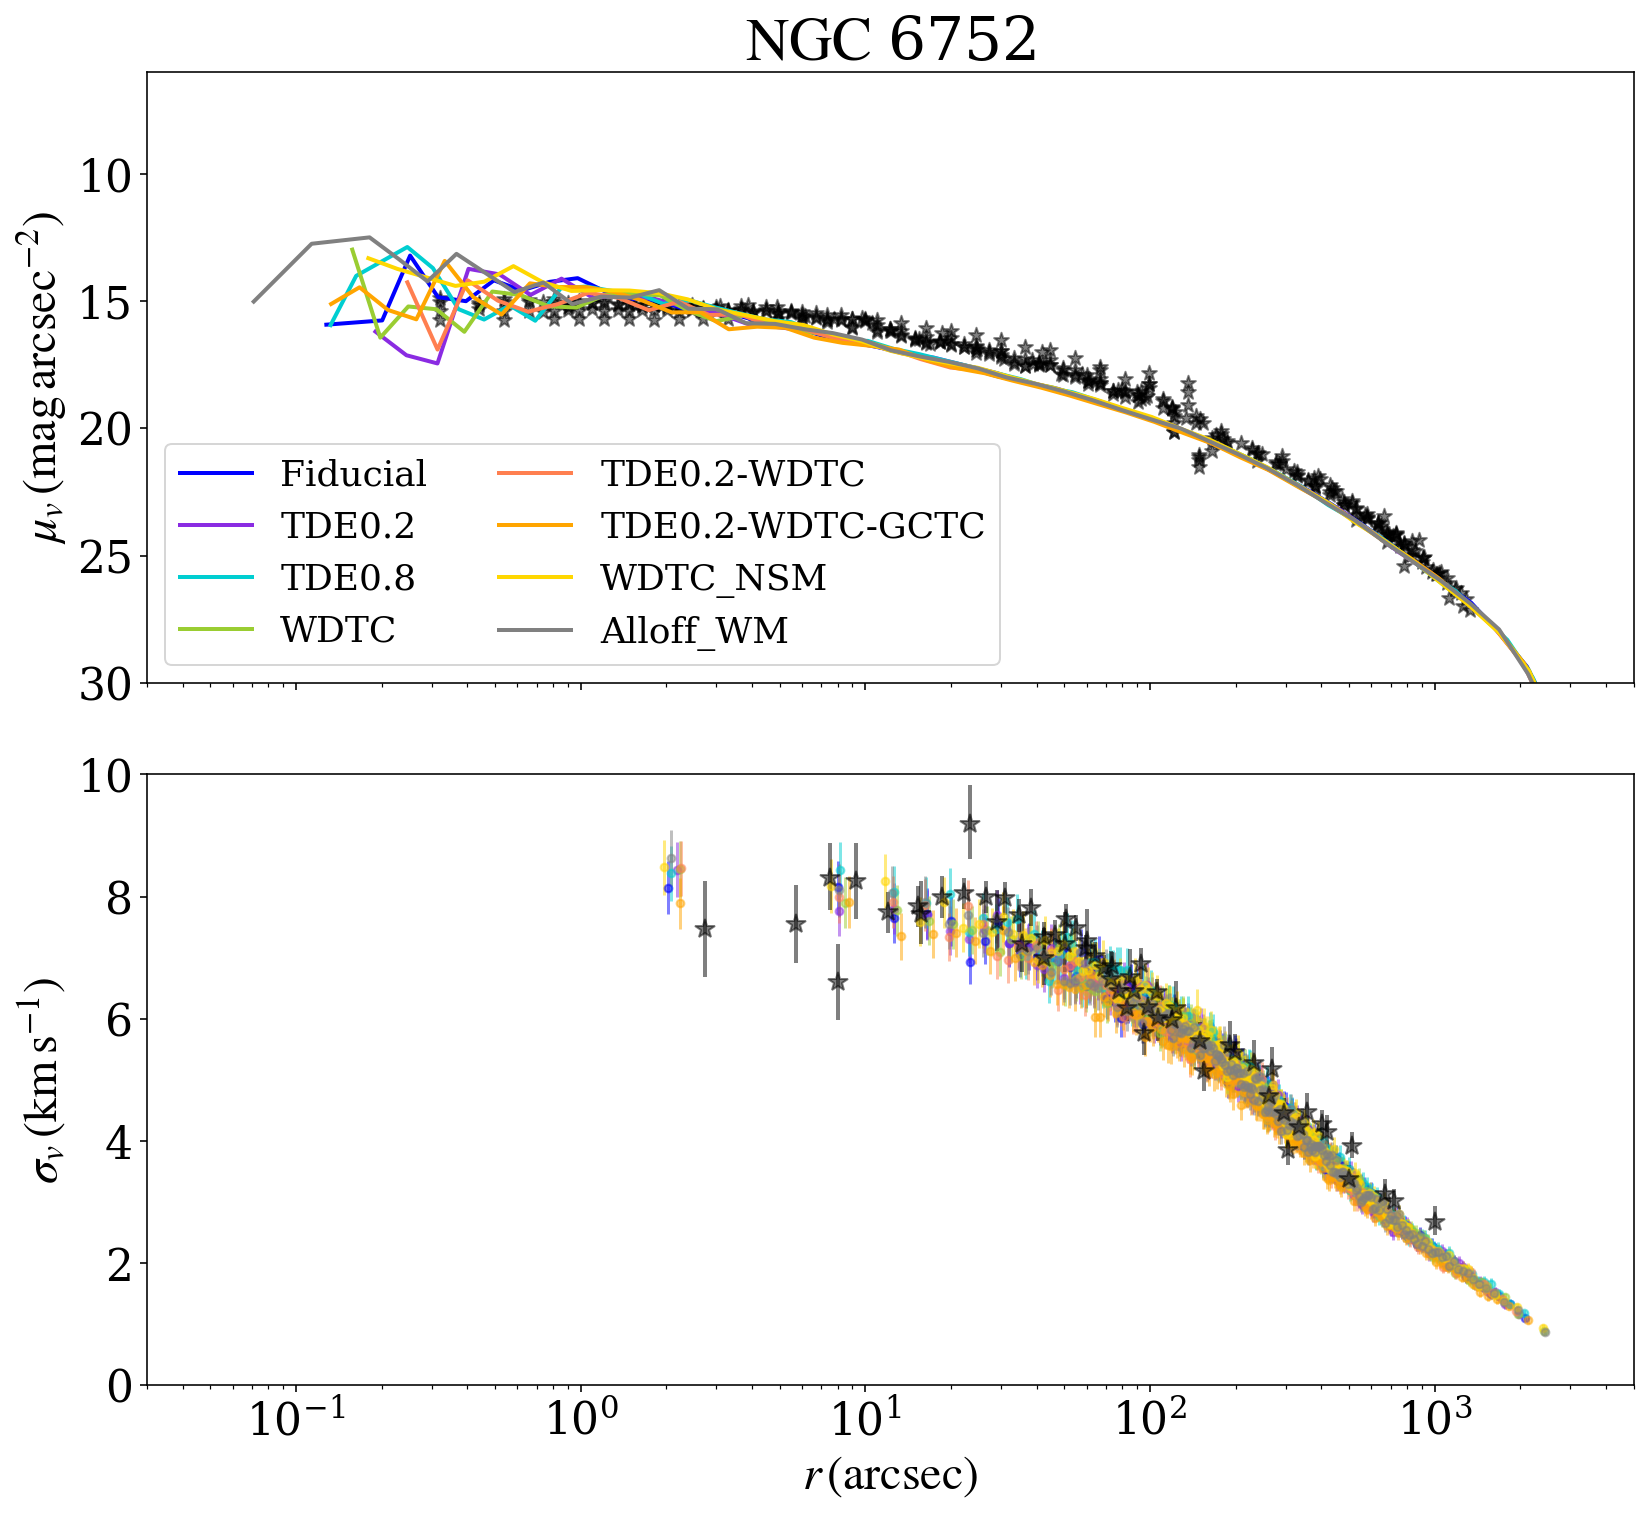

In [12]:
##Surface brightness and velocity dispersion profiles
###Observations###
R_sun_obs=4.125
ngcno='6752'

ft = open('makeSBP/trager.dat','r')
linest = ft.readlines()

fv = open('makeSBP/vel_dispersion_profiles_GEDR3.dat','r')
linesv = fv.readlines()

flag = 0
#### find observed SBP from trager file
arcsec_t = []
SB_t = []
for k in range(len(linest)):
    linet = linest[k]
    linet = linet.split('\n')
    linet = linet[0]
    linet = linet.split('\t')
    cluster_tregar = linet[1]
    if cluster_tregar == 'ngc'+ngcno:
        arcsec_t.append(np.float(linet[2]))
        SB_t.append(np.float(linet[3]))
        flag = 1
arcsec_t = np.array(arcsec_t[:])
SB_t = np.array(SB_t[:])
if flag == 0:
        print('Trager doesnt have the SBP or sigma v profile')
        sys.exit()

flag = 0
#### find observed sigma_v profile
datav = np.genfromtxt('makeSBP/vel_dispersion_profiles_GEDR3.dat')
R_obs = [] # in arcsec
sigma_obs = []
sigma_err_obs_up = []
sigma_err_obs_down = []
for k in range(len(linesv)):
    linev = linesv[k]
    linev = linev.split('\n')
    linev = linev[0]
    linev = linev.split(' ')
    cluster_sigma = linev[0]
    if cluster_sigma == 'NGC'+ngcno:
        R_obs.append(datav[k,1])
        sigma_obs.append(datav[k,2])
        sigma_err_obs_up.append(datav[k,3])
        sigma_err_obs_down.append(datav[k,4])
        flag = 1
R_obs = np.array(R_obs[:])
sigma_obs = np.array(sigma_obs[:])
sigma_err_obs_up = np.array(sigma_err_obs_up[:])
sigma_err_obs_down = np.array(sigma_err_obs_down[:])
############
if flag == 0:
        print('No observed sigmav profile')
        sys.exit()
        

fig, ax=plt.subplots(2, 1, sharex=True,  figsize=(12,11))
ax[0].set_title(r'$\rm{NGC}\ $'+ngcno, fontsize=30)
ax[0].scatter(10**arcsec_t[:], SB_t[:], facecolor='k', marker = '*', 
              alpha=0.5, s=60)#, label=r'$\rm{Trager\,et\,al.\,1995}$')
ax[1].errorbar(R_obs,sigma_obs,yerr=[sigma_err_obs_down,sigma_err_obs_up], fmt='*', 
               markersize = 10, alpha=0.5, c='k', lw=2.0)
ax[1].scatter([10000,10000], [-5,-5], c='k', marker = '*', alpha=0.5,
              label=r'$\rm{Baumgardt\,&\,Hilker\,(2018)}$')     

###Models###
for xx in range(len(paths)):
    if xx>=0:
        snap2D = np.sort(glob(paths[xx]+'initial.snap*.2Dproj.dat.gz'))
        snap2D_L12 = np.sort(glob(paths[xx]+'initial.snap*.2D_SBPLcut12_NCUT-1.dat'))
        snap_vel700 = np.sort(glob(paths[xx]+'initial.snap*.vel_dispersion_vr_pm_700_0.dat'))
    else:
        snap2D = [paths[xx]+'initial.snap0597.2Dproj.dat.gz']
        snap2D_L12 = [paths[xx]+'initial.snap0597.2D_SBPLcut15.dat']
        snap_vel700 = [paths[xx]+'initial.snap0597.vel_dispersion_giants_25.dat']
        #print(len(snap2D_L12), len(snap_vel700))
 
    for ii in range(0, len(snap2D_L12)):
        with open(snap2D_L12[ii], 'r') as f2D:
            first_line=f2D.readline()

        t_gyr = float(first_line.strip().split('=')[-1])
        if t_gyr>=13000.:
            print(t_gyr)
            data5 = np.genfromtxt(snap2D_L12[ii])
            arcsec = conversions.pc_to_arcsec(data5[:,1],R_sun_obs)
            SB = conversions.SB_converter(data5[:,3])
            SBerr = data5[:,6]/data5[:,5]*SB
            
            arcsec_cut = []
            SB_cut = []
            SBerr_cut = []
            for k in range(len(SB)):
                if arcsec[k] < 10 and SB[k] > 20:
                    Nothing = 0
                else:
                    arcsec_cut.append(arcsec[k])
                    SB_cut.append(SB[k])
                    #SBerr_cut.append(SBerr[k])
        
            datavel = np.genfromtxt(snap_vel700[ii])
            R_model = conversions.pc_to_arcsec(datavel[:,0],R_sun_obs)
            sigma_model = datavel[:,1]
            sigma_err_model = datavel[:,2]
        
            ax[0].plot(arcsec_cut, SB_cut, lw=2, color=cs[xx])
            ax[0].plot([10000,10000],[-5,-5], lw=2, label=model_label[xx], color=cs[xx])
            ax[1].scatter(R_model[::3], sigma_model[::3],s=15,zorder=2,alpha=0.5, color=cs[xx])
            ax[1].errorbar(R_model[::3],sigma_model[::3],yerr=2*sigma_err_model[::3], fmt='o',
                           markersize=0.01,zorder=1,alpha=0.5, color=cs[xx])

            break

ax[0].set_ylim(30,6)
ax[0].set_xscale('log')
ax[0].set_xlim(0.03,5000)
ax[0].set_ylabel(r'$\mu_v\,(\rm{mag\,arcsec^{-2}})$',fontsize=24)
ax[0].legend(loc='best',scatterpoints=1, ncol=2, prop={'size': 18})

ax[1].set_xscale('log')
ax[1].set_xlim(0.03,5000)
ax[1].set_ylim(0, 10)
ax[1].set_xlabel(r'$r\,(\rm{arcsec})$',fontsize=24)
ax[1].set_ylabel(r'$\sigma_v\,(\rm{km\,s^{-1}})$',fontsize=24)
#ax[1].legend(loc=3,scatterpoints=1, ncol=2, prop={'size': 20})

plt.subplots_adjust(hspace=0.1)
fig.tight_layout()

#plt.savefig(savepath+'sbp_vdp_6752.pdf', dpi=300)

In [14]:
##NS-MS TDE Function
Gmks = 6.67408e-11 ##m^3 kg^-1 s^-2
def func_nsms_tde_old(Mns, Mstar, Rstar, Kstar, B_old, ospin_old):
    if Mns >= Mstar:
        if Mstar < 0.001:
            coll_multiple = pow(Mns/0.001,1./3.)
        else:
            coll_multiple = pow(Mns/Mstar,1./3.)
    else:
        coll_multiple = 1
        
    s=0.2
    C = 2*s/(2*s+1)
    Racc = 1e4 ##meters
    Rdi = 2*coll_multiple*Rstar*6.957e8  ##in meters
    tvi = 1.*24.*3600.
    Mns_mks = Mns*1.988e30
    
    if Kstar==0:
        Mdi=0.2*Mstar*1.988e30  ##in kg
    elif Kstar==1:
        Mdi=0.9*Mstar*1.988e30
        
    t_array = np.linspace(2, 6, 400)
    #print(t_array)
    Macc = 0; Jacc = 0
    for xx in range(len(t_array)-1):
        Mt = (Mdi/tvi)*(Racc/Rdi)**s*(1+3*(1-C)*pow(10, t_array[xx])/tvi)**(-(1+3*(1+2*s/3)*(1-C))/3/(1-C))
        Macc = Macc+Mt*(pow(10, t_array[xx+1])-pow(10, t_array[xx]))
        Jt = Mt*(math.sqrt(Gmks*(Mns_mks+Macc)*Racc)+0.5*Macc*math.sqrt(Gmks*Racc/(Mns_mks+Macc)))
        Jacc = Jacc+Jt*(pow(10, t_array[xx+1])-pow(10, t_array[xx]))
        
    Jacc = Jacc/1.988e30/6.957e8**2*3.154e7
    Jnew = (2./5.)*Mns*(1.4e-5)**2*ospin_old+Jacc
    Mns_new = Mns+Macc/1.988e30
    ospin_new = Jnew/(2./5.)/Mns/(1.4e-5)**2
    B_new = B_old/(1.+Macc/1.988e30/1e-6)+5e7
    
    return ospin_new, B_new, Mns_new, Macc/1.988e30


def func_nsms_tde(Mns, Mstar, Rstar, Kstar, B_old, ospin_old):
    if Mns >= Mstar:
        if Mstar < 0.001:
            coll_multiple = pow(Mns/0.001,1./3.)
        else:
            coll_multiple = pow(Mns/Mstar,1./3.)
    else:
        coll_multiple = 1
        
    s=0.2
    C = 2*s/(2*s+1)
    Racc = 1e4 ##meters
    Rdi = 2*coll_multiple*Rstar*6.957e8  ##in meters
    tvi = 1.*24.*3600.
    Mns_mks = Mns*1.988e30
    
    #if Kstar==0:
    #    Mdi=0.2*Mstar*1.988e30  ##in kg
    #elif Kstar==1:
    #    Mdi=0.9*Mstar*1.988e30
    
    #if Mstar<0.08:
    #    Mdi = 0.2*Mstar*1.988e30
    #elif Mstar>=0.08 and Mstar<=1.32:
    #    Mdi = (35./62.*(Mstar-0.08)+0.2)*Mstar*1.988e30
    #else:
    Mdi=0.9*Mstar*1.988e30
        
    t_array = np.linspace(2, 6, 400)
    #print(t_array)
    Macc = 0; Jacc = 0
    for xx in range(len(t_array)-1):
        Mt = (Mdi/tvi)*(Racc/Rdi)**s*(1+3*(1-C)*pow(10, t_array[xx])/tvi)**(-(1+3*(1+2*s/3)*(1-C))/3/(1-C))
        Macc = Macc+Mt*(pow(10, t_array[xx+1])-pow(10, t_array[xx]))
        Jt = Mt*(math.sqrt(Gmks*(Mns_mks+Macc)*Racc)+0.5*Macc*math.sqrt(Gmks*Racc/(Mns_mks+Macc)))
        Jacc = Jacc+Jt*(pow(10, t_array[xx+1])-pow(10, t_array[xx]))
        
    Jacc = Jacc/1.988e30/6.957e8**2*3.154e7
    Jnew = (2./5.)*Mns*(1.4e-5)**2*ospin_old+Jacc
    Mns_new = Mns+Macc/1.988e30
    ospin_new = Jnew/(2./5.)/Mns_new/(1.4e-5)**2
    B_new = B_old/(1.+Macc/1.988e30/1e-6)+5e7
    
    return ospin_new, B_new, Mns_new, Macc/1.988e30

154 154
False
187
132


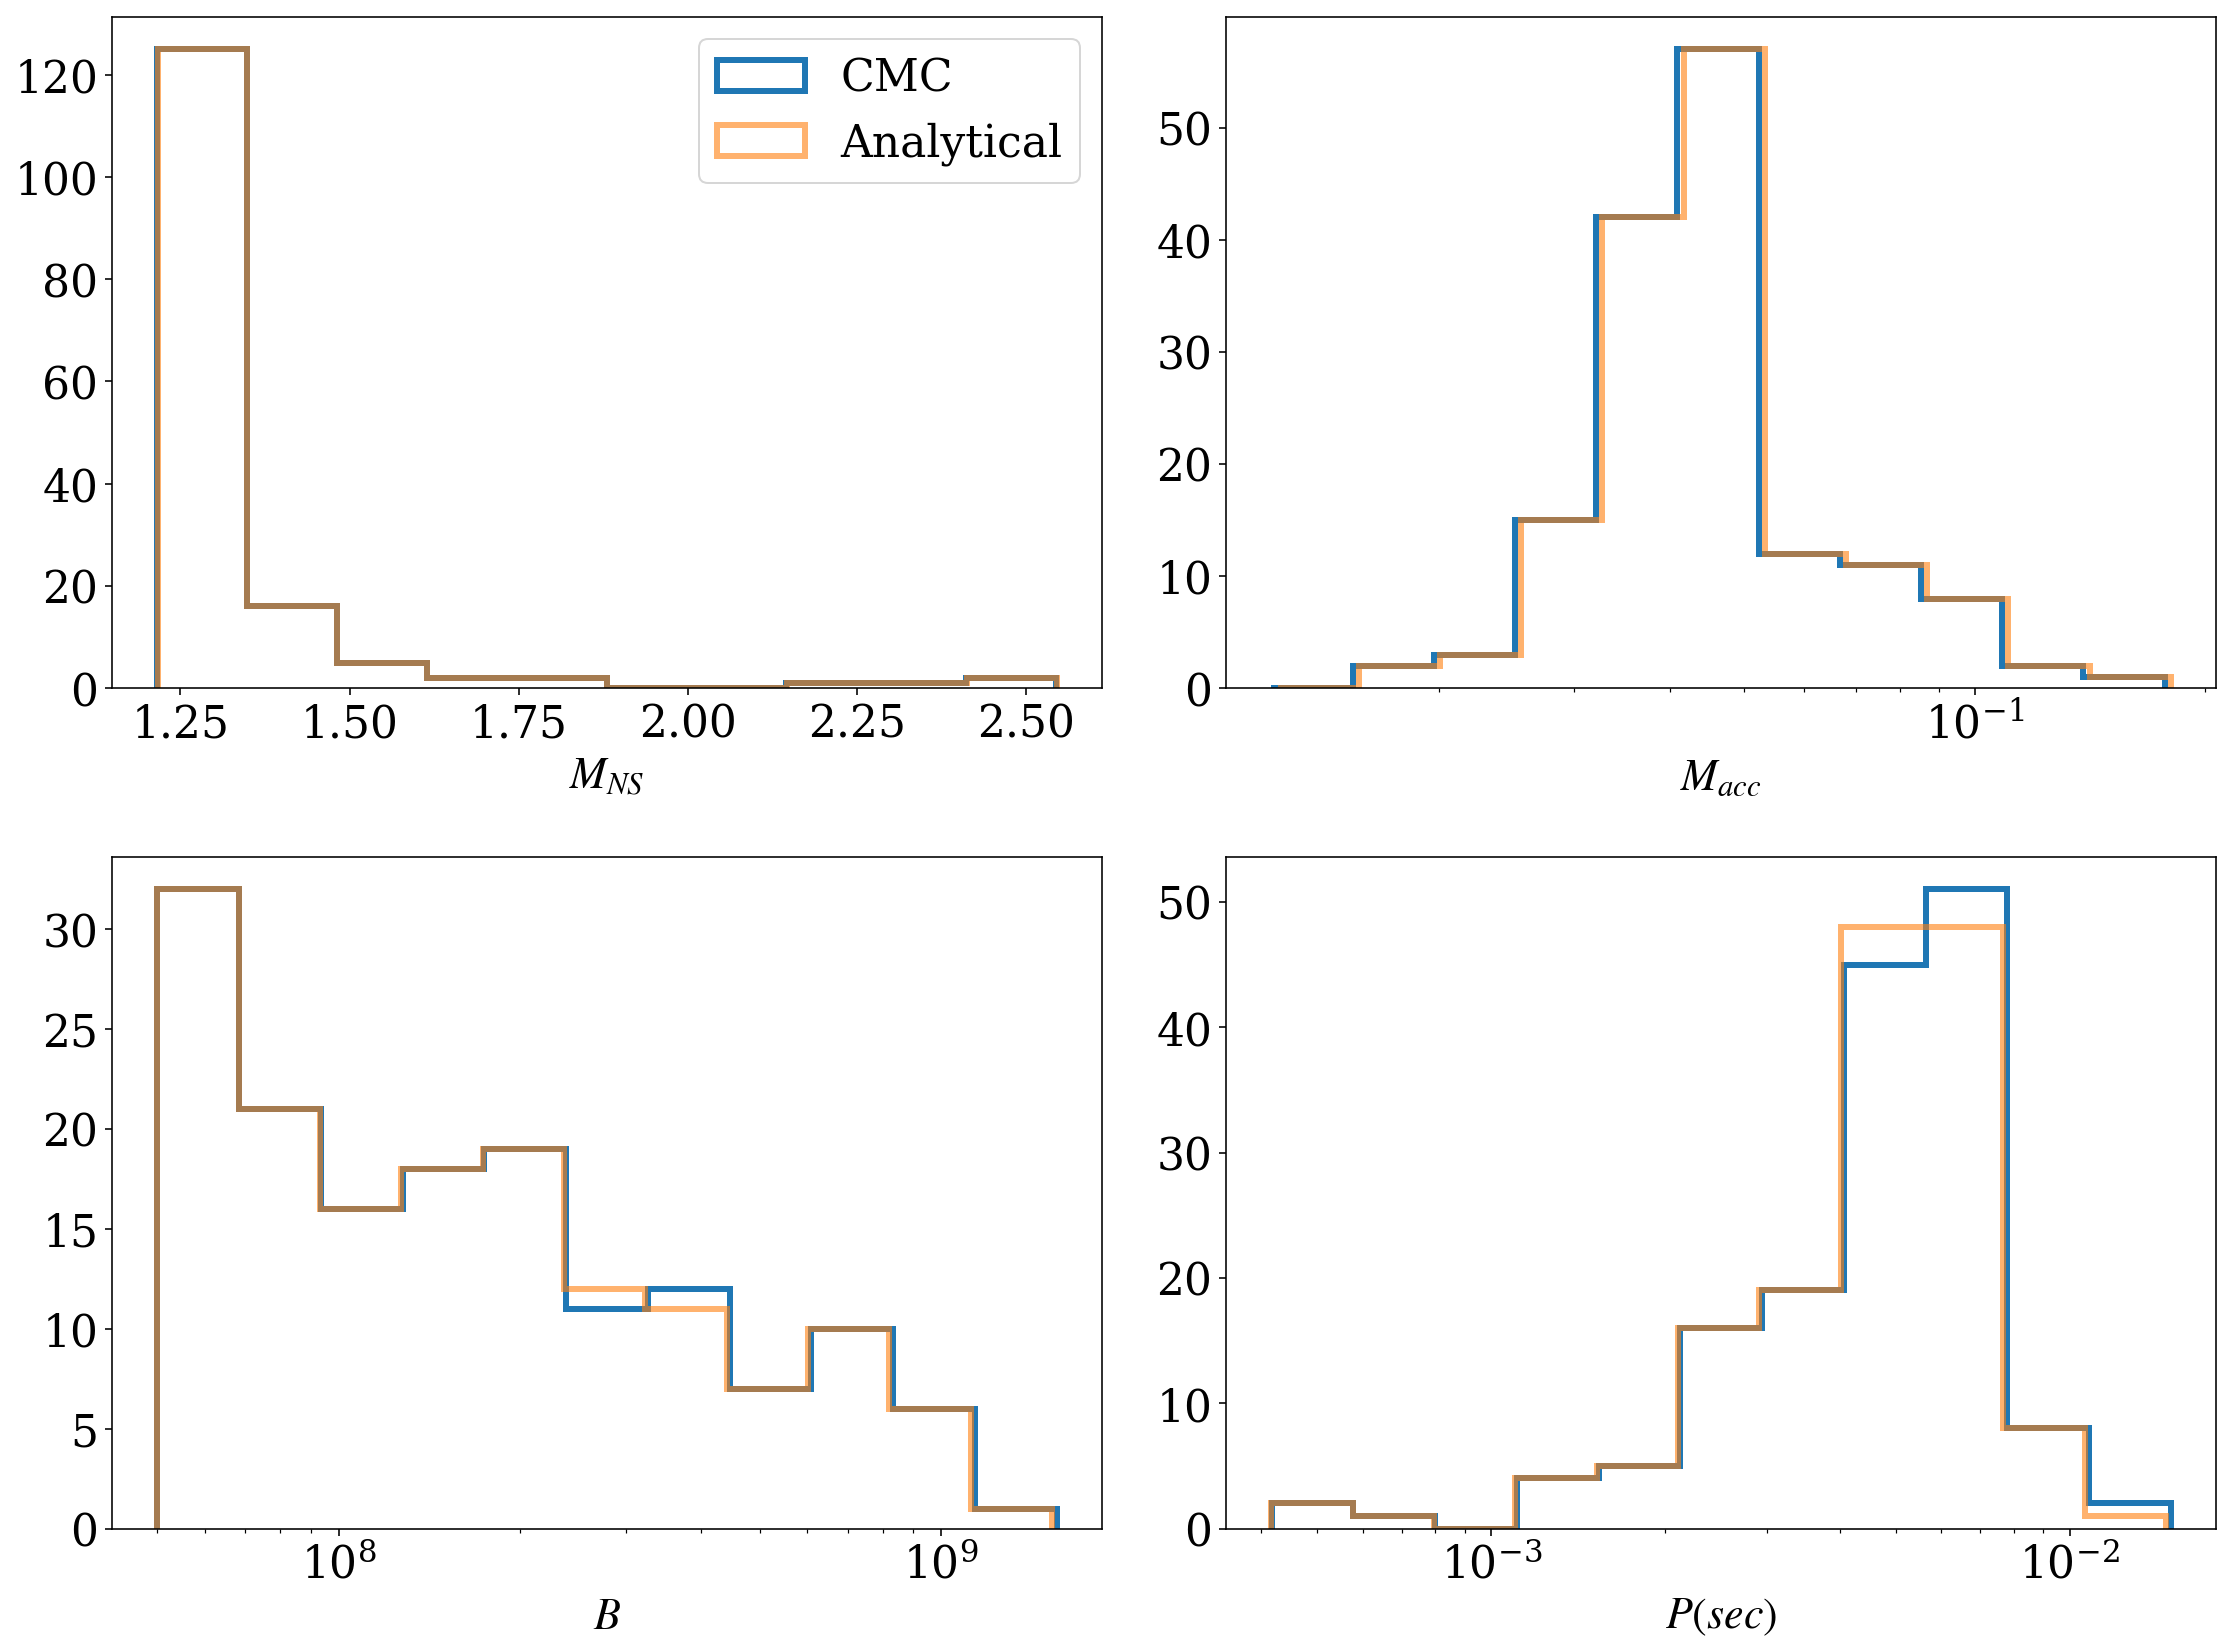

In [9]:
##Check if NS-MS TDE is actually working
error_out = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/n8-rv0.5-rg8-z0.0002_iccatalog_nstde_s0.2/error.out'
m_ns = []; B_ns = []; Ospin_ns = []
m_new = []; B_new = []; Ospin_new = []; Macc = []
m_analy = []; B_analy = []; Ospin_analy = []; Macc_analy = []
m_analy_old = []; B_analy_old = []; Ospin_analy_old = []; Macc_analy_old = []
with open(error_out, 'r') as ferr:
    for line in ferr:
        data=line.split()
        if data[0]=='Before':
            m_star = float(data[3].split('=')[1])
            r_star = float(data[4].split('=')[1])
            k_star = float(data[5].split('=')[1])
            m_ns.append(float(data[6].split('=')[1]))
            B_ns.append(float(data[7].split('=')[1]))
            Ospin_ns.append(float(data[8].split('=')[1]))
            ospin_temp, B_temp, Mns_temp, Macc_temp = func_nsms_tde(float(data[6].split('=')[1]), 
                                                                    m_star, r_star, k_star, 
                                                                    float(data[7].split('=')[1]), 
                                                                    float(data[8].split('=')[1]))
            ospin_temp_old, B_temp_old, Mns_temp_old, Macc_temp_old = func_nsms_tde_old(float(data[6].split('=')[1]), 
                                                                    m_star, r_star, k_star, 
                                                                    float(data[7].split('=')[1]), 
                                                                    float(data[8].split('=')[1]))
            m_analy.append(Mns_temp); B_analy.append(B_temp); Ospin_analy.append(ospin_temp)
            Macc_analy.append(Macc_temp)
            m_analy_old.append(Mns_temp_old); B_analy_old.append(B_temp_old); Ospin_analy_old.append(ospin_temp_old)
            Macc_analy_old.append(Macc_temp_old)
        if data[0]=='After':
            m_new.append(float(data[3].split('=')[1]))
            B_new.append(float(data[4].split('=')[1]))
            Ospin_new.append(float(data[5].split('=')[1]))
            Macc.append(float(data[6].split('=')[1]))
            
Psec_new = twopi*yearsc/np.array(Ospin_new)
Psec_analy = twopi*yearsc/np.array(Ospin_analy)
Psec_analy_old = twopi*yearsc/np.array(Ospin_analy_old)
print(len(Psec_analy), len(Psec_analy[Psec_analy<=0.03]))
print(np.any(k_star>1))
            
#import extract_coll_merger as cm
path_old = '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/'
#cm.get_XX_collision([path_old], 0, 1, [13], path_old+'ns', 0)
collfile = np.genfromtxt(path_old+'ns_coll_all.dat')
Mns_old =collfile[:,4]; k0 = collfile[:,10]; k1 = collfile[:,11]
print(len(Mns_old))
index_nsms = []
for ii in range(len(k0)):
    if k0[ii]==0 or k0[ii]==1 or k1[ii]==0 or k1[ii]==1:
        index_nsms.append(ii)
Mnsms = Mns_old[index_nsms]
print(len(Mnsms))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (16, 12))
axs[0][0].hist(m_new, lw=3,
              histtype='step', label = 'CMC')
axs[0][0].hist(m_analy, lw=3,
              histtype='step', label = 'Analytical',
              alpha=0.6)
#axs[0][0].hist(m_analy_old, lw=3,
#              histtype='step', label = 'Analytical Old',
#              alpha=0.6)
#axs[0][0].hist(Mnsms, lw=3, bins = 12,
#              histtype='step', label = 'Old model',
#              alpha=0.6)
axs[0][0].set_xlabel(r'$M_{NS}$')
axs[0][0].legend()

axs[0][1].hist(Macc,
              bins = np.logspace(np.log10(np.min(Macc)), np.log10(np.max(Macc)), 12),
              lw=3,histtype='step', label = 'CMC')
axs[0][1].hist(Macc_analy,
               bins = np.logspace(np.log10(np.min(Macc_analy)), np.log10(np.max(Macc_analy)), 12),
              lw=3,histtype='step', label = 'Analytical',
              alpha=0.6)
#axs[0][1].hist(Macc_analy_old,
#               bins = np.logspace(np.log10(np.min(Macc_analy_old)), np.log10(np.max(Macc_analy_old)), 12),
#              lw=3,histtype='step', label = 'Analytical Old',
#              alpha=0.6)
axs[0][1].set_xlabel(r'$M_{acc}$')
axs[0][1].set_xscale('log')

axs[1][0].hist(B_new, bins = np.logspace(np.log10(np.min(B_new)), np.log10(np.max(B_new)), 12),
              lw=3,histtype='step', label = 'CMC')
axs[1][0].hist(B_analy,bins = np.logspace(np.log10(np.min(B_analy)), np.log10(np.max(B_analy)), 12),
              lw=3,histtype='step', label = 'Analytical',
              alpha=0.6)
#axs[1][0].hist(B_analy_old,bins = np.logspace(np.log10(np.min(B_analy_old)), np.log10(np.max(B_analy_old)), 12),
#              lw=3,histtype='step', label = 'Analytical Old',
#              alpha=0.6)
axs[1][0].set_xscale('log')
axs[1][0].set_xlabel(r'$B$')

axs[1][1].hist(Psec_new,
               bins = np.logspace(np.log10(np.min(Psec_new)), np.log10(np.max(Psec_new)), 12),
              lw=3,histtype='step', label = 'CMC')
axs[1][1].hist(Psec_analy,
               bins = np.logspace(np.log10(np.min(Psec_analy)), np.log10(np.max(Psec_analy)), 12),
              lw=3,histtype='step', label = 'Analytical',
              alpha=0.6)
#axs[1][1].hist(Psec_analy_old,
#               bins = np.logspace(np.log10(np.min(Psec_analy_old)), np.log10(np.max(Psec_analy_old)), 12),
#              lw=3,histtype='step', label = 'Analytical Old',
#              alpha=0.6)
axs[1][1].set_xscale('log')
axs[1][1].set_xlabel(r'$P(sec)$')

fig.tight_layout()

1 TDE0.2 154
2 TDE0.8 110
3 WDTC 0
4 TDE0.2-WDTC 186
5 TDE0.2-WDTC-GCTC 347


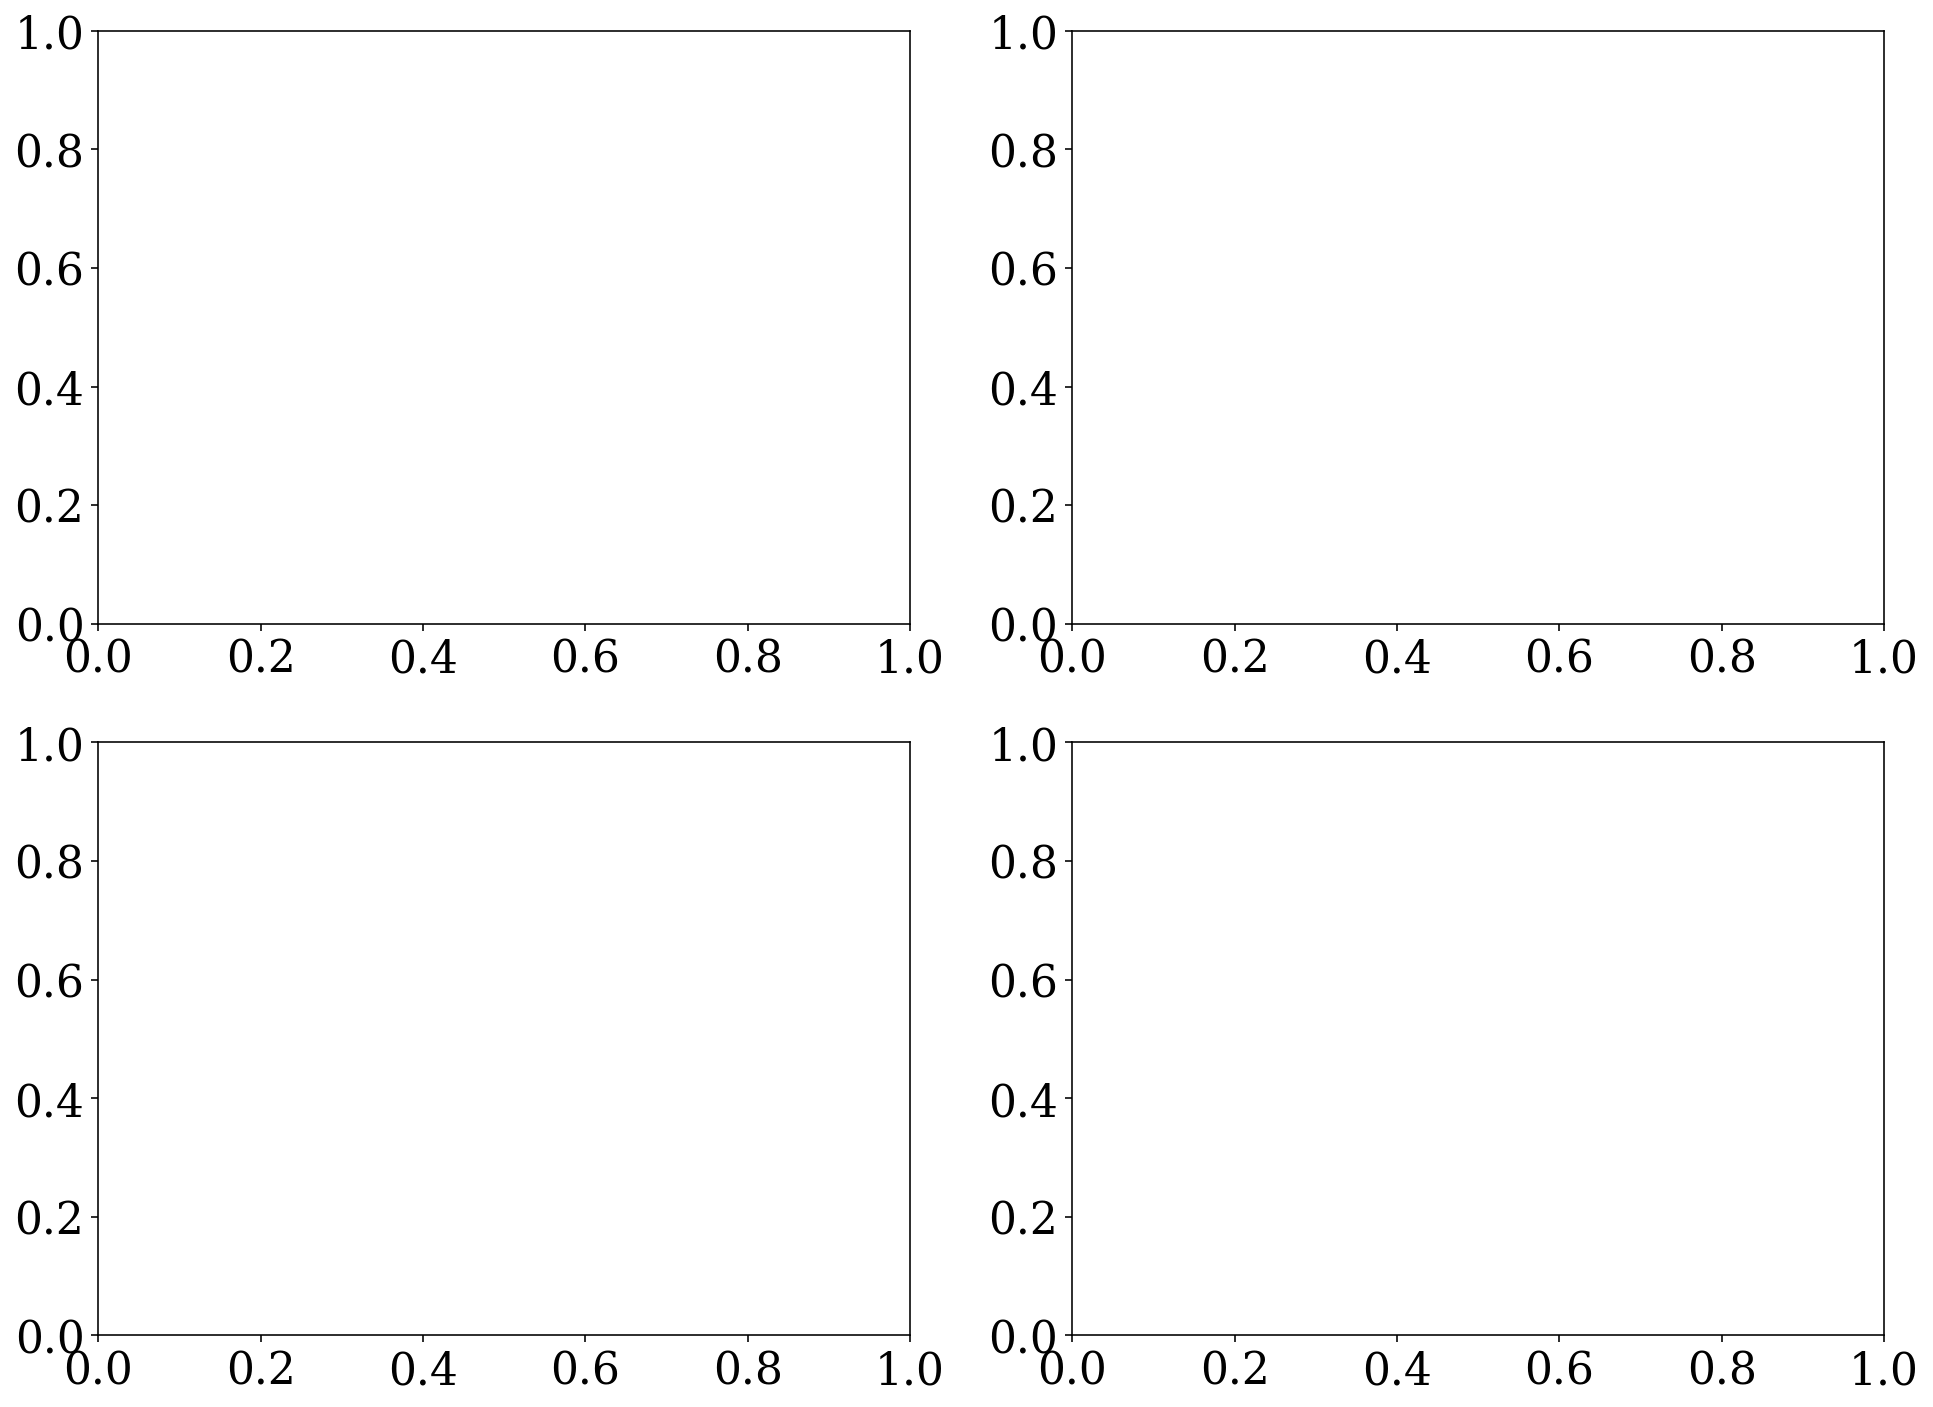

In [7]:
##Number of TDEs in different models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (16, 12))
for xx in range(1,len(paths)):
    error_out = paths[xx]+'error.out'
    m_ns = []; B_ns = []; Ospin_ns = []
    m_new = []; B_new = []; Ospin_new = []; Macc = []
    with open(error_out, 'r') as ferr:
        for line in ferr:
            data=line.split()
            if data[0]=='Before':
                m_star = float(data[3].split('=')[1])
                r_star = float(data[4].split('=')[1])
                k_star = float(data[5].split('=')[1])
                m_ns.append(float(data[6].split('=')[1]))
                B_ns.append(float(data[7].split('=')[1]))
                Ospin_ns.append(float(data[8].split('=')[1]))
                
            if data[0]=='After':
                m_new.append(float(data[3].split('=')[1]))
                B_new.append(float(data[4].split('=')[1]))
                Ospin_new.append(float(data[5].split('=')[1]))
                Macc.append(float(data[6].split('=')[1]))
                
    Psec_new = twopi*yearsc/np.array(Ospin_new)
    
    print(xx, model_label[xx], len(Psec_new))
                
    #axs[0][0].hist(m_new, bins = int(len(Psec_new)/10),
    #               lw=3, histtype='step', label = model_label[xx])
    #
    #axs[0][1].hist(Macc,
    #              bins = np.logspace(np.log10(np.min(Macc)), np.log10(np.max(Macc)), int(len(Psec_new)/10)),
    #              lw=3,histtype='step', label = model_label[xx])
    #
    #axs[1][0].hist(B_new, bins = np.logspace(np.log10(np.min(B_new)), np.log10(np.max(B_new)), int(len(Psec_new)/10)),
    #              lw=3,histtype='step', label = model_label[xx])
    #
    #axs[1][1].hist(Psec_new,
    #               bins = np.logspace(np.log10(np.min(Psec_new)), np.log10(np.max(Psec_new)), int(len(Psec_new)/10)),
    #              lw=3,histtype='step', label = model_label[xx])

    
#axs[0][0].set_xlabel(r'$M_{NS}$')
#axs[0][0].legend()
#
#axs[0][1].set_xlabel(r'$M_{acc}$')
#axs[0][1].set_xscale('log')
#
#axs[1][0].set_xscale('log')
#axs[1][0].set_xlabel(r'$B$')
#
#axs[1][1].set_xscale('log')
#axs[1][1].set_xlabel(r'$P(sec)$')
#    
#fig.tight_layout()

In [7]:
##Check how many TDE happens during binary-mediated interactions
##And whether the NS is initially single annd whether it merge in a binary or isolated
path_new = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.5-rg8-z0.0002_ICold_wdmass_nstde_test/'
nscoll = np.genfromtxt(path_new+'ns_coll_all.dat', dtype=str)
Mns_coll =nscoll[:,4]
k0 = [*map(int, nscoll[:,10])]; k1 = [*map(int, nscoll[:,11])]
k2 = [*map(int, nscoll[:,12])]; k3 = [*map(int, nscoll[:,13])]
type_coll=nscoll[:,-1]
print(len(k0))

n_ss = 0; n_nonss = 0
n_tri = 0; n_quad = 0
for kk in range(len(k0)):
    if k3[kk]==-100 and k2[kk]==-100:
        if k0[kk]<=1 or k1[kk]<=1:
            if type_coll[kk]=='SS':
                n_ss+=1
            else:
                n_nonss+=1
    elif k3[kk]==-100:
        if (k0[kk]<=1 or k1[kk]<=1 or k2[kk]<=1):
            n_tri+=1
            if type_coll[kk]=='SS':
                n_ss+=1
            else:
                n_nonss+=1
                
        k_array=np.sort([k0[kk],k1[kk],k2[kk]])
        print(k_array)
        
    else:
        if (k0[kk]<=1 or k1[kk]<=1 or k2[kk]<=1 or k3[kk]<=1):
            n_quad+=1
            if type_coll[kk]=='SS':
                n_ss+=1
            else:
                n_nonss+=1
        k_array=np.sort([k0[kk],k1[kk],k2[kk],k3[kk]])
        print(k_array)

print(n_ss, n_nonss)
print(n_tri,n_quad)         
        


218
[ 6 12 13]
[ 0  1 13]
[ 1 11 13]
[ 1  3 13]
[ 1 11 13]
[ 0 11 13]
[ 0 11 13]
[ 1 12 13]
[ 0  0 13]
[ 6 11 13]
[ 1  1 13]
[ 1 11 13]
[ 1  1  1 13]
[ 4 10 13 13]
[ 1 11 13]
[ 0 11 13]
[ 3 11 13]
[ 1 11 13]
[ 2 10 13]
[ 1 12 13]
[ 0 11 13]
[ 3 11 13]
[ 0  1 13]
[ 0  0 13]
[ 0 12 13]
[ 1 11 13]
[ 0 11 13]
[ 0 13 14]
[ 3 12 13]
[ 0 11 13]
[ 0  0  1 13]
20 160
22 2


In [62]:
##Kicks
def vkick(alpha, Mns, Mstar, Rstar, rratio, Mej):
    rt = (Mns/Mstar)**(1./3.)*Rstar
    rp = rt*rratio
    if rp>rt:
        E_ej = Gconst_sun*Mns*Rstar/rp**2*PC_Rsun-0.5*Gconst_sun*(Mstar-Mej)*PC_Rsun/Rstar
    else:
        E_ej = Gconst_sun*Mns*Rstar/rt**2*PC_Rsun-0.5*Gconst_sun*(Mstar-Mej)*PC_Rsun/Rstar

    v_ej = math.sqrt(2*E_ej)
    v_max = Mej*v_ej/(Mns+Mstar-Mej)

    return v_max**(1-alpha*(Mns/Mstar)**(2/3)*rratio)

rratio_list = [0.5, 0.75, 1.]; Mej_list = [0.253, 0.136, 0.088] #[0.198, 0.353, 0.389] #
for ii in range(len(rratio_list)):
    print(vkick(0.5, 1.2, 1.2, 1.1, rratio_list[ii], Mej_list[ii]))
    

21.325873491937735
8.18724198142156
4.240857022108854


# WD-WD TC; Polypical index check

In [2]:
def R_WD(M_WD):   ##from SSE
    M_ch = 1.44
    R_WD = max(1.4e-5, 0.0115*math.sqrt((M_ch/M_WD)**(2/3)-(M_WD/M_ch)**(2/3)))
    
    return R_WD

print(R_WD(1.36))

def Tl(order, polytropicindex, eta):
    l=order; n=polytropicindex; x=np.log10(eta); x2=x*x; x3=x*x2; x4=x2*x2; x5=x2*x3

    if l != 2 and l != 3:
        print("unknown order")
    
    ##From Portegies Zwart & Meinen 1993
    if n == 1.5:
        if l == 2: 
            return pow(10.0, -0.397 + 1.678*x + 1.277*x2 - 12.42*x3 + 9.446*x4 - 5.550*x5)
        else:
            return pow(10.0, -0.909 + 1.574*x + 12.37*x2 - 57.40*x3 + 80.10*x4 - 46.43*x5)
                
    elif n == 2.0:
        if l == 2:
            return pow(10.0, -0.517 - 0.906*x + 23.88*x2 - 93.49*x3 + 112.3*x4 - 44.15*x5)
        else:
            return pow(10.0, -1.040 - 1.354*x + 37.64*x2 - 139.9*x3 + 168.2*x4 - 66.53*x5)
                
    elif n == 3.0:
        if l == 2:
            return pow(10.0, -1.124 + 0.877*x - 13.37*x2 + 21.55*x3 - 16.48*x4 + 4.124*x5)
        else:
            return pow(10.0, -1.703 + 2.653*x - 14.34*x2 + 12.85*x3 - 0.492*x4 - 3.600*x5)
                
    else:
        printf("unknown polytropic index")
             
        

def E_oscillate(rperi, Mosc, Rosc, nosc, Mpert):
    eta=math.sqrt(Mosc/(Mosc+Mpert))*pow(rperi/Rosc, 1.5)
    #rperi = Rosc*pow((Mosc+Mpert)/Mosc,1/3)*pow(eta, 2/3)

    return Gconst_sun*PC_Rsun*Mpert**2/Rosc * (pow(Rosc/rperi, 6.0) * Tl(2, nosc, eta) + pow(Rosc/rperi, 8.0) * Tl(3, nosc, eta))

0.0031751177903183744


-9.81304016231914


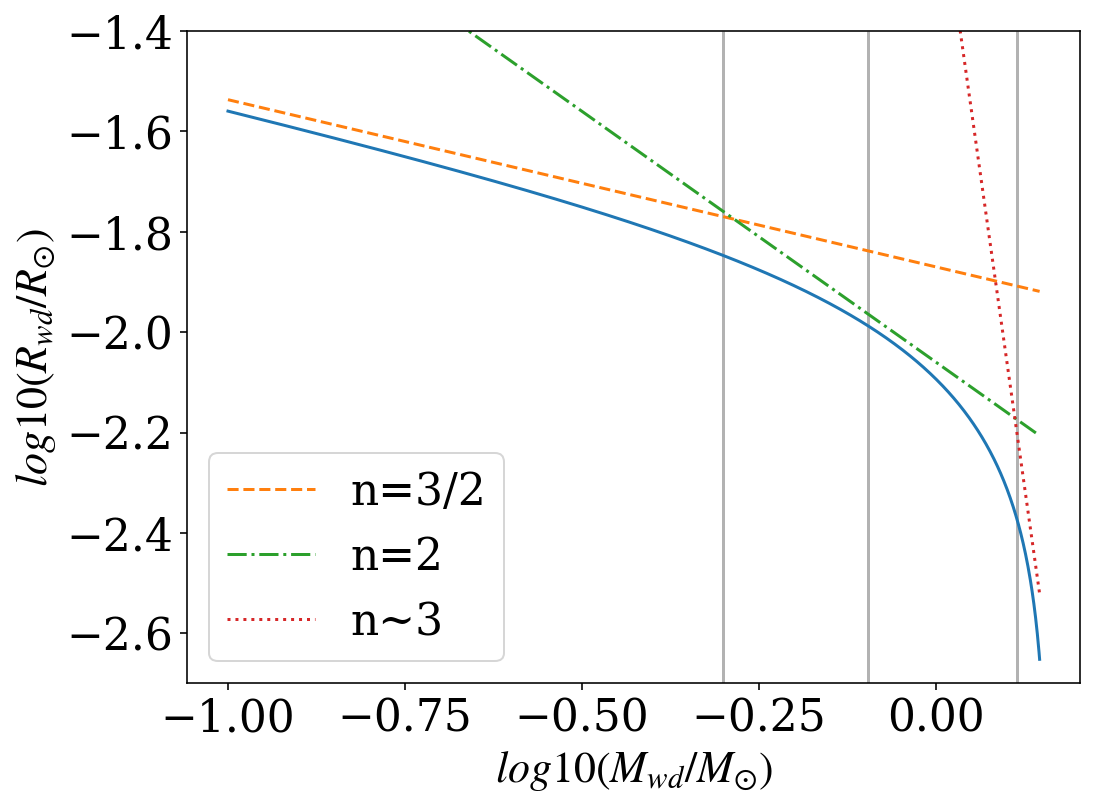

In [19]:
##Finding the mass cutoff for different polytropic index of WDs
mwd = np.linspace(0.1,1.4, 500)
rwd = []; rwd_low = []
for ii in range(len(mwd)):
    rwd.append(R_WD(mwd[ii]))
    rho_ave = mwd[ii]*Msun/(2*twopi/3*(R_WD(mwd[ii])*Rsun)**3)
    #if rho_ave >=1e6:
        #print(mwd[ii])
        
print((np.log10(rwd[499])-np.log10(rwd[470]))/(np.log10(mwd[499])-np.log10(mwd[470])))
        
y0 = np.log10(np.array(mwd)**(-1/3))-1.87
y1 = np.log10(np.array(mwd)**(-1))-2.06
y2 = np.log10(np.array(mwd)**(-10))-1.06

plt.figure(figsize=(8,6))
plt.plot(np.log10(mwd),np.log10(rwd))
plt.plot(np.log10(mwd), y0, ls='--', label='n=3/2')
plt.plot(np.log10(mwd), y1, ls='-.', label='n=2')
plt.plot(np.log10(mwd), y2, ls='dotted', label='n~3')
plt.vlines(math.log10(0.5), -2.7, -1.4, color='gray', alpha=0.6)
plt.vlines(math.log10(0.8), -2.7, -1.4, color='gray', alpha=0.6)
plt.vlines(math.log10(1.3), -2.7, -1.4, color='gray', alpha=0.6)
plt.ylim(ymax = -1.4, ymin= -2.7)
plt.xlabel(r'$log10(M_{wd}/M_{\odot})$')
plt.ylabel(r'$log10(R_{wd}/R_{\odot})$')
plt.legend(loc='best')

[0.021392743474959133, 0.01594811244062899, 0.012778467098439529, 0.010311127424985122, 0.008058157517676339, 0.005677022808780932, 0.0022288464855878044]
[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]


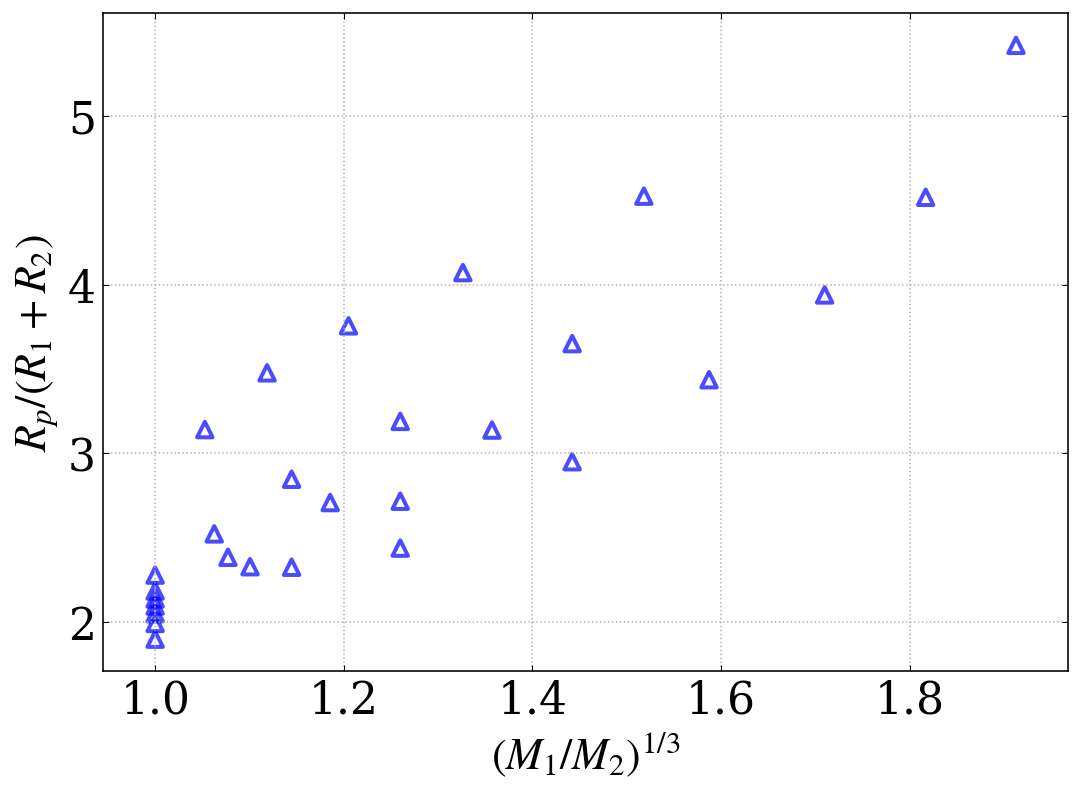

In [4]:
test_range=np.linspace(1,20,200)  ##for pericenter distance in WD radius
vel_disp = [1,10] ##km/s
M_wd = [0.2,0.4,0.6,0.8,1.0,1.2,1.4]
R_wd = [R_WD(M_wd[xx]) for xx in range(len(M_wd))]
n_wd = [[1.5,1.5,2.,2.,2.,2.,2.],[1.5,1.5,1.5,1.5,1.5,1.5,1.5]]
print(R_wd)
#M_pri = [1.3]
#R_pri = [R_WD(M_pri[xx]) for xx in range(len(M_pri))]
#n_pri = [2.]

R_fac = [[[],[]],[[],[]]]
m_ratio = [[[],[]],[[],[]]]
for bb in range(len(vel_disp)):
    for aa in range(2):
        #print(n_wd[aa])
        for ii in range(len(M_wd)):
            for jj in range(ii,len(M_wd)):
            #for jj in range(len(M_pri)):
                #E_kin = 0.5*M_wd[ii]*M_pri[jj]/(M_wd[ii]+M_pri[jj])*vel_disp[bb]**2
                E_kin = 0.5*M_wd[ii]*M_wd[jj]/(M_wd[ii]+M_wd[jj])*vel_disp[bb]**2
                #f = lambda x: E_oscillate(x*(R_wd[ii]+R_pri[jj]), M_wd[ii], R_wd[ii], n_wd[aa][ii], M_pri[jj])+E_oscillate(x*(R_wd[ii]+R_pri[jj]), M_pri[jj], R_pri[jj], n_pri[jj], M_wd[ii]) - E_kin
                f = lambda x: E_oscillate(x*(R_wd[ii]+R_wd[jj]), M_wd[ii], R_wd[ii], n_wd[aa][ii], M_wd[jj])+E_oscillate(x*(R_wd[ii]+R_wd[jj]), M_wd[jj], R_wd[jj], n_wd[aa][jj], M_wd[ii]) - E_kin

                root_range=[]
                root_range2=[]
                for yy in range(len(test_range)-1):
                    if f(test_range[yy])>=0 and f(test_range[yy+1])<=0:
                        root_range.append(test_range[yy])
                        root_range.append(test_range[yy+1])
                        
                    if f(test_range[yy])<=0 and f(test_range[yy+1])>=0:
                        root_range2.append(test_range[yy])
                        root_range2.append(test_range[yy+1])
                
                #print(root_range)
                #print(root_range2)
                if len(root_range)>2 or len(root_range2)>2:
                    print('more than 1 root')
                                              
                real_root = bisect(f, root_range[0],root_range[1])
                R_fac[bb][aa].append(real_root)
                #m_ratio[bb][aa].append(M_pri[jj]/M_wd[ii])
                m_ratio[bb][aa].append(M_wd[jj]/M_wd[ii])
                #print(M_wd[ii],M_pri[jj],real_root)
                #print(M_wd[ii],M_wd[jj],real_root)
    
cs=['orange','b']
mfmt = ['o','^']
#plt.figure(figsize=(8,6))
#plt.hist(R_fac[0], bins=12, histtype='step', 
#         lw=3, alpha=0.6, color='k')
#plt.hist(R_fac[1], bins=12, histtype='step', 
#         lw=3, alpha=0.8, color='gold')
##plt.vlines(np.mean(R_fac[0]),0,8, linestyle='--',color='k')
#plt.vlines(np.median(R_fac[0]),0,8, linestyle='-.',color='k')
##plt.vlines(np.mean(R_fac[1]),0,8, linestyle='--',color='gold')
#plt.vlines(np.median(R_fac[1]),0,8, linestyle='-.',color='gold')
#plt.xlabel(r'$R_{tidal}/R_{wd}$')

plt.figure(figsize=(8,6))
for xx in range(1,len(vel_disp)):
    for yy in range(1,2):
        print(n_wd[yy])
        plt.scatter(np.array(m_ratio[xx][yy])**(1/3),R_fac[xx][yy], 
                    color = cs[xx], marker=mfmt[yy], 
                    facecolor='none', s=60, alpha=0.7, lw=2)
plt.xlabel(r'$(M_1/M_2)^{1/3}$')
plt.ylabel(r'$R_p/(R_1+R_2)$')
plt.grid(linestyle=':',which='major',linewidth='0.75')
plt.grid(linestyle=':',which='minor',linewidth='0.75')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.tick_params('both',length=3,width=0.5,which='both',direction = 'in')
plt.tight_layout()
plt.savefig(savepath+'crosssect_mratio.pdf', dpi=300)

In [11]:
##Estimate the inspiral time of a WD binary formed in tidal capture
M_wd = [0.6, 1.3]; R_wd = [R_WD(M_wd[xx]) for xx in range(len(M_wd))]
ecc=0.99

for ii in range(len(M_wd)):
    for jj in range(ii,len(M_wd)):
        r_cap_au = 3*(R_wd[ii]+R_wd[jj])/AU_Rsun
        sma_au = r_cap_au/(1-ecc)
        t_tmp = lisa_calc.inspiral_time_peters(sma_au,ecc,M_wd[ii],M_wd[jj])  ##in Gyr
        print(M_wd[ii], M_wd[jj], t_tmp*1e9)

0.6 0.6 2006590.9536334225
0.6 1.3 115239.48697285765
1.3 1.3 2410.3547231010652


# WD Mass Change Check

nsform 6391
nsform=0 243
ns_wdwd: 70
0 20
1 4944
2 1313
3 2
4 14
5 98
6 0
7 0
mic? [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
aic? 12 0 1.24376 1.23602 4
aic? 12 66367 1.24202 1.37777 4
aic? 12 265392 1.24418 1.27613 4
aic? 12 93064 1.2473 1.31612 4
aic? 12 610121 1.24844 1.306 4
aic? 12 646559 1.24213 1.24752 4
aic? 12 21682 1.24201 1.36765 4
aic? 12 190870 1.24291 1.38 4
aic? 12 1273260 1.24202 1.38001 0
aic? 12 862922 1.24281 1.38 0
aic? 12 1321368 1.24255 1.35956 0
aic? 12 230394 1.24206 1.38 4
aic? 12 1103122 1.24262 1.38001 4
aic? 12 1235182 1.24229 1.38 0
aic? 12 1234184 1.24237 1.33429 4
aic? 12 822055 1.24229 1.38001 4
aic? 12 199536 1.24299 1.37404 0
aic? 12 68078 1.24235 1.38002 4
aic? 12 1406345 1.24271 1.38 0
aic? 12 581116 1.24215 1.34541 4
all_nscoll 118
97


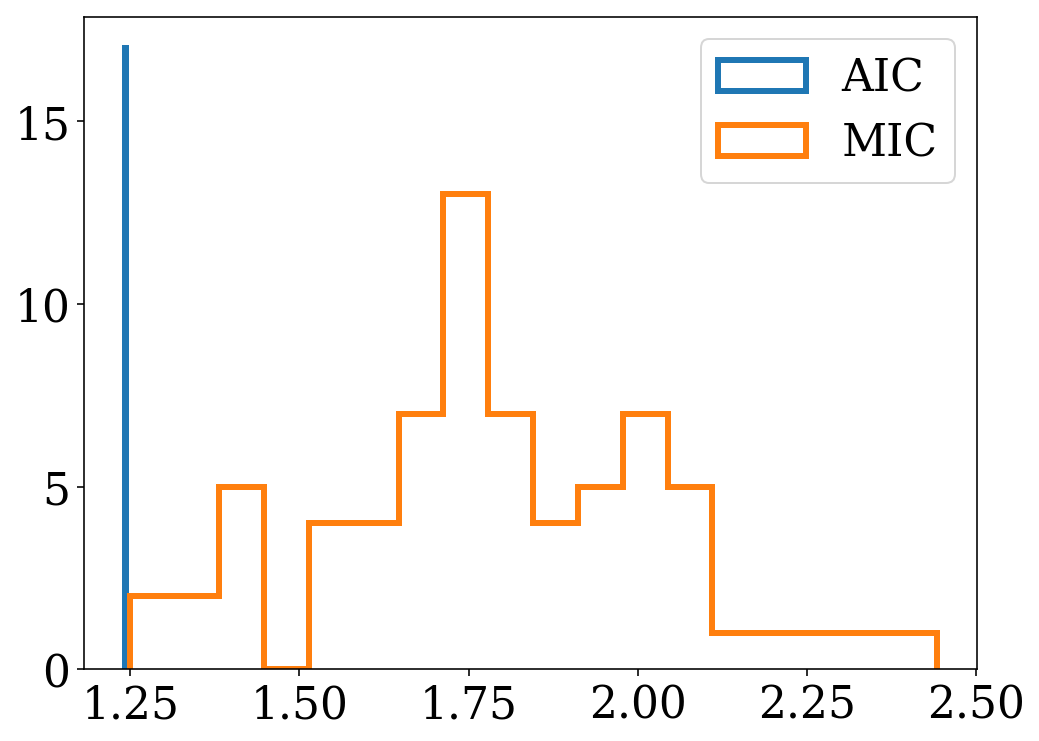

In [10]:
## Check the mass of WD turned NSs and how they are formed
path_test = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/'
nsform = np.genfromtxt(path_test+'initial.nsformation.dat')
idns = nsform[:,3].astype(np.int); massprev = nsform[:,6]
massns = nsform[:,7]; 
kprev = nsform[:,10].astype(np.int); kcomp = nsform[:,11].astype(np.int)
sntype = nsform[:,8].astype(np.int)
print('nsform', len(idns))
print('nsform=0', len(idns[idns==0]))
#print('nsform', len(idns[idns>839961]))
#print('kprev', len(kprev[kprev==12]))
#print('kprev', len(kprev[kprev==11]))
#print('kprev', len(kprev[kprev==10]))

wdwd_coll_file = np.genfromtxt(path_test+'ns_wdwd_coll.dat')
id_coll = wdwd_coll_file[:,2].astype(np.int)
m_coll = wdwd_coll_file[:,4]
print('ns_wdwd:', len(id_coll))


all_nscoll_file = np.genfromtxt(path_test+'ns_collproduct_all.dat')
id_nscoll = all_nscoll_file[:,2].astype(np.int)
m_nscoll = all_nscoll_file[:,4]
k0 = all_nscoll_file[:,10].astype(np.int)
k1 = all_nscoll_file[:,11].astype(np.int)
k2 = all_nscoll_file[:,12].astype(np.int)
k3 = all_nscoll_file[:,13].astype(np.int)


##Analysis
for ii in range(8):
    print(ii, len(sntype[sntype==ii]))
print('mic?', idns[sntype==5])
        
m_aic = []
for xx in range(len(idns)):
    if 10<=kprev[xx]<=12 and kcomp[xx]!=-100 and kcomp[xx]!=15:
        print('aic?',kprev[xx], idns[xx], massns[xx], massprev[xx], sntype[xx])
        m_aic.append(massns[xx])
        
        #if idns[xx] in id_coll:
        #    print('yes')
        #else:
        #    print('no')
        
    #if idns[xx]==0:
    #    print('id=0', kprev[xx], idns[xx], massns[xx], massprev[xx], sntype[xx])
    #if massprev[xx]<=2.88:
    #    print(kprev[xx], idns[xx], massns[xx], massprev[xx], sntype[xx])
        
        


index_ns = []
for ii in range(len(k0)):
    if k0[ii]==13 or k1[ii]==13 or k2[ii]==13 or k3[ii]==13:
        index_ns.append(ii)
print('all_nscoll', len(np.delete(id_nscoll, index_ns)))


m_mic = []
for xx in range(len(idns)):
    if 10<= kprev[xx] <=12 and (kcomp[xx]==-100 or kcomp[xx]==15):
        #print(kcomp[xx])
        #if idns[xx] not in id_coll:
        #    print(idns[xx])
        m_mic.append(massns[xx])
                   
print(len(m_mic))

m_mic = m_coll
plt.figure(figsize = (8,6))
plt.hist(m_aic, bins = 3, 
         histtype = 'step',
         lw = 3, label='AIC')
plt.hist(m_mic, bins = 18, 
         histtype = 'step',
         lw = 3, label='MIC')
#plt.xscale('log')
plt.legend()

336
589


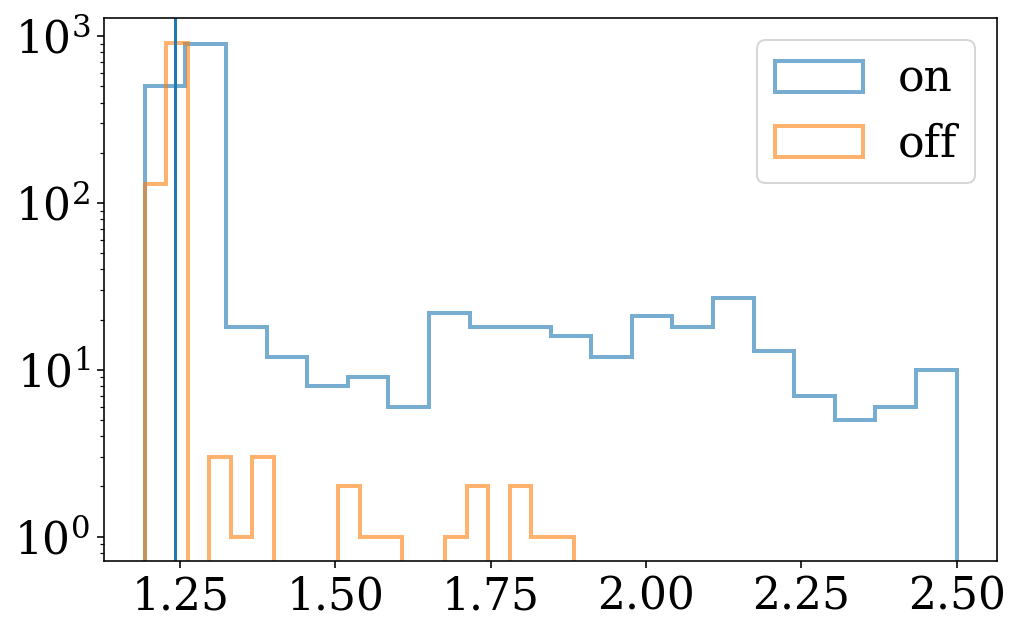

In [3]:
##Check how removing the WD mass limit affect AIC
path = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/'
psrfile = path+'initial.morepulsars.dat'
path_off = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff/'
psrfile_off = path_off+'initial.morepulsars.dat'

t_conv = dyn.conv('t', path+'initial.conv.sh')
t_conv_off = dyn.conv('t', path_off+'initial.conv.sh')

allid = []; tform = []; mform = []
with open(psrfile, 'r') as fpsr:
    next(fpsr)
    for line in fpsr:
        data = line.split()
        if int(data[2])!=1:
            if int(data[3]) not in allid:
                allid.append(int(data[3]))
                tform.append(float(data[1])*t_conv)
                mform.append(float(data[5]))
                
        else:
            if int(data[11])==13:
                if int(data[3]) not in allid:
                    allid.append(int(data[3]))
                    tform.append(float(data[1])*t_conv)
                    mform.append(float(data[5]))
            if int(data[12])==13:
                if int(data[4]) not in allid:
                    allid.append(int(data[4]))
                    tform.append(float(data[1])*t_conv)
                    mform.append(float(data[6]))

mform = np.array(mform)
print(len(mform[mform<1.245]))

allid_off = []; tform_off = []; mform_off = []
with open(psrfile_off, 'r') as fpsr_off:
    next(fpsr_off)
    for line in fpsr_off:
        data = line.split()
        if int(data[2])!=1:
            if int(data[3]) not in allid_off:
                allid_off.append(int(data[3]))
                tform_off.append(float(data[1])*t_conv_off)
                mform_off.append(float(data[5]))
                
        else:
            if int(data[11])==13:
                if int(data[3]) not in allid_off:
                    allid_off.append(int(data[3]))
                    tform_off.append(float(data[1])*t_conv_off)
                    mform_off.append(float(data[5]))
            if int(data[12])==13:
                if int(data[4]) not in allid_off:
                    allid_off.append(int(data[4]))
                    tform_off.append(float(data[1])*t_conv_off)
                    mform_off.append(float(data[6]))
                    
mform_off = np.array(mform_off)
print(len(mform_off[mform_off<1.245]))

#snap_h5 = 'initial.snapshots.h5'
#snap_last = cmct.Snapshot(fname=path+snap_h5, snapshot_name='/423(t=19.263837)', conv=path+'initial.conv.sh')
#binflag = np.array(snap_last.data['binflag'])
#id0 = np.array(snap_last.data['id0'])[binflag==1]; id1 = np.array(snap_last.data['id1'])[binflag==1]
#ids = np.array(snap_last.data['id'])[binflag!=1]
#formation = np.array(snap_last.data['formation'])[binflag!=1]
#formation0 = np.array(snap_last.data['formation0'])[binflag==1]; formation1 = np.array(snap_last.data['formation1'])[binflag==1]
#print(ids)
#print(allid)
#print(len(formation), len(formation[formation==11]))
#
#snform = np.zeros(len(mform))
#for ii in range(len(allid)):
#    for xx in range(len(ids)):
#        if ids[xx]==allid[ii]:
#            snform[ii]==formation[xx]
#            break
#    for yy in range(len(id0)):
#        if id0[yy]==allid[ii]:
#            snform[ii]==formation0[yy]
#            break
#    for zz in range(len(id1)):
#        if id1[zz]==allid[ii]:
#            snform[ii]==formation1[zz]
#
#print(mform[snform==4], len(print(mform[snform==4])))
            
plt.figure(figsize=(8,5))
plt.hist(mform, bins = 20, label='on',
         histtype='step', lw=2, alpha=0.6)
         #bins=np.logspace(np.log10(np.min(mform)), np.log10(np.max(mform)), 20))
plt.hist(mform_off, bins = 20, label='off',
         histtype='step', lw=2, alpha=0.6)
plt.axvline(x=1.242)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

303
Counter({2: 1188, 0: 240, 1: 130, 5: 65, 4: 13})
588
Counter({2: 996, 1: 45, 0: 22})


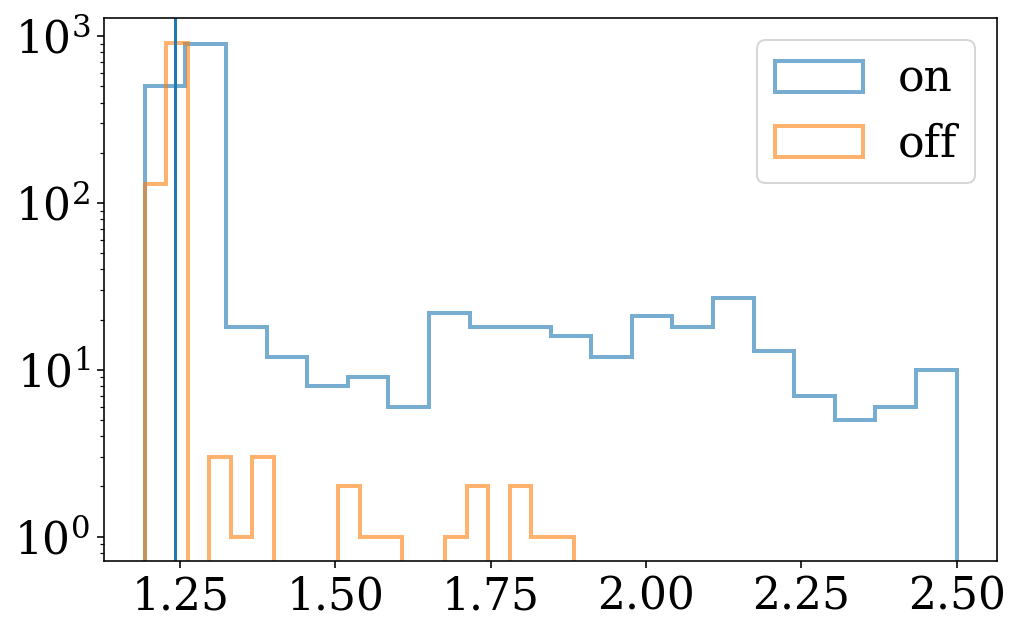

In [4]:
##Check if the wd mass lim is working
path = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/'
psrfile = path+'initial.morepulsars.dat'
path_off = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff/'
psrfile_off = path_off+'initial.morepulsars.dat'

t_conv = dyn.conv('t', path+'initial.conv.sh')
t_conv_off = dyn.conv('t', path_off+'initial.conv.sh')

allid = []; tform = []; mform = []
snform = []
with open(psrfile, 'r') as fpsr:
    next(fpsr)
    for line in fpsr:
        data = line.split()
        if int(data[2])!=1:
            if int(data[3]) not in allid:
                allid.append(int(data[3]))
                tform.append(float(data[1])*t_conv)
                mform.append(float(data[5]))
                snform.append(int(data[26]))
                
        else:
            if int(data[11])==13:
                if int(data[3]) not in allid:
                    allid.append(int(data[3]))
                    tform.append(float(data[1])*t_conv)
                    mform.append(float(data[5]))
                    snform.append(int(data[26]))
            if int(data[12])==13:
                if int(data[4]) not in allid:
                    allid.append(int(data[4]))
                    tform.append(float(data[1])*t_conv)
                    mform.append(float(data[6]))
                    snform.append(int(data[27]))

mform = np.array(mform)
print(len(mform[mform<=1.242]))
print(Counter(snform))

allid_off = []; tform_off = []; mform_off = []
snform_off = []
with open(psrfile_off, 'r') as fpsr_off:
    next(fpsr_off)
    for line in fpsr_off:
        data = line.split()
        if int(data[2])!=1:
            if int(data[3]) not in allid_off:
                allid_off.append(int(data[3]))
                tform_off.append(float(data[1])*t_conv_off)
                mform_off.append(float(data[5]))
                snform_off.append(int(data[26]))
                
        else:
            if int(data[11])==13:
                if int(data[3]) not in allid_off:
                    allid_off.append(int(data[3]))
                    tform_off.append(float(data[1])*t_conv_off)
                    mform_off.append(float(data[5]))
                    snform_off.append(int(data[26]))
            if int(data[12])==13:
                if int(data[4]) not in allid_off:
                    allid_off.append(int(data[4]))
                    tform_off.append(float(data[1])*t_conv_off)
                    mform_off.append(float(data[6]))
                    snform_off.append(int(data[27]))
                    
mform_off = np.array(mform_off)
print(len(mform_off[mform_off<=1.242]))
print(Counter(snform_off))

#snap_h5 = 'initial.snapshots.h5'
#snap_last = cmct.Snapshot(fname=path+snap_h5, snapshot_name='/423(t=19.263837)', conv=path+'initial.conv.sh')
#binflag = np.array(snap_last.data['binflag'])
#id0 = np.array(snap_last.data['id0'])[binflag==1]; id1 = np.array(snap_last.data['id1'])[binflag==1]
#ids = np.array(snap_last.data['id'])[binflag!=1]
#formation = np.array(snap_last.data['formation'])[binflag!=1]
#formation0 = np.array(snap_last.data['formation0'])[binflag==1]; formation1 = np.array(snap_last.data['formation1'])[binflag==1]
#print(ids)
#print(allid)
#print(len(formation), len(formation[formation==11]))
#
#snform = np.zeros(len(mform))
#for ii in range(len(allid)):
#    for xx in range(len(ids)):
#        if ids[xx]==allid[ii]:
#            snform[ii]==formation[xx]
#            break
#    for yy in range(len(id0)):
#        if id0[yy]==allid[ii]:
#            snform[ii]==formation0[yy]
#            break
#    for zz in range(len(id1)):
#        if id1[zz]==allid[ii]:
#            snform[ii]==formation1[zz]
#
#print(mform[snform==4], len(print(mform[snform==4])))
            
plt.figure(figsize=(8,5))
plt.hist(mform, bins = 20, label='on',
         histtype='step', lw=2, alpha=0.6)
         #bins=np.logspace(np.log10(np.min(mform)), np.log10(np.max(mform)), 20))
plt.hist(mform_off, bins = 20, label='off',
         histtype='step', lw=2, alpha=0.6)
plt.axvline(x=1.242)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

303
Counter({2: 1188, 0: 240, 1: 130, 5: 65, 4: 13})
[ 707858   66367  265392   93064  610121  646559   21682 1234412 1105353
   68078  581116  942229  942230] [1.2437578 1.2852296 1.2521376 1.2573622 1.3063457 1.2902367 1.3089979
 1.3064632 1.2521376 1.3000888 1.2698659 2.4264903 2.4264903]
707858 [707858] [12] [1.2360978]
66367 [66367] [12] [1.3778022]
265392 [265392] [13] [1.25213763]
93064 [93064] [12] [1.31619318]
610121 [610121] [12] [1.30599887]
646559 [646559] [12] [1.25390342]
21682 [21682] [13] [1.30899792]
1234412 couldn't find
1105353 couldn't find
68078 [68078] [12] [1.34793159]
581116 [581116] [12] [1.34540571]
942229 couldn't find
942230 [942230] [13] [2.4264903]
[1548801  892400  850575 1032637  922301  850576  839964 1203605  888545
  941749 1137221 1104820 1107099 1162222  888547 1186768 1097768  883889
  954206 1306026 1137222  857641 1030957 1083585  957123  944529 1107100]
ejected 1102185
ejected 935016
[929729, 829805, 620956, 857071, 829420, 805215, 830679, 83359

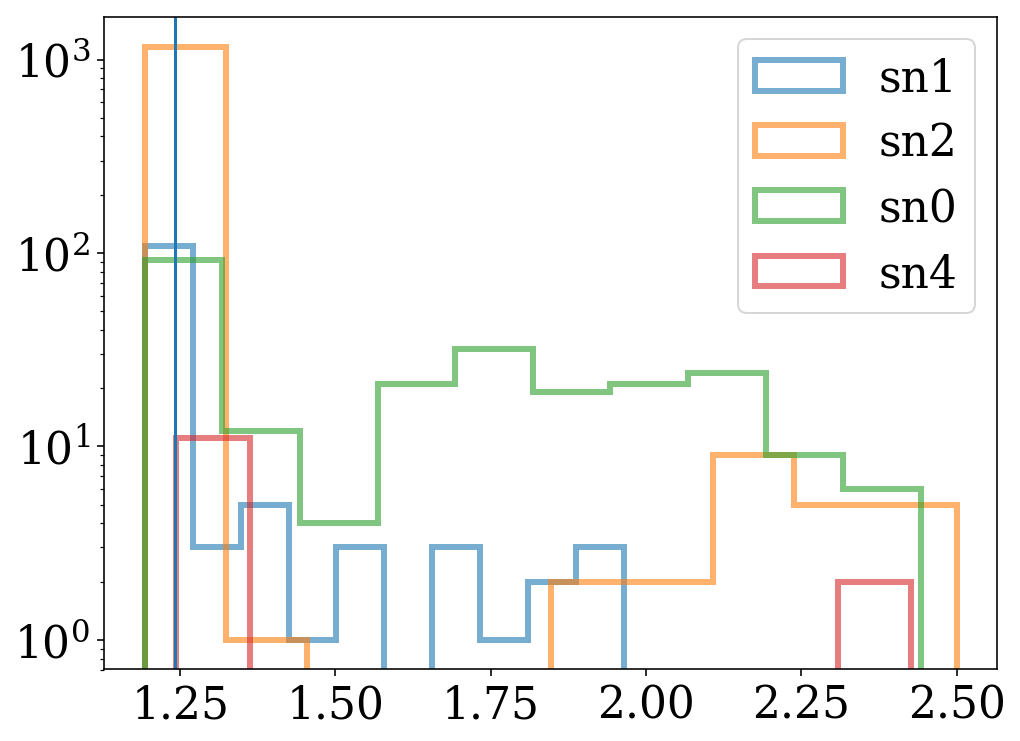

In [6]:
##Check AIC and WD-WD merger (not collisions)
path = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/'
psrfile = path+'initial.morepulsars.dat'
collfile = np.genfromtxt(path+'ns_wdwd_coll.dat')
idcoll = collfile[:,2].astype(np.int)

snap_h5 = 'initial.snapshots.h5'

t_conv = dyn.conv('t', path+'initial.conv.sh')

snapkeys = np.genfromtxt(path+'snap_keys.txt', dtype=str)
snpno = snapkeys[:,0]; snptime = snapkeys[:,1]
snptime_float = snptime.astype(np.float)

allid = []; tform = []; mform = []
snform = []
with open(psrfile, 'r') as fpsr:
    next(fpsr)
    for line in fpsr:
        data = line.split()
        if int(data[2])!=1:
            if int(data[3]) not in allid:
                allid.append(int(data[3]))
                tform.append(float(data[1]))#*t_conv)
                mform.append(float(data[5]))
                snform.append(int(data[26]))
                
        else:
            if int(data[11])==13:
                if int(data[3]) not in allid:
                    allid.append(int(data[3]))
                    tform.append(float(data[1]))#*t_conv)
                    mform.append(float(data[5]))
                    snform.append(int(data[26]))
            if int(data[12])==13:
                if int(data[4]) not in allid:
                    allid.append(int(data[4]))
                    tform.append(float(data[1]))#*t_conv)
                    mform.append(float(data[6]))
                    snform.append(int(data[27]))

mform = np.array(mform)
snform = np.array(snform)
allid = np.array(allid)
tform = np.array(tform)
print(len(mform[mform<=1.242]))
print(Counter(snform))


idsn4 = allid[snform==4]
tsn4 = tform[snform==4]
print(idsn4, mform[snform==4])
for xx in range(len(idsn4)):
    check_ind = np.where(snptime_float>tsn4[xx])[0][0]-1
    #print(check_ind)
    snpkey = '/'+snpno[check_ind]+'(t='+snptime[check_ind]+')'
    snap = cmct.Snapshot(fname=path+snap_h5, snapshot_name=snpkey, conv=path+'initial.conv.sh')
    binflag = np.array(snap.data['binflag'])
    id0 = np.array(snap.data['id0'])[binflag==1]; id1 = np.array(snap.data['id1'])[binflag==1]
    ids = np.array(snap.data['id'])[binflag!=1]
    ktype = np.array(snap.data['startype'])[binflag!=1]
    k0 = np.array(snap.data['bin_startype0'])[binflag==1]
    k1 = np.array(snap.data['bin_startype1'])[binflag==1]
    mstar = np.array(snap.data['m_MSUN'])[binflag!=1]
    m0 = np.array(snap.data['m0_MSUN'])[binflag==1]
    m1 = np.array(snap.data['m1_MSUN'])[binflag==1]
    if idsn4[xx] in ids:
        print(idsn4[xx], ids[ids==idsn4[xx]], ktype[ids==idsn4[xx]], mstar[ids==idsn4[xx]])
    elif idsn4[xx] in id0:
        print(idsn4[xx], id0[id0==idsn4[xx]], k0[id0==idsn4[xx]], m0[id0==idsn4[xx]])
    elif idsn4[xx] in id1:
        print(idsn4[xx], id1[id1==idsn4[xx]], k1[id1==idsn4[xx]], m1[id1==idsn4[xx]])
    else:
        print(idsn4[xx], "couldn't find")
        
idsn2 = allid[snform==2]
msn2 = mform[snform==2]
print(idsn2[msn2>1.3])

idsn0 = allid[snform==0]
msn0 = mform[snform==0]
ncoll = 0
idsn0_notcoll = []
for xx in range(len(idcoll)):
    if idcoll[xx] in idsn0:
        ncoll+=1
    else:
        print('ejected', idcoll[xx])   
        
for xx in range(len(idsn0)):
    if idsn0[xx] not in idcoll:
        idsn0_notcoll.append(idsn0[xx])
        
print(idsn0_notcoll)
print(ncoll)

idspec = 815027
tspec = 0.13651785
indspec = np.where(snptime_float>tspec)[0][0]-2
snpkey = '/'+snpno[indspec]+'(t='+snptime[indspec]+')'
snap = cmct.Snapshot(fname=path+snap_h5, snapshot_name=snpkey, conv=path+'initial.conv.sh')
binflag = np.array(snap.data['binflag'])
id0 = np.array(snap.data['id0'])[binflag==1]; id1 = np.array(snap.data['id1'])[binflag==1]
ids = np.array(snap.data['id'])[binflag!=1]
ktype = np.array(snap.data['startype'])[binflag!=1]
k0 = np.array(snap.data['bin_startype0'])[binflag==1]
k1 = np.array(snap.data['bin_startype1'])[binflag==1]
mstar = np.array(snap.data['m_MSUN'])[binflag!=1]
m0 = np.array(snap.data['m0_MSUN'])[binflag==1]
m1 = np.array(snap.data['m1_MSUN'])[binflag==1]
if idspec in ids:
    print(idspec, ids[ids==idspec], ktype[ids==idspec], mstar[ids==idspec])
elif idspec in id0:
    print(idspec, id0[id0==idspec], k0[id0==idspec], m0[id0==idspec])
elif idspec in id1:
    print(idspec, id1[id1==idspec], k1[id1==idspec], m1[id1==idspec])
else:
    print(idspec, "couldn't find")


plt.figure(figsize=(8,6))
#plt.hist(mform, histtype='step', lw=3, alpha=0.6)
plt.hist(mform[snform==1], histtype='step', lw=3, alpha=0.6, label='sn1')
plt.hist(mform[snform==2], histtype='step', lw=3, alpha=0.6, label='sn2')
plt.hist(mform[snform==0], histtype='step', lw=3, alpha=0.6, label='sn0')
plt.hist(mform[snform==4], histtype='step', lw=3, alpha=0.6, label='sn4')
plt.axvline(x=1.242)
plt.yscale('log')
plt.legend()

False


(array([ 4.,  5.,  5., 15., 15.,  9., 11.,  2.,  2.,  2.]),
 array([1.2489147 , 1.36823733, 1.48755996, 1.60688259, 1.72620522,
        1.84552785, 1.96485048, 2.08417311, 2.20349574, 2.32281837,
        2.442141  ]),
 <a list of 1 Patch objects>)

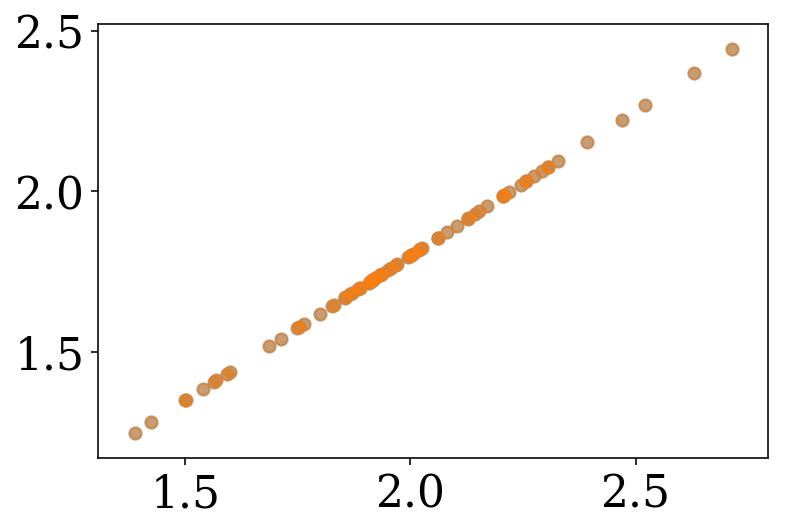

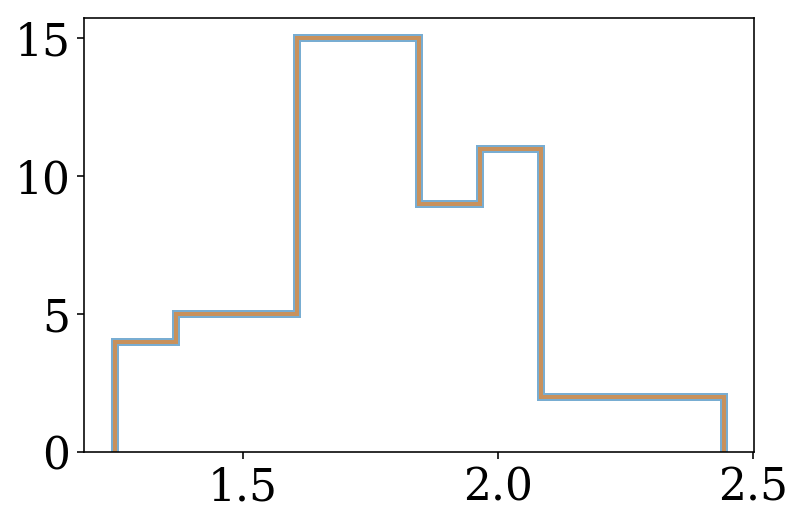

In [7]:
##WD merger and collison to NS
path = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/ngc6752/allfixed/n8-rv0.5-rg8-z0.0002_iccatalog_alloff_cotdeoff_wdmass/'
collfile = np.genfromtxt(path+'ns_wdwd_coll.dat')
Mcoll = collfile[:,4]; M0 = collfile[:,5]; M1 = collfile[:,6]
Mns = 0.9*(M0+M1)

print(np.any(Mcoll<=1.242))

plt.figure()
plt.scatter(M0+M1, Mcoll, alpha=0.5)
plt.scatter(M0+M1, Mns, alpha=0.5)

plt.figure()
plt.hist(Mcoll, histtype='step', lw=4, alpha=0.6)
plt.hist(Mns, histtype='step', lw=2, alpha=0.6)

# Qcrit tests

4720
3754
4498


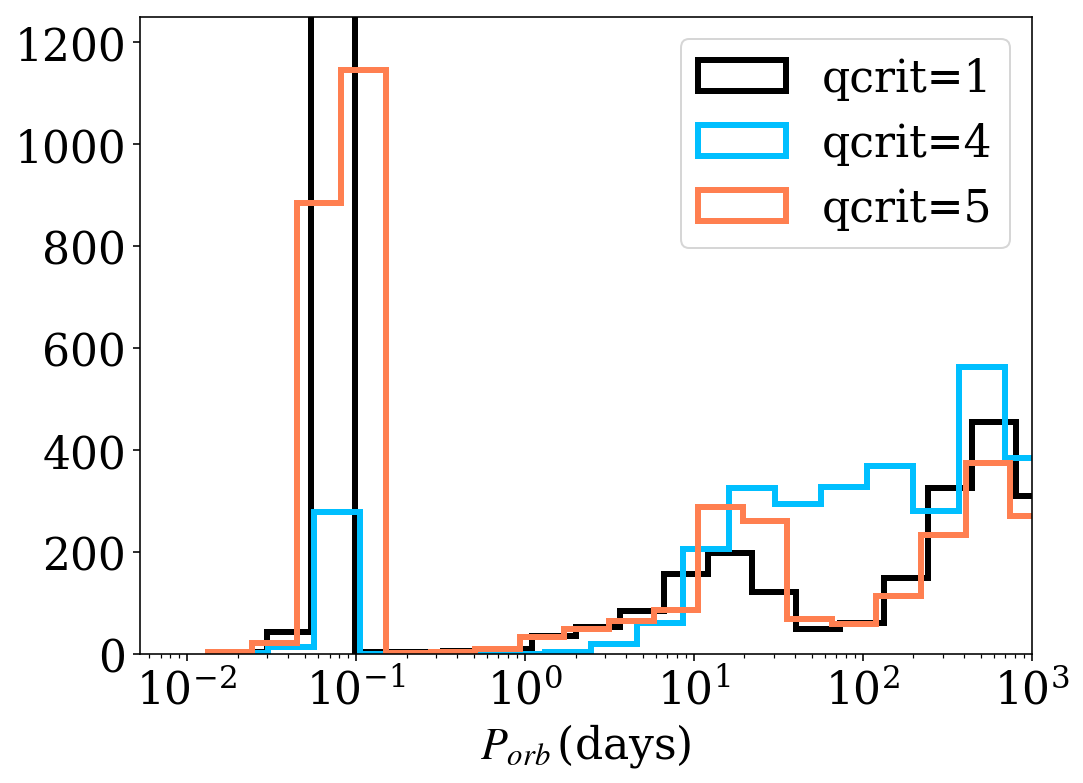

In [6]:
##COSMIC run NS-XX binaries with qcrit change
folders = ['qcrit1/', 'qcrit4/', 'qcrit5/']
colors = ['k', 'deepskyblue', 'coral']
labs = ['qcrit=1', 'qcrit=4', 'qcrit=5']

###Maybe can plot it this way?
def scatter_hist(x1, y1, lb, cs, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x1, y1, s = 10,  label = lb, color = cs, alpha=0.5)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x1)), np.max(np.abs(y1)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    #bins = np.arange(-lim, lim + binwidth, binwidth)
    #print(bins)
    ax_histx.hist(x1, bins=np.logspace(np.log10(np.min(x1)), np.log10(np.max(x1)), 30), 
                  log=True, color = cs, histtype = 'step', lw = 3)
    ax_histy.hist(y1, bins=np.logspace(np.log10(np.min(y1)), np.log10(np.max(y1)), 30), orientation='horizontal',
                 log=True, color = cs, histtype = 'step', lw = 3)
    
    ax.set_xlim(xmin = 0.004, xmax = 2)
    #ax.set_ylim(ymin = 0.01, ymax = 10**12)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_c\, (\rm{M_{\odot}})$')
    ax.set_ylabel(r'$P_{orb}\,$(days)')
    ax.legend(loc = 'upper left', fontsize = 18, frameon = False)
    
    
    ax_histx.set_yticks([1., 100., 500.])
    ax_histy.set_xticks([1., 100., 500.])
    
    fig.tight_layout()

##plotting
# definitions for the axes
left, width = 0.1, 0.55
bottom, height = 0.1, 0.5
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.22]
rect_histy = [left + width + spacing, bottom, 0.32, height]

# start with a square Figure
#fig = plt.figure(figsize=(10, 10))

#ax = fig.add_axes(rect_scatter)
#ax_histx = fig.add_axes(rect_histx, sharex=ax)
#ax_histy = fig.add_axes(rect_histy, sharey=ax)

fig,ax = plt.subplots(figsize=[8,6])
for xx in range(len(folders)):
    conv = pd.read_hdf('/projects/b1095/syr904/cosmic/qcrit_check/'+folders[xx]+'dat_kstar1_13_kstar2_0_12_SFstart_13700.0_SFduration_0.0_metallicity_0.0002.h5', 
                       key='conv')
    bcm = pd.read_hdf('/projects/b1095/syr904/cosmic/qcrit_check/'+folders[xx]+'dat_kstar1_13_kstar2_0_12_SFstart_13700.0_SFduration_0.0_metallicity_0.0002.h5', 
                       key='bcm')
    bpp = pd.read_hdf('/projects/b1095/syr904/cosmic/qcrit_check/'+folders[xx]+'dat_kstar1_13_kstar2_0_12_SFstart_13700.0_SFduration_0.0_metallicity_0.0002.h5', 
                       key='bpp')
    
    #print(bcm)
    #print(bpp)
    #print(len(bcm.loc[bcm.tphys==13700., ['kstar_1','kstar_2','mass_1','mass_2','porb']]))
    print(len(bcm.loc[(bcm.tphys==13700.) & (bcm.kstar_1==13)& (bcm.omega_spin_1>6.6e9), 
                      ['kstar_1','kstar_2','mass_1','mass_2','porb']]))
    mc = bcm.loc[(bcm.tphys==13700.) & (bcm.kstar_1==13) & (bcm.omega_spin_1>6.6e9), 'mass_2']
    porb = bcm.loc[(bcm.tphys==13700.) & (bcm.kstar_1==13) & (bcm.omega_spin_1>6.6e9), 'porb']

    ax.hist(porb, #bins = 30,
            bins=np.logspace(np.log10(np.min(porb)), np.log10(np.max(porb)), 30),
            cumulative=False, density=False, log=False,
            color=colors[xx], histtype='step', lw=3, label = labs[xx])
    #scatter_hist(mc, porb, labs[xx], colors[xx], ax, ax_histx, ax_histy)

ax.set_xscale('log')
ax.set_xlabel(r'$P_{orb}\,$(days)')
ax.set_xlim(xmax=1000)
ax.set_ylim(ymax = 1250)
ax.legend(loc = 'upper right')
fig.tight_layout()

plt.savefig(savepath+'qcrit_comp.pdf', dpi=300)

In [ ]:
##Number of NSs and BHs comparison between old 6752 and new 6752 models
path_new = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.5-rg8-z0.0002_ICold_wdmass_nstde_test/'
path_old = '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/'

ns_new = np.genfromtxt(path_new+'initial.ns.dat')
bh_new = np.genfromtxt(path_new+'initial.bh.dat')
tconv_new = dyn.conv('t', path_new+'initial.conv.sh')

ns_old = np.genfromtxt(path_old+'initial.ns.dat')
bh_old = np.genfromtxt(path_old+'initial.bh.dat')
tconv_old = dyn.conv('t', path_old+'initial.conv.sh')


plt.figure(figsize = (8,6))
plt.plot(ns_new[:,0], ns_new[:,1], label='NS', 
         color = 'orange', alpha=0.8)
plt.plot(ns_old[:,0]*tconv_old, ns_old[:,1],
         color = 'orange', alpha=0.8, ls = '--')

plt.plot(bh_new[:,1]*tconv_new, bh_new[:,2], label='BH', 
         color = 'k', alpha=0.8)
plt.plot(bh_old[:,1]*tconv_old, bh_old[:,2],
         color = 'k', alpha=0.8, ls = '--')

plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel('t(Myr)')
plt.ylabel('N')
plt.xlim(xmin = 0.)
plt.ylim(ymin = 0.)
plt.legend()

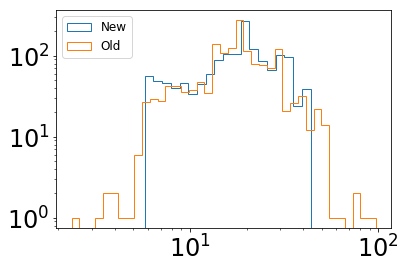

In [21]:
##Compare mass of BH at formation
path_new = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.5-rg8-z0.0002_tcoff/'
path_old = '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/'

bhform_new = np.genfromtxt(path_new+'initial.bhformation.dat')
mbh_new = bhform_new[:,6]
mbh_old = []
with open(path_old+'initial.bhformation.dat', 'r') as fbhf:
    next(fbhf)
    for line in fbhf:
        data = line.split()
        mbh_old.append(float(data[6]))

plt.figure()
plt.hist(mbh_new, bins = np.logspace(np.min(np.log10(mbh_new)), np.max(np.log10(mbh_new)), 20), 
         histtype='step', label = 'New')
plt.hist(mbh_old, bins = np.logspace(np.min(np.log10(mbh_old)), np.max(np.log10(mbh_old)), 40), 
         histtype='step', label = 'Old')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left', fontsize=12)

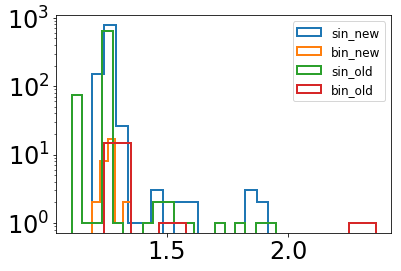

In [6]:
##Compare mass of NSs
path_new = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.5-rg8-z0.0002_tcoff/'
path_old = '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/'

snap341 = cmct.Snapshot(fname=path_new+'initial.snapshots.h5', snapshot_name='/341(t=19.263855)',
                        conv=path_new+'initial.conv.sh')
binflag = snap341.data['binflag']
m_sin = snap341.data['m_MSUN'][binflag!=1]
m0 = snap341.data['m0_MSUN'][binflag==1]; m1 = snap341.data['m1_MSUN'][binflag==1]
ktype = snap341.data['startype'][binflag!=1]
k0 = snap341.data['bin_startype0'][binflag==1]; k1 = snap341.data['bin_startype1'][binflag==1]

m12_sin_new = list(m_sin[ktype==13])
m12_bin_new = list(m0[k0==13])+list(m1[k1==13])

m12_sin_old = []
m12_bin_old = []
with gzip.open(path_old+'initial.snap0597.dat.gz', 'r') as fsnap:
    next(fsnap); next(fsnap)
    for line in fsnap:
        data = line.split()
        if int(data[7])!=1 and int(data[14])==13:
            m12_sin_old.append(float(data[1]))
        elif int(data[7])==1 and int(data[17])==13:
            m12_bin_old.append(float(data[8]))
        elif int(data[7])==1 and int(data[18])==13:
            m12_bin_old.append(float(data[9]))
            
plt.figure()
plt.hist(m12_sin_new, histtype='step', lw = 2, label = 'sin_new', bins=15)
plt.hist(m12_bin_new, histtype='step', lw = 2, label = 'bin_new', bins=5)
plt.hist(m12_sin_old, histtype='step', lw = 2, label = 'sin_old', bins=20)
plt.hist(m12_bin_old, histtype='step', lw = 2, label = 'bin_old', bins=10)

plt.yscale('log')
plt.legend(fontsize=12)

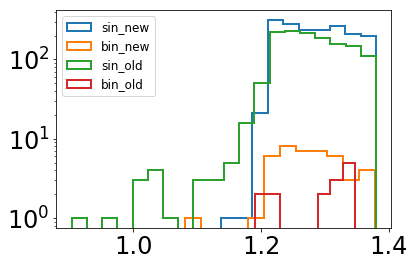

In [3]:
##Compare mass of ONe WDs
path_new = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.5-rg8-z0.0002_tcoff/'
path_old = '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/'

snap341 = cmct.Snapshot(fname=path_new+'initial.snapshots.h5', snapshot_name='/341(t=19.263855)',
                        conv=path_new+'initial.conv.sh')
binflag = snap341.data['binflag']
m_sin = snap341.data['m_MSUN'][binflag!=1]
m0 = snap341.data['m0_MSUN'][binflag==1]; m1 = snap341.data['m1_MSUN'][binflag==1]
ktype = snap341.data['startype'][binflag!=1]
k0 = snap341.data['bin_startype0'][binflag==1]; k1 = snap341.data['bin_startype1'][binflag==1]

m12_sin_new = list(m_sin[ktype==12])
m12_bin_new = list(m0[k0==12])+list(m1[k1==12])

m12_sin_old = []
m12_bin_old = []
with gzip.open(path_old+'initial.snap0597.dat.gz', 'r') as fsnap:
    next(fsnap); next(fsnap)
    for line in fsnap:
        data = line.split()
        if int(data[7])!=1 and int(data[14])==12:
            m12_sin_old.append(float(data[1]))
        elif int(data[7])==1 and int(data[17])==12:
            m12_bin_old.append(float(data[8]))
        elif int(data[7])==1 and int(data[18])==12:
            m12_bin_old.append(float(data[9]))
            
plt.figure()
plt.hist(m12_sin_new, histtype='step', lw = 2, label = 'sin_new', bins=10)
plt.hist(m12_bin_new, histtype='step', lw = 2, label = 'bin_new', bins=12)
plt.hist(m12_sin_old, histtype='step', lw = 2, label = 'sin_old', bins=20)
plt.hist(m12_bin_old, histtype='step', lw = 2, label = 'bin_old', bins=8)

plt.yscale('log')
plt.legend(fontsize=12)

In [9]:
##BHs at 13Gyr
snap341 = cmct.Snapshot(fname=path_new+'initial.snapshots.h5', 
                snapshot_name='/341(t=19.263855)', conv=path_new+'initial.conv.sh')

snap0 = cmct.Snapshot(fname=path_new+'initial.snapshots.h5', 
                snapshot_name='/0(t=0)', conv=path_new+'initial.conv.sh')

binflag = snap341.data['binflag']
id_sin = snap341.data['id'][binflag!=1]
id0 = snap341.data['id0'][binflag==1]; id1 = snap341.data['id1'][binflag==1]
ktype = snap341.data['startype'][binflag!=1]
k0 = snap341.data['bin_startype0'][binflag==1]; k1 = snap341.data['bin_startype1'][binflag==1]

bh_sin = list(id_sin[ktype==14])
bh_bin = list(id0[k0==14])+list(id1[k1==14])
print(bh_sin, bh_bin)

binflag0 = snap0.data['binflag']
id_sin0 = np.array(snap0.data['id'][binflag0!=1])
id00 = np.array(snap0.data['id0'][binflag0==1]); id10 = np.array(snap0.data['id1'][binflag0==1])
if 109424 in id_sin0 or 109424 in id00 or 109424 in id10:
    print('yes 109424')
if 812765 in id_sin0 or 812765 in id00 or 812765 in id10:
    print('yes 812765')
    
for ii in range(len(id10)):
    if float(id10[ii]) == 812765:
        print('found it')

[979712, 837226, 109424, 892893, 1008493, 520966] [812765, 988416, 1500692, 868210, 862255, 1153880, 1343428]
yes 109424
yes 812765


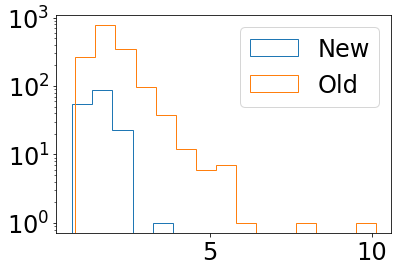

In [29]:
##Compare WD collisions between old and new 6752 models
path_new = '/projects/b1095/syr904/cmc/CMC-COSMIC/wdmerger_update/CMC-COSMIC_modified/CMC/runs/n8-rv0.5-rg8-z0.0002_tcoff/'
path_old = '/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.0002/8e5/'

wd_coll_new = np.genfromtxt(path_new+'wd_coll_all.dat')
wd_coll_old = np.genfromtxt(path_old+'wd_coll_all.dat')

mcoll_new = wd_coll_new[:,4]
mcoll_old = wd_coll_old[:,4]

plt.figure()
plt.hist(mcoll_new, bins = 5, histtype='step', label = 'New')
plt.hist(mcoll_old, bins = 15, histtype='step', label = 'Old')

plt.yscale('log')

plt.legend(loc='best')